## How to Run

### Case 1: Preprocessing method was updated

Run the cells in this order:

1. **Initial Setup**
2. **Milestone 1**
3. **Milestone 2 / Initial Setup**
4. **Milestone 2 / model_of_your_choice**
5. **Milestone 2 / Save Final Model**


### Case 2: Preprocessing has not changed (use existing saved dataframe)

Run the cells in this order:

1. **Milestone 2 / Initial Setup**
2. **Milestone 2 / model_of_your_choice**
3. **Milestone 2 / Save Final Model**


### Notes

- Each time **Milestone 1 / Save df** is run, it saves the preprocessed dataframe to Google Drive
- This allows **Milestone 1** to run on CPU and **Milestone 2** to use GPU efficiently
- **Save Final Model** automatically saves and uploads the final model to the Streamlit app


# Initial Setup


## Import dependecies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!pip install gdown
import gdown

## Loading data

In [ ]:
TRAIN_ID = "1OPub3pFaQQcTjhyswCtyOJiHOvfPp_xm"
TEST_ID = "1E_xmI8pUbnqpy8yF_bvLLZHKcgTAlPY2"
gdown.download(f"https://drive.google.com/uc?id={TRAIN_ID}", "train.csv", quiet=False)
gdown.download(f"https://drive.google.com/uc?id={TEST_ID}", "test.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1OPub3pFaQQcTjhyswCtyOJiHOvfPp_xm
To: /content/train.csv
100%|██████████| 31.1M/31.1M [00:00<00:00, 47.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1E_xmI8pUbnqpy8yF_bvLLZHKcgTAlPY2
To: /content/test.csv
100%|██████████| 15.4M/15.4M [00:00<00:00, 40.4MB/s]


'test.csv'

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

/tmp/ipython-input-3180332355.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


# Milestone 1 : Data Preprocessing/Feature Engineering/EDA


## Inspecting Data

Note: 66% Training, 33% Testing Data

Training Data

In [ ]:
train.shape

(100000, 28)

In [ ]:
train.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [ ]:
train.tail(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99990,0x25fe0,CUS_0x8600,July,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,...,Bad,3571.7,25.123535,NaN,Yes,60.964772,173.2755025599617,Low_spent_Large_value_payments,228.750392,Standard
99991,0x25fe1,CUS_0x8600,August,Sarah McBridec,29,031-35-0942,Architect,20002.88,1929.906667,10,...,Bad,3571.7,37.140784,6 Years and 3 Months,Yes,60.964772,34.66290609052614,High_spent_Large_value_payments,337.362988,Standard
99992,0x25fe6,CUS_0x942c,January,Nicks,24,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,32.991333,31 Years and 3 Months,No,35.104023,401.1964806036356,Low_spent_Small_value_payments,189.64108,Poor
99993,0x25fe7,CUS_0x942c,February,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,29.135447,31 Years and 4 Months,No,58638.000000,180.7330951944497,Low_spent_Medium_value_payments,400.104466,Standard
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [ ]:
train.dtypes.to_frame(name='dtypes')

,dtypes
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


Test Data

In [ ]:
test.shape

(50000, 27)

In [ ]:
test.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,30.996424,27 Years and 5 Months,No,18.816215,72.68014533363515,High_spent_Large_value_payments,452.30230675990265
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,NaN,1,...,3.0,Good,1303.01,35.229707,18 Years and 5 Months,No,246.992319,397.50365354404653,Low_spent_Medium_value_payments,854.2260270022115
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.220000,1,...,3.0,Good,1303.01,35.685836,18 Years and 6 Months,No,246.992319,453.6151305781054,Low_spent_Large_value_payments,788.1145499681528


In [ ]:
test.tail(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
49990,0x25fd8,CUS_0xaf61,November,Chris Wickhamm,50,133-16-7738,Writer,37188.1,3097.008333,1,...,3.0,Good,620.64,25.708414,30 Years and 7 Months,No,84.205949,183.3656280777276,Low_spent_Large_value_payments,312.1292558307615
49991,0x25fd9,CUS_0xaf61,December,Chris Wickhamm,50_,133-16-7738,Writer,37188.1,3097.008333,1,...,3.0,_,620.64,36.498383,30 Years and 8 Months,No,33013.000000,238.3993828976901,Low_spent_Large_value_payments,257.095501010799
49992,0x25fe2,CUS_0x8600,September,Sarah McBridec,29,031-35-0942,Architect,20002.88,1929.906667,10,...,9.0,Bad,3571.7,32.391288,6 Years and 4 Months,Yes,60.964772,107.21074164760236,Low_spent_Small_value_payments,314.8151526456419
49993,0x25fe3,CUS_0x8600,October,Sarah McBridec,29,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,Bad,3571.7,37.528511,6 Years and 5 Months,Yes,60.964772,71.79442082882734,Low_spent_Small_value_payments,350.23147346441687
49994,0x25fe4,CUS_0x8600,November,Sarah McBridec,29,031-35-0942,_______,20002.88,1929.906667,10,...,12.0,Bad,3571.7,27.027812,6 Years and 6 Months,Yes,60.964772,50.84684680498023,High_spent_Small_value_payments,341.179047488264
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717
49999,0x25ff1,CUS_0x942c,December,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,_,502.38,34.108530,32 Years and 2 Months,No,35.104023,220.45787812168732,Low_spent_Medium_value_payments,360.37968260123847


In [ ]:
test.dtypes.to_frame(name='dtypes')

,dtypes
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


Upon initial inspection, we can observe that the data consists of missing values in the form of null values or invalid tokens in the form of hyphen and underscores. We can also observe invalid data values such as SSN with symbols, negative age and age with an underscore. Therefore, we will need to clean this data and ensure all values are valid.

### Drop Clearly Irrelevant Columns
Drop columns that don’t help the model
- SSN
- Name
- ID



In [ ]:
# Group by Customer_ID and count unique Names
name_check = train.groupby("Customer_ID")["Name"].nunique()

# Check if all customers have only one name
if (name_check > 1).any():
    print("Some Customer_IDs are associated with multiple Names!")
    print(name_check[name_check > 1])  # show problematic IDs
else:
    print("All Customer_IDs have a unique Name. Safe to drop 'Name'.")


All Customer_IDs have a unique Name. Safe to drop 'Name'.


In [ ]:
train = train.drop(columns=["SSN", "Name", "ID"], errors='ignore')

In [ ]:
test = test.drop(columns=["SSN", "ID"], errors='ignore') # keep name for app

In [ ]:
train.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
test.head()

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,CUS_0xd40,September,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,CUS_0xd40,October,Aaron Maashoh,24,Scientist,19114.12,1824.843333,3,4,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,CUS_0xd40,November,Aaron Maashoh,24,Scientist,19114.12,1824.843333,3,4,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,CUS_0xd40,December,Aaron Maashoh,24_,Scientist,19114.12,NaN,3,4,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,CUS_0x21b1,September,Rick Rothackerj,28,_______,34847.84,3037.986667,2,4,6,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [ ]:
train.shape

(100000, 25)

In [ ]:
test.shape

(50000, 25)

We confirm that these three columns have been dropped. (Name is kept for test for streamlit app search functionality. This will be later dropped before model training)

Initial Thoughts of how each features could relate with each other:

- Annual Income & Monthly Inhand Salary -- would one of these features would be enough? Would having both be redundant?
- Number of bank accounts, Number of credit card
- Number of loan, Interest Rates, Types of Loan
- Delay from due date, number of delayed payment

In [ ]:
# Absolute counts
print(train['Credit_Score'].value_counts())

# Percentages
print(train['Credit_Score'].value_counts(normalize=True) * 100)

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64
Credit_Score
Standard    53.174
Poor        28.998
Good        17.828
Name: proportion, dtype: float64


In [ ]:
missing_in_test = list(set(train.columns) - set(test.columns))
print("Columns in train but not in test:", missing_in_test)
missing_in_train = list(set(test.columns) - set(train.columns))
print("Columns in test but not in train:", missing_in_train)


Columns in train but not in test: ['Credit_Score']
Columns in test but not in train: ['Name']


We observe that the dataset is not perfectly balanced. Consider handling class imbalance when training the model.

## Data Preprocessing

This step includes the following:
1. Data Conversion
2. Handling Null Values
3. Handling Invalid Values
4. Handling Outliers

In [ ]:
null_values_train  =train.isnull().sum()
null_values_train[null_values_train > 0]

,0
Monthly_Inhand_Salary,15002
Type_of_Loan,11408
Num_of_Delayed_Payment,7002
Num_Credit_Inquiries,1965
Credit_History_Age,9030
Amount_invested_monthly,4479
Monthly_Balance,1200


In [ ]:
null_values_test = test.isnull().sum()
null_values_test[null_values_test > 0]

,0
Name,5015
Monthly_Inhand_Salary,7498
Type_of_Loan,5704
Num_of_Delayed_Payment,3498
Num_Credit_Inquiries,1035
Credit_History_Age,4470
Amount_invested_monthly,2271
Monthly_Balance,562


### Terry
#**Num_credit_card** : Capped from 0 to 15
#**Interest_rate** : Capped from 0 to 15 , set all other values to Nan
#**Num_of_loan** : Converted all string to numerical values and took the absolute values for all negative values.

In [ ]:
# --- Pre-processing Inspection ---
before_num_credit_card = train["Num_Credit_Card"].copy()
before_interest_rate = train["Interest_Rate"].copy()
before_num_of_loan = train["Num_of_Loan"].copy()


# Num_of_Loan: Converted string object into numerical values before inspection
train["Num_of_Loan"] = train["Num_of_Loan"].astype(str).str.replace("_", "", regex=False)
train["Num_of_Loan"] = pd.to_numeric(train["Num_of_Loan"], errors="coerce")
#train["Num_of_Loan"] = train["Num_of_Loan"].apply(lambda x: x if (x >= 0 and x <= 100) else np.nan)  <- Q: DO WE NEED TO CAP THE MAX # OF LOANS?
train["Num_of_Loan"] = train["Num_of_Loan"].abs()

test["Num_of_Loan"] = test["Num_of_Loan"].astype(str).str.replace("_", "", regex=False)
test["Num_of_Loan"] = pd.to_numeric(test["Num_of_Loan"], errors="coerce")
#train["Num_of_Loan"] = train["Num_of_Loan"].apply(lambda x: x if (x >= 0 and x <= 100) else np.nan)  <- Q: DO WE NEED TO CAP THE MAX # OF LOANS?
test["Num_of_Loan"] = test["Num_of_Loan"].abs()

# --- Pre-processing Inspection ---
train[["Num_Credit_Card", "Interest_Rate", "Num_of_Loan"]].describe()

,Num_Credit_Card,Interest_Rate,Num_of_Loan
count,100000.00000,100000.000000,100000.000000
mean,22.47443,72.466040,10.761960
std,129.05741,466.422621,61.789933
min,0.00000,1.000000,0.000000
25%,4.00000,8.000000,2.000000
50%,5.00000,13.000000,3.000000
75%,7.00000,20.000000,6.000000
max,1499.00000,5797.000000,1496.000000


In [ ]:
#train[["Num_Credit_Card", "Interest_Rate", "Num_of_Loan"]].isnull().sum()
#test[["Num_Credit_Card", "Interest_Rate", "Num_of_Loan"]].isnull().sum()

In [ ]:
# --- Num_Credit_Card ---

# IQR
Q1_NC = train["Num_Credit_Card"].quantile(0.25)
Q3_NC = train["Num_Credit_Card"].quantile(0.75)
IQR_NC = Q3_NC - Q1_NC
lower_bound_NC = Q1_NC - 1.5 * IQR_NC
upper_bound_NC = Q3_NC + 1.5 * IQR_NC

# Keep only values within the bounds
train = train[(train["Num_Credit_Card"] >= lower_bound_NC) & (train["Num_Credit_Card"] <= upper_bound_NC)]
test = test[(test["Num_Credit_Card"] >= lower_bound_NC) & (test["Num_Credit_Card"] <= upper_bound_NC)]

# Capped number of credit card from 0 to 15 , Set other to Nan
# train["Num_Credit_Card"] = train["Num_Credit_Card"].apply(lambda x: x if 0 <= x <= 100 else np.nan)
# test["Num_Credit_Card"] = test["Num_Credit_Card"].apply(lambda x: x if 0 <= x <= 100 else np.nan)

In [ ]:
# --- Interest_Rate ---
# Interest_Rate: Stored as numerical values, no conversions needed.
# IQR:

Q1_IR = train["Interest_Rate"].quantile(0.25)
Q3_IR = train["Interest_Rate"].quantile(0.75)
IQR_IR = Q3_IR - Q1_IR
lower_bound_IR = Q1_IR - 1.5 * IQR_IR
upper_bound_IR = Q3_IR + 1.5 * IQR_IR

# Keep only values within the bounds
train = train[(train["Interest_Rate"] >= lower_bound_IR) & (train["Interest_Rate"] <= upper_bound_IR)]
test = test[(test["Interest_Rate"] >= lower_bound_IR) & (test["Interest_Rate"] <= upper_bound_IR)]

# Capping from 0 to 15
# train["Interest_Rate"] = train["Interest_Rate"].apply(lambda x: x if x <= 15 else np.nan)
# test["Interest_Rate"] = test["Interest_Rate"].apply(lambda x: x if x <= 15 else np.nan)

In [ ]:
# --- Num_of_Loan ---
# Num_of_Loan: Stored as object, requires conversion to numerical
# - Convert invalid entries with underscores to numerical values, for instance "3_" to 3
# - Take the absolute values for negative entries.

# NOTE:
# - Num_Of_Loan: We set all negative values to the absolute values, may need to come back later to see if capping at 0 improves the model performance.
Q1_NL = train["Num_of_Loan"].quantile(0.25)
Q3_NL = train["Num_of_Loan"].quantile(0.75)
IQR_NL = Q3_NL - Q1_NL
lower_bound_NL = Q1_NL - 1.5 * IQR_NL
upper_bound_NL = Q3_NL + 1.5 * IQR_NL

# Keep only values within the bounds
train = train[(train["Num_of_Loan"] >= lower_bound_NL) & (train["Num_of_Loan"] <= upper_bound_NL)]
test = test[(test["Num_of_Loan"] >= lower_bound_NL) & (test["Num_of_Loan"] <= upper_bound_NL)]

In [ ]:
# After processing
train[["Num_Credit_Card", "Interest_Rate", "Num_of_Loan"]].describe()

,Num_Credit_Card,Interest_Rate,Num_of_Loan
count,91567.000000,91567.000000,91567.000000
mean,5.532779,14.535422,3.534832
std,2.067852,8.742489,2.448198
min,0.000000,1.000000,0.000000
25%,4.000000,7.000000,2.000000
50%,5.000000,13.000000,3.000000
75%,7.000000,20.000000,5.000000
max,11.000000,34.000000,9.000000


In [ ]:
test[["Num_Credit_Card", "Interest_Rate", "Num_of_Loan"]].describe()

,Num_Credit_Card,Interest_Rate,Num_of_Loan
count,45744.000000,45744.000000,45744.000000
mean,5.533556,14.537404,3.533425
std,2.072144,8.740303,2.444974
min,0.000000,1.000000,0.000000
25%,4.000000,7.000000,2.000000
50%,5.000000,13.000000,3.000000
75%,7.000000,20.000000,5.000000
max,11.000000,34.000000,9.000000


In [ ]:
print(test.shape)
print(train.shape)

(45744, 25)
(91567, 25)


In [ ]:
missing_in_test = list(set(train.columns) - set(test.columns))
print("Columns in train but not in test:", missing_in_test)
missing_in_train = list(set(test.columns) - set(train.columns))
print("Columns in test but not in train:", missing_in_train)


Columns in train but not in test: ['Credit_Score']
Columns in test but not in train: ['Name']


### Grace

In [ ]:
print("Type_of_Loan samples:")
print("Train:", train['Type_of_Loan'].head(10).tolist())
print("Test:", test['Type_of_Loan'].head(10).tolist())

Type_of_Loan samples:
Train: ['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan', 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan', 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan', 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan', 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan', 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan', 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan', 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan', 'Credit-Builder Loan', 'Credit-Builder Loan']
Test: ['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan', 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan', 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan', 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan', 'Credit-Builder Loan', 'Credit-Builder Loan', 'Credit-Builder Loa

In [ ]:
print("\nCredit_History_Age samples:")
print("Train:", train['Credit_History_Age'].head(10).tolist())
print("Test:", test['Credit_History_Age'].head(10).tolist())


Credit_History_Age samples:
Train: ['22 Years and 1 Months', nan, '22 Years and 3 Months', '22 Years and 4 Months', '22 Years and 5 Months', '22 Years and 6 Months', '22 Years and 7 Months', nan, '26 Years and 7 Months', '26 Years and 8 Months']
Test: ['22 Years and 9 Months', '22 Years and 10 Months', nan, '23 Years and 0 Months', '27 Years and 3 Months', '27 Years and 4 Months', '27 Years and 5 Months', '27 Years and 6 Months', '18 Years and 5 Months', '18 Years and 6 Months']


In [ ]:
print("\nTotal_EMI_per_month samples:")
print("Train:", train['Total_EMI_per_month'].head(10).tolist())
print("Test:", test['Total_EMI_per_month'].head(10).tolist())


Total_EMI_per_month samples:
Train: [49.57494921489417, 49.57494921489417, 49.57494921489417, 49.57494921489417, 49.57494921489417, 49.57494921489417, 49.57494921489417, 49.57494921489417, 18.816214573128885, 18.816214573128885]
Test: [49.57494921489417, 49.57494921489417, 49.57494921489417, 49.57494921489417, 18.816214573128885, 18.816214573128885, 18.816214573128885, 18.816214573128885, 246.9923194537421, 246.9923194537421]


In [ ]:
train["Type_of_Loan"].head()

,Type_of_Loan
0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
2,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,"Auto Loan, Credit-Builder Loan, Personal Loan,..."


In [ ]:
train["Type_of_Loan"].value_counts()

,count
Type_of_Loan,
Not Specified,1295
Personal Loan,1153
Student Loan,1150
Credit-Builder Loan,1139
Debt Consolidation Loan,1135
...,...
"Debt Consolidation Loan, Mortgage Loan, Debt Consolidation Loan, Home Equity Loan, Payday Loan, Auto Loan, Auto Loan, and Personal Loan",4
"Student Loan, Not Specified, Mortgage Loan, and Personal Loan",4
"Not Specified, Credit-Builder Loan, Home Equity Loan, and Student Loan",4


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import re

print("Processing Type_of_Loan with multi-label encoding...")

# Convert to string for mixed data types
train['Type_of_Loan'] = train['Type_of_Loan'].astype(str)
test['Type_of_Loan'] = test['Type_of_Loan'].astype(str)

# Replace actual null values with 'Not Specified'
train['Type_of_Loan'] = train['Type_of_Loan'].fillna('Not Specified')
test['Type_of_Loan'] = test['Type_of_Loan'].fillna('Not Specified')

# Handle string representations of null values
train.loc[train['Type_of_Loan'] == 'nan', 'Type_of_Loan'] = 'Not Specified'
test.loc[test['Type_of_Loan'] == 'nan', 'Type_of_Loan'] = 'Not Specified'

# Remove extra whitespace
train['Type_of_Loan'] = train['Type_of_Loan'].str.strip()
test['Type_of_Loan'] = test['Type_of_Loan'].str.strip()

# Replace "and" with comma for consistent splitting
train['Type_of_Loan'] = train['Type_of_Loan'].str.replace(' and ', ', ')
test['Type_of_Loan'] = test['Type_of_Loan'].str.replace(' and ', ', ')

# Split combinations into lists of individual loan types
train['Loan_List'] = train['Type_of_Loan'].str.split(', ')
test['Loan_List'] = test['Type_of_Loan'].str.split(', ')

# Clean up each loan type in the lists (remove extra spaces and commas)
def clean_loan_list(loan_list):
    # Strip whitespace and remove empty strings or lone commas
    cleaned = [loan.strip().rstrip(',').strip() for loan in loan_list]
    # Remove empty strings
    cleaned = [loan for loan in cleaned if loan and loan != '']
    return cleaned

train['Loan_List'] = train['Loan_List'].apply(clean_loan_list)
test['Loan_List'] = test['Loan_List'].apply(clean_loan_list)

# Apply MultiLabelBinarizer to create binary columns for each individual loan type
mlb = MultiLabelBinarizer()

# Fit on train data and transform
train_loan_dummies = pd.DataFrame(
    mlb.fit_transform(train['Loan_List']),
    columns=mlb.classes_,
    index=train.index
)

# Transform test data with same encoder
test_loan_dummies = pd.DataFrame(
    mlb.transform(test['Loan_List']),
    columns=mlb.classes_,
    index=test.index
)

# Add to main datasets
train = pd.concat([train, train_loan_dummies], axis=1)
test = pd.concat([test, test_loan_dummies], axis=1)

# Drop intermediate Loan_List column
train = train.drop(['Loan_List'], axis=1)
test = test.drop(['Loan_List'], axis=1)

print(f"Multi-label encoding complete: {len(mlb.classes_)} individual loan type features")
print(f"Individual loan types: {list(mlb.classes_)}")
print(f"Train 'Not Specified': {(train['Type_of_Loan'] == 'Not Specified').sum()}")
print(f"Test 'Not Specified': {(test['Type_of_Loan'] == 'Not Specified').sum()}")
print(f"New shapes - Train: {train.shape}, Test: {test.shape}")

# Verify the dummy columns
print("\nVerification:")
print("Train loan_dummies shape:", train_loan_dummies.shape)
print("Test loan_dummies shape:", test_loan_dummies.shape)
print("Dummy column names:", sorted(train_loan_dummies.columns.tolist()))

Processing Type_of_Loan with multi-label encoding...
Multi-label encoding complete: 9 individual loan type features
Individual loan types: ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']
Train 'Not Specified': 11748
Test 'Not Specified': 5868
New shapes - Train: (91567, 34), Test: (45744, 34)

Verification:
Train loan_dummies shape: (91567, 9)
Test loan_dummies shape: (45744, 9)
Dummy column names: ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']


In [ ]:
#from sklearn.preprocessing import MultiLabelBinarizer

#mlb = MultiLabelBinarizer()
#loan_dummies = pd.DataFrame(
#    mlb.fit_transform(train["Loan_List"]),
#    columns=mlb.classes_,
#    index=train.index
#)

#train = pd.concat([train, loan_dummies], axis=1)

#test_loan_dummies = pd.DataFrame(
#    mlb.transform(test["Loan_List"]),
#    columns=mlb.classes_,
#    index=test.index
#)
#test = pd.concat([test, test_loan_dummies], axis=1)

In [ ]:
# Number of dummy columns created for train
print("Train loan_dummies shape:", train_loan_dummies.shape)  # (n_train_rows, n_dummy_cols)
print("Number of train dummy columns:", train_loan_dummies.shape[1])

# Number of dummy columns created for test
print("Test loan_dummies shape:", test_loan_dummies.shape)
print("Number of test dummy columns:", test_loan_dummies.shape[1])

# Optional: list the column names if you want to inspect
print("Dummy column names:", train_loan_dummies.columns.tolist())

Train loan_dummies shape: (91567, 9)
Number of train dummy columns: 9
Test loan_dummies shape: (45744, 9)
Number of test dummy columns: 9
Dummy column names: ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']


In [ ]:
train.shape

(91567, 34)

In [ ]:
test.shape

(45744, 34)

In [ ]:
# Function to convert credit history to total months
def extract_credit(age_text):
    # Handle actual NaN/None values
    if pd.isna(age_text):
        return -99999

    age_str = str(age_text).strip()

    # Handle explicit missing value strings
    if age_str.upper() in ['NA', 'NAN', 'NONE', '', 'NULL']:
        return -99999

    try:
        years = 0
        months = 0

        # Extract years - handles "22 Years", "22 Year"
        year_pattern = r'(\d+)\s+[Yy]ears?\b'
        year_match = re.search(year_pattern, age_str)
        if year_match:
            years = int(year_match.group(1))

        # Extract months - handles "3 Months", "3 Month"
        month_pattern = r'(\d+)\s+[Mm]onths?\b'
        month_match = re.search(month_pattern, age_str)
        if month_match:
            months = int(month_match.group(1))

        # Convert to total months instead of years
        total_months = (years * 12) + months

        # Validate reasonable range (0-100 years = 0-1200 months)
        if 0 <= total_months <= 1200:
            return total_months
        else:
            return -99999

    except:
        return -99999

print("Credit History Age function defined!")

# Process Credit_History_Age, first pass with -99999 for missing
print("Processing Credit_History_Age to total months...")
train['Credit_History_Age'] = train['Credit_History_Age'].apply(extract_credit)
test['Credit_History_Age'] = test['Credit_History_Age'].apply(extract_credit)

print(f"Train missing before imputation: {(train['Credit_History_Age'] == -99999).sum()}")
print(f"Test missing before imputation: {(test['Credit_History_Age'] == -99999).sum()}")

# Calculate median from valid training data
valid_credit_history = train.loc[train['Credit_History_Age'] != -99999, 'Credit_History_Age']
credit_median = valid_credit_history.median()

print(f"\nCalculated median from valid training data: {credit_median} months")

# Apply median imputation to both train and test
train_imputed_count = (train['Credit_History_Age'] == -99999).sum()
test_imputed_count = (test['Credit_History_Age'] == -99999).sum()

train.loc[train['Credit_History_Age'] == -99999, 'Credit_History_Age'] = credit_median
test.loc[test['Credit_History_Age'] == -99999, 'Credit_History_Age'] = credit_median

print(f"Imputed {train_imputed_count} training values with median")
print(f"Imputed {test_imputed_count} test values with median")

# Verify no missing values remain
print(f"\nAfter imputation:")
print(f"Train missing (-99999): {(train['Credit_History_Age'] == -99999).sum()}")
print(f"Test missing (-99999): {(test['Credit_History_Age'] == -99999).sum()}")

# Show updated stats
print(f"\nCredit_History_Age statistics after median imputation:")
print(f"Train range: {train['Credit_History_Age'].min()} to {train['Credit_History_Age'].max()} months")
print(f"Train mean: {train['Credit_History_Age'].mean():.2f} months")
print(f"Train median: {train['Credit_History_Age'].median():.2f} months")
print(f"Train sample values: {train['Credit_History_Age'].head(10).tolist()}")

print(f"\nTest range: {test['Credit_History_Age'].min()} to {test['Credit_History_Age'].max()} months")
print(f"Test mean: {test['Credit_History_Age'].mean():.2f} months")

Credit History Age function defined!
Processing Credit_History_Age to total months...
Train missing before imputation: 8313
Test missing before imputation: 4090

Calculated median from valid training data: 220.0 months
Imputed 8313 training values with median
Imputed 4090 test values with median

After imputation:
Train missing (-99999): 0
Test missing (-99999): 0

Credit_History_Age statistics after median imputation:
Train range: 1 to 404 months
Train mean: 220.97 months
Train median: 220.00 months
Train sample values: [265, 220, 267, 268, 269, 270, 271, 220, 319, 320]

Test range: 10 to 408 months
Test mean: 226.57 months


In [ ]:
# # Process Credit_History_Age
# print("Processing Credit_History_Age...")

# train['Credit_History_Age'] = train['Credit_History_Age'].apply(extract_credit)
# test['Credit_History_Age'] = test['Credit_History_Age'].apply(extract_credit)

# print(f"Train missing (-99999): {(train['Credit_History_Age'] == -99999).sum()}")
# print(f"Test missing (-99999): {(test['Credit_History_Age'] == -99999).sum()}")

# # Show some stats for valid valuesA
# valid_train = train.loc[train['Credit_History_Age'] != -99999, 'Credit_History_Age']
# valid_test = test.loc[test['Credit_History_Age'] != -99999, 'Credit_History_Age']

# if len(valid_train) > 0:
#     print(f"Train valid range: {valid_train.min():.2f} to {valid_train.max():.2f} years")
# if len(valid_test) > 0:
#     print(f"Test valid range: {valid_test.min():.2f} to {valid_test.max():.2f} years")

In [ ]:
# Function to clean EMI values
def clean_emi(emi_val):
    # Handle actual NaN values
    if pd.isna(emi_val):
        return -99999

    # If already numeric, validate range and return; no bound yet
    if isinstance(emi_val, (int, float)):
        if 0 <= emi_val:
            return round(float(emi_val), 2)
        else:
            return -99999

    # Convert to string for text processing
    emi_str = str(emi_val).strip()

    # Handle explicit missing value strings
    if emi_str.upper() in ['NA', 'NAN', 'NONE', '', 'NULL']:
        return -99999

    try:
        # Remove all non-numeric characters except decimal point
        # underscores, asterisks
        cleaned = re.sub(r'[^0-9.]', '', emi_str)

        # Handle edge cases after cleaning
        if not cleaned or cleaned == '.' or cleaned == '':
            return -99999

        # Handle multiple decimal points (keep only first occurrence)
        if cleaned.count('.') > 1:
            parts = cleaned.split('.')
            cleaned = parts[0] + '.' + ''.join(parts[1:])

        # Convert to float
        value = float(cleaned)

        # Validate reasonable EMI range (0 to $50,000 monthly)
        if 0 <= value:
            return round(value, 2)
        else:
            return -99999

    except:
        # Return this if conversion fails
        return -99999

print("Total EMI per month function defined!")

Total EMI per month function defined!


In [ ]:
# Process Total_EMI_per_month
print("Processing Total_EMI_per_month...")

train['Total_EMI_per_month'] = train['Total_EMI_per_month'].apply(clean_emi)
test['Total_EMI_per_month'] = test['Total_EMI_per_month'].apply(clean_emi)

print(f"Train missing (-99999): {(train['Total_EMI_per_month'] == -99999).sum()}")
print(f"Test missing (-99999): {(test['Total_EMI_per_month'] == -99999).sum()}")

# Show some stats for valid values
valid_train_emi = train.loc[train['Total_EMI_per_month'] != -99999, 'Total_EMI_per_month']
valid_test_emi = test.loc[test['Total_EMI_per_month'] != -99999, 'Total_EMI_per_month']

if len(valid_train_emi) > 0:
    print(f"Train valid EMI range: ${valid_train_emi.min():.2f} to ${valid_train_emi.max():.2f}")
if len(valid_test_emi) > 0:
    print(f"Test valid EMI range: ${valid_test_emi.min():.2f} to ${valid_test_emi.max():.2f}")

Processing Total_EMI_per_month...
Train missing (-99999): 0
Test missing (-99999): 0
Train valid EMI range: $0.00 to $82331.00
Test valid EMI range: $0.00 to $82398.00


In [ ]:
# # # Fix column alignment safely
# print("Fixing column alignment...")

# # Exclude label columns so they aren't added to test
# label_cols = ["Credit_Score", "Credit_Score_Encoded"]
# train_cols = set(train.columns) - set(label_cols)
# test_cols = set(test.columns)

# missing_in_test = train_cols - test_cols
# missing_in_train = test_cols - train_cols

# print(f"Columns only in train: {missing_in_test}")
# print(f"Columns only in test: {missing_in_train}")

# # Add missing columns with zeros
# for col in missing_in_test:
#     test[col] = 0
#     print(f"Added {col} to test dataset")

# for col in missing_in_train:
#     train[col] = 0
#     print(f"Added {col} to train dataset")

# print(f"Final shapes - Train: {train.shape}, Test: {test.shape}")


In [ ]:
# Overview
processed_columns = ['Age', 'Num_Bank_Accounts', 'Payment_of_Min_Amount',
                    'Credit_History_Age', 'Total_EMI_per_month']

for col in processed_columns:
    print(f"\n{col}:")
    train_missing = (train[col] == -99999).sum()
    test_missing = (test[col] == -99999).sum()
    train_valid = len(train) - train_missing
    test_valid = len(test) - test_missing

    print(f"  Train missing: {train_missing} ({train_missing/len(train)*100:.1f}%)")
    print(f"  Test missing: {test_missing} ({test_missing/len(test)*100:.1f}%)")
    print(f"  Train valid: {train_valid} ({train_valid/len(train)*100:.1f}%)")
    print(f"  Test valid: {test_valid} ({test_valid/len(test)*100:.1f}%)")

# Type_of_Loan
print(f"\nType_of_Loan (Multi-Label Encoded):")
print(f"  Original column preserved: Yes")
print(f"  Individual loan type features created: {len(mlb.classes_)}")
print(f"  Loan types: {list(mlb.classes_)}")
if 'Not Specified' in train.columns:
    print(f"  Train with 'Not Specified' only: {train['Not Specified'].sum()}")
    print(f"  Test with 'Not Specified' only: {test['Not Specified'].sum()}")

print(f"\nFinal dataset shapes:")
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")


Age:
  Train missing: 0 (0.0%)
  Test missing: 0 (0.0%)
  Train valid: 91567 (100.0%)
  Test valid: 45744 (100.0%)

Num_Bank_Accounts:
  Train missing: 0 (0.0%)
  Test missing: 0 (0.0%)
  Train valid: 91567 (100.0%)
  Test valid: 45744 (100.0%)

Payment_of_Min_Amount:
  Train missing: 0 (0.0%)
  Test missing: 0 (0.0%)
  Train valid: 91567 (100.0%)
  Test valid: 45744 (100.0%)

Credit_History_Age:
  Train missing: 0 (0.0%)
  Test missing: 0 (0.0%)
  Train valid: 91567 (100.0%)
  Test valid: 45744 (100.0%)

Total_EMI_per_month:
  Train missing: 0 (0.0%)
  Test missing: 0 (0.0%)
  Train valid: 91567 (100.0%)
  Test valid: 45744 (100.0%)

Type_of_Loan (Multi-Label Encoded):
  Original column preserved: Yes
  Individual loan type features created: 9
  Loan types: ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']
  Train with 'Not Specified' only: 39490
  Test with 'Not Specif

In [ ]:
train = train.drop(columns=["Loan_List", "Type_of_Loan"], errors="ignore")
test  = test.drop(columns=["Loan_List", "Type_of_Loan"], errors="ignore")

In [ ]:
print("train: ", train.columns.tolist())
print("test: ", test.columns.tolist())

train:  ['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score', 'Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']
test:  ['Customer_ID', 'Month', 'Name', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',

In [ ]:
print(test.shape)
print(train.shape)

(45744, 33)
(91567, 33)


In [ ]:
missing_in_test = list(set(train.columns) - set(test.columns))
print("Columns in train but not in test:", missing_in_test)
missing_in_train = list(set(test.columns) - set(train.columns))
print("Columns in test but not in train:", missing_in_train)


Columns in train but not in test: ['Credit_Score']
Columns in test but not in train: ['Name']


9 type of loans added

### Janine

In [ ]:
for col in ["Amount_invested_monthly", "Monthly_Balance"]:
    if col in train.columns:
        train[col] = (train[col].astype(str)
                                .str.replace(r"[^0-9.\-]", "", regex=True)
                                .replace({"": np.nan, "-": np.nan, ".": np.nan,
                                          "-.": np.nan, ".-": np.nan})
                                .astype(float)
                                .fillna(-99999))
        #remove numbers minus and dot. returning as missing values if its blank or has symbols. replce missing with -99999

In [ ]:
for col in ["Amount_invested_monthly", "Monthly_Balance"]:
    if col in test.columns:
        test[col] = (test[col].astype(str)
                                .str.replace(r"[^0-9.\-]", "", regex=True)
                                .replace({"": np.nan, "-": np.nan, ".": np.nan,
                                          "-.": np.nan, ".-": np.nan})
                                .astype(float)
                                .fillna(-99999))
        #remove numbers minus and dot. returning as missing values if its blank or has symbols. replce missing with -99999

In [ ]:
if "Payment_Behaviour" in train.columns:
    train["Payment_Behaviour"] = (train["Payment_Behaviour"].astype(str)
                                     .str.replace(r"[^A-Za-z0-9_ ]", "", regex=True) # keep letters, numbers, underscore, space. just removed the random symbols.
                                     .str.strip()
                                     .str.lower()
                                     .replace({"": "unknown"}))
    #lowercased everything. stripped odd spaces. blanks are unknown.
    valid_categories = [
        "low_spent_small_value_payments",
        "low_spent_medium_value_payments",
        "low_spent_large_value_payments",
        "high_spent_small_value_payments",
        "high_spent_medium_value_payments",
        "high_spent_large_value_payments"
    ]

    train["Payment_Behaviour"] = train["Payment_Behaviour"].where(
        train["Payment_Behaviour"].isin(valid_categories), "unknown"
    )
#returning unknown for everything that isnt one of the categories.
    # one-hot encode Payment_Behaviour
    dummies = pd.get_dummies(train["Payment_Behaviour"],
                             prefix="Payment_Behaviour",
                             dtype="int8")
     # merged with numeric features
    train_features = pd.concat([train[["Amount_invested_monthly", "Monthly_Balance"]], dummies], axis=1)


In [ ]:
if "Payment_Behaviour" in test.columns:
    test["Payment_Behaviour"] = (test["Payment_Behaviour"].astype(str)
                                     .str.replace(r"[^A-Za-z0-9_ ]", "", regex=True) # keep letters, numbers, underscore, space. just removed the random symbols.
                                     .str.strip()
                                     .str.lower()
                                     .replace({"": "unknown"}))
    #lowercased everything. stripped odd spaces. blanks are unknown.
    valid_categories = [
        "low_spent_small_value_payments",
        "low_spent_medium_value_payments",
        "low_spent_large_value_payments",
        "high_spent_small_value_payments",
        "high_spent_medium_value_payments",
        "high_spent_large_value_payments"
    ]

    test["Payment_Behaviour"] = test["Payment_Behaviour"].where(
        test["Payment_Behaviour"].isin(valid_categories), "unknown"
    )
#returning unknown for everything that isnt one of the categories.
    # one-hot encode Payment_Behaviour
    dummies = pd.get_dummies(test["Payment_Behaviour"],
                             prefix="Payment_Behaviour",
                             dtype="int8")
     # merged with numeric features
    test_features = pd.concat([test[["Amount_invested_monthly", "Monthly_Balance"]], dummies], axis=1)


In [ ]:
print("Preview after one-hot encoding:\n", train_features.head())

Preview after one-hot encoding:
    Amount_invested_monthly  Monthly_Balance  \
0                80.415295       312.494089   
1               118.280222       284.629162   
2                81.699521       331.209863   
3               199.458074       223.451310   
4                41.420153       341.489231   

   Payment_Behaviour_high_spent_large_value_payments  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Payment_Behaviour_high_spent_medium_value_payments  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  1    

   P

In [ ]:
print("Preview after one-hot encoding:\n", test_features.head())

Preview after one-hot encoding:
    Amount_invested_monthly  Monthly_Balance  \
0               236.642682       186.266702   
1                21.465380       361.444004   
2               148.233938       264.675446   
3                39.082511       343.826873   
4                39.684018       485.298434   

   Payment_Behaviour_high_spent_large_value_payments  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  1   

   Payment_Behaviour_high_spent_medium_value_payments  \
0                                                  0    
1                                                  1    
2                                                  0    
3                                                  1    
4                                                  0    

   P

In [ ]:
print("\nNumeric\n")
print(train_features[["Amount_invested_monthly", "Monthly_Balance"]].describe())



Numeric

       Amount_invested_monthly  Monthly_Balance
count             91567.000000     9.156700e+04
mean              -3872.171211    -3.276289e+22
std               20915.627143     3.304544e+24
min              -99999.000000    -3.333333e+26
25%                  67.398735     2.678968e+02
50%                 128.554743     3.349003e+02
75%                 254.503296     4.676527e+02
max               10000.000000     1.602041e+03


In [ ]:
print("\nNumeric\n")
print(test_features[["Amount_invested_monthly", "Monthly_Balance"]].describe())


Numeric

       Amount_invested_monthly  Monthly_Balance
count             45744.000000     4.574400e+04
mean              -3959.745359    -4.372158e+22
std               21120.598609     3.817364e+24
min              -99999.000000    -3.333333e+26
25%                  67.599707     2.680370e+02
50%                 128.808859     3.346883e+02
75%                 255.992671     4.682524e+02
max               10000.000000     1.606518e+03


In [ ]:
print("\n after cleaning\n", train["Payment_Behaviour"].value_counts())


 after cleaning
 Payment_Behaviour
low_spent_small_value_payments      23355
high_spent_medium_value_payments    16073
low_spent_medium_value_payments     12696
high_spent_large_value_payments     12555
high_spent_small_value_payments     10363
low_spent_large_value_payments       9575
unknown                              6950
Name: count, dtype: int64


In [ ]:
print("\n after cleaning\n", test["Payment_Behaviour"].value_counts())


 after cleaning
 Payment_Behaviour
low_spent_small_value_payments      11647
high_spent_medium_value_payments     8156
low_spent_medium_value_payments      6284
high_spent_large_value_payments      6249
high_spent_small_value_payments      5157
low_spent_large_value_payments       4796
unknown                              3455
Name: count, dtype: int64


In [ ]:
dummies_train = pd.get_dummies(train["Payment_Behaviour"],
                                prefix="Payment_Behaviour",
                                dtype="int8")
train = pd.concat([train.drop(columns=["Payment_Behaviour"]), dummies_train], axis=1)

dummies_test = pd.get_dummies(test["Payment_Behaviour"],
                              prefix="Payment_Behaviour",
                              dtype="int8")
test = pd.concat([test.drop(columns=["Payment_Behaviour"]), dummies_test], axis=1)

In [ ]:
print(test.shape)
print(train.shape)

(45744, 39)
(91567, 39)


7 categories added

### Nadia

In [ ]:
test['Age'].unique()[:50]   # peek at first 50 unique values
test['Age'].value_counts().head(20)   # top 20 most frequent values

,count
Age,
39,1347
32,1324
44,1301
22,1298
35,1289
37,1273
27,1267
29,1261
20,1256


In [ ]:
test['Num_Bank_Accounts'].unique()[:50]   # peek at first 50 unique values
test['Num_Bank_Accounts'].value_counts().head(20)

,count
Num_Bank_Accounts,
6,5946
8,5865
7,5849
5,5582
4,5551
3,5452
9,2502
10,2365
1,2047


In [ ]:
test['Payment_of_Min_Amount']. head(50)
test['Payment_of_Min_Amount'].describe()
#test['Payment_of_Min_Amount'].unique()[:50]   # peek at first 50 unique values


,Payment_of_Min_Amount
count,45744
unique,3
top,Yes
freq,23961


In [ ]:
print("Age (train): ")
print(train["Age"].describe())
print(train["Age"].head())
print("\n")
print("Age (test): ")
print(test["Age"].describe())
print(test["Age"].head())
print("\n")

Age (train): 
count     91567
unique     1661
top          38
freq       2591
Name: Age, dtype: object
0      23
1      23
2    -500
3      23
4      23
Name: Age, dtype: object


Age (test): 
count     45744
unique      900
top          39
freq       1347
Name: Age, dtype: object
0     23
1     24
2     24
3    24_
4     28
Name: Age, dtype: object




In [ ]:
print("Num od bank Accs (train): ")
print(train["Num_Bank_Accounts"].describe())
print(train["Num_Bank_Accounts"].head())
print("\n")
print("num bank acc (test): ")
print(test["Num_Bank_Accounts"].describe())
print(test["Num_Bank_Accounts"].head())
print("\n")

Num od bank Accs (train): 
count    91567.000000
mean        17.242991
std        118.247179
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64
0    3
1    3
2    3
3    3
4    3
Name: Num_Bank_Accounts, dtype: int64


num bank acc (test): 
count    45744.000000
mean        16.599751
std        115.329541
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64
0    3
1    3
2    3
3    3
4    2
Name: Num_Bank_Accounts, dtype: int64




In [ ]:
print("Payment_of_Min_Ammount (train): ")
print(train["Payment_of_Min_Amount"].describe())
print(train["Payment_of_Min_Amount"].head())
print("\n")
print("Payment_of_Min_Ammount (test): ")
print(test["Payment_of_Min_Amount"].describe())
print(test["Payment_of_Min_Amount"].head())
print("\n")

Payment_of_Min_Ammount (train): 
count     91567
unique        3
top         Yes
freq      47957
Name: Payment_of_Min_Amount, dtype: object
0    No
1    No
2    No
3    No
4    No
Name: Payment_of_Min_Amount, dtype: object


Payment_of_Min_Ammount (test): 
count     45744
unique        3
top         Yes
freq      23961
Name: Payment_of_Min_Amount, dtype: object
0    No
1    No
2    No
3    No
4    No
Name: Payment_of_Min_Amount, dtype: object




#### age imputation (original)

> Handling Null values after inspecting





*   Age has non numerical values remove those, and set some bounds as to what the age limit can be, replace nans with median value
*   Num_Bank_Accounts make sure theyre all numeric and set reasonable bounds, replace missing vals with median for now


*   Payment_of_Min_Acount seperated it into 3 numercal categories (well almost) what do I do with missing values?



In [ ]:
train["Age"] = train["Age"].astype(str).str.extract(r'(\d+)') #removes non numericals


In [ ]:
train["Age"] =pd.to_numeric(train["Age"], errors="coerce")


In [ ]:
train["Age"] =train["Age"].apply(lambda x: x if (x >= 18) and (x <= 100) else np.nan) # keeps the ages at a reasonable range removes those outliers


In [ ]:
train["Age"].isnull().sum()

np.int64(7792)

In [ ]:
test["Age"]= test["Age"].astype(str).str.extract(r'(\d+)')
test["Age"] =pd.to_numeric(test["Age"], errors="coerce")
test["Age"] =test["Age"].apply(lambda x: x if (x >= 18) and (x <= 100) else np.nan)

In [ ]:
train["Age"] = train["Age"].fillna(train["Age"].median()) #fill in nan with median
test["Age"]= test["Age"].fillna(train["Age"].median())

#### payminamount/numbankaccount

In [ ]:
train["Payment_of_Min_Amount"] = train["Payment_of_Min_Amount"].map({"Yes": 1, "No":0,"NM":np.nan})

In [ ]:
test["Payment_of_Min_Amount"] =test["Payment_of_Min_Amount"].map({"Yes":1, "No": 0, "NM": np.nan}
)# ask what to do with nan values here, research

In [ ]:
train["Num_Bank_Accounts"] = pd.to_numeric(train["Num_Bank_Accounts"], errors="coerce")

In [ ]:
train["Num_Bank_Accounts"] =train["Num_Bank_Accounts"].apply(lambda x: x if (x >= 0) and (x <=15) else np.nan)

In [ ]:
test["Num_Bank_Accounts"] = pd.to_numeric(test["Num_Bank_Accounts"], errors="coerce")
test["Num_Bank_Accounts"] =test["Num_Bank_Accounts"].apply(lambda x: x if (x >=0) and (x <= 15) else np.nan)

In [ ]:
train["Num_Bank_Accounts"] = train["Num_Bank_Accounts"].fillna(train["Num_Bank_Accounts"].median())
test["Num_Bank_Accounts"]  = test["Num_Bank_Accounts"].fillna(train["Num_Bank_Accounts"].median())

In [ ]:
#taking a look at details after cleaning, is it better what can I change
print("Age (train):")
print(train["Age"].describe(), "\n")

print("Age (test):")
print(test["Age"].describe(),"\n")

print("Num_Bank_Accounts (train):")
print(train["Num_Bank_Accounts"].describe(), "\n")

print("Num_Bank_Accounts(test):")
print(test["Num_Bank_Accounts"].describe(),"\n")
#keep in mind have not dealt with NaNs for payment column
print("Payment_of_Min_Amount (train): ")
print(train["Payment_of_Min_Amount"].describe(),"\n")

print("Payment_of_Min_Amount (test):")
print(test["Payment_of_Min_Amount"].describe(), "\n")

Age (train):
count    91567.000000
mean        34.401094
std          9.687004
min         18.000000
25%         27.000000
50%         34.000000
75%         41.000000
max        100.000000
Name: Age, dtype: float64 

Age (test):
count    45744.000000
mean        34.726893
std          9.785987
min         18.000000
25%         27.000000
50%         34.000000
75%         42.000000
max         95.000000
Name: Age, dtype: float64 

Num_Bank_Accounts (train):
count    91567.000000
mean         5.365503
std          2.574291
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         11.000000
Name: Num_Bank_Accounts, dtype: float64 

Num_Bank_Accounts(test):
count    45744.000000
mean         5.362233
std          2.577729
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         11.000000
Name: Num_Bank_Accounts, dtype: float64 

Payment_of_Min_Amount (train): 
count    80605.000000
mean         0.594963
std

#### Data visualization

Might have copied weird from my own colab
double check


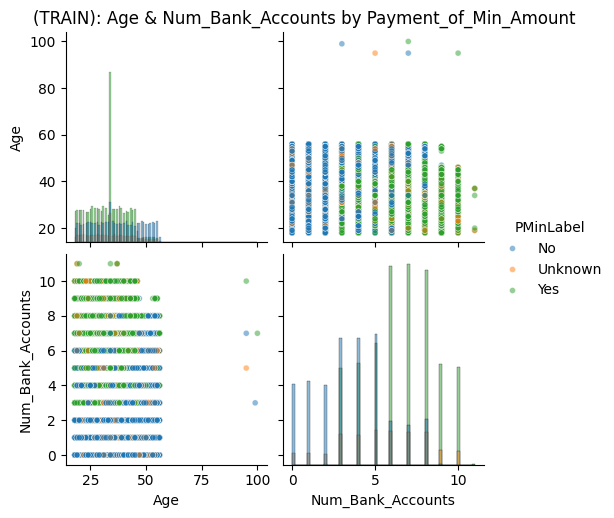

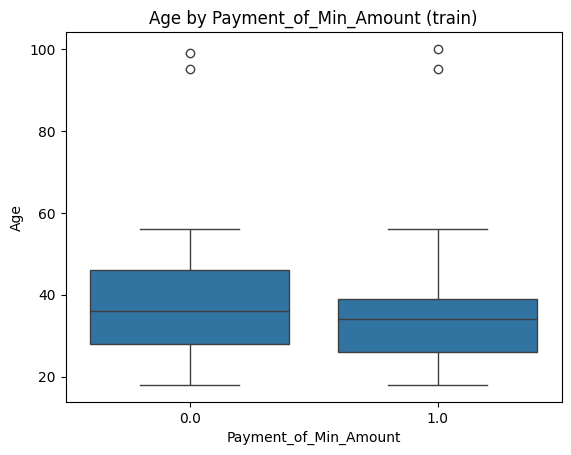

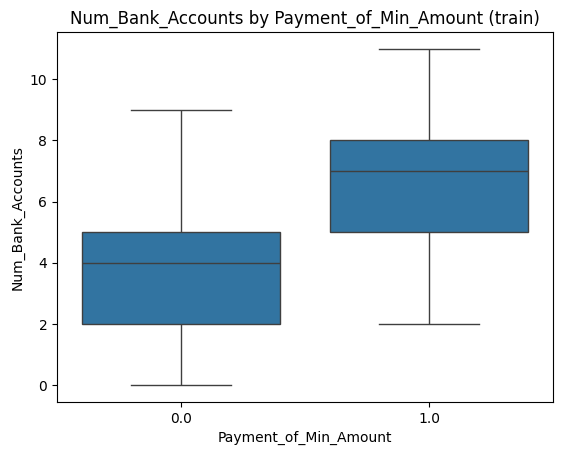

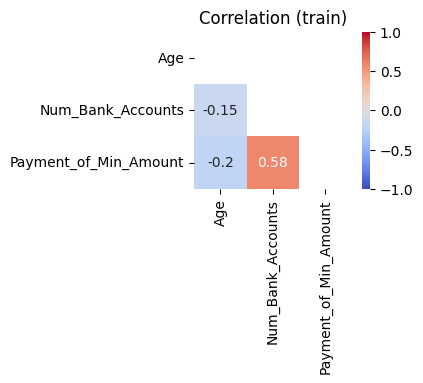

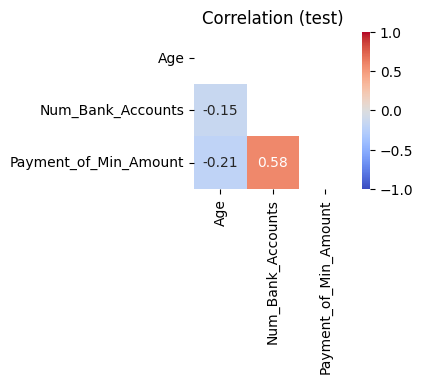

In [ ]:


_plot_train = train[["Age","Num_Bank_Accounts","Payment_of_Min_Amount"]].copy()
_plot_train["PMinLabel"] = _plot_train["Payment_of_Min_Amount"].map({1:"Yes", 0:"No"}).fillna("Unknown")

sns.pairplot(
    data=_plot_train,
    vars=["Age","Num_Bank_Accounts"],
    hue="PMinLabel",
    diag_kind="hist",
    plot_kws={"alpha":0.5, "s":18}
)
plt.suptitle("(TRAIN): Age & Num_Bank_Accounts by Payment_of_Min_Amount", y=1.02)
plt.show()


# Age by Payment_of_Min_Amount
sns.boxplot(data=train, x="Payment_of_Min_Amount", y="Age")
plt.title("Age by Payment_of_Min_Amount (train)")
plt.show()

# Num_Bank_Accounts by Payment_of_Min_Amount
sns.boxplot(data=train, x="Payment_of_Min_Amount", y="Num_Bank_Accounts")
plt.title("Num_Bank_Accounts by Payment_of_Min_Amount (train)")
plt.show()

#We verify here that NUmber of bank accounts and payment of min acmount have a high correlation, The more bank accounts a person has, the more they tend to pay their minimum payment
cols = ["Age", "Num_Bank_Accounts", "Payment_of_Min_Amount"]

def corr_heatmap(df, title):
    c = df[cols].corr(method="pearson", numeric_only=True)
    mask = np.triu(np.ones_like(c, dtype=bool))
    plt.figure(figsize=(4.5, 3.8))
    sns.heatmap(c, mask=mask, annot=True, vmin=-1, vmax=1, square=True, cmap="coolwarm")
    plt.title(title)
    plt.tight_layout()
    plt.show()

corr_heatmap(train, "Correlation (train)")
corr_heatmap(test,  "Correlation (test)")

#Grouping by person, have not looked into how to make it better from here, for now its very very basic. Ask if theres a specific way we want to handle it, since we have a bunch of cols to deal with
#nothing complicated just allowing for one row per "name" Customer ID, instead of multiple instances of the same person
df_person = (
    train.groupby("Customer_ID", as_index=False)
         .agg({
             "Age": "mean",
             "Num_Bank_Accounts": "mean",
             "Payment_of_Min_Amount": lambda x: x.mode(dropna=True).iloc[0] if not x.mode(dropna=True).empty else np.nan
         })
)




### Alicia

Credit_Mix

In [ ]:
print("dtype:", train["Credit_Mix"].dtype)
print(train["Credit_Mix"].head(10))
print("nunique:", train["Credit_Mix"].nunique(dropna=True))
print("unique:", train["Credit_Mix"].unique()) # View credit mix classifications
print("null count:", train["Credit_Mix"].isna().sum(), "/", len(train))

dtype: object
0       _
1    Good
2    Good
3    Good
4    Good
5    Good
6    Good
7    Good
8    Good
9    Good
Name: Credit_Mix, dtype: object
nunique: 4
unique: ['_' 'Good' 'Standard' 'Bad']
null count: 0 / 91567


The value _ is available for the Credit_Mix column, possibly to represent null values, but these entries were not caught previously because they were not explicitly set to null. More cleaning may be needed.

In [ ]:
len(train[train["Credit_Mix"] == '_']) / len(train)

0.20278047768300808

Around 20% of the data is labeled with _, so it's best not to drop affected rows right now, and imputation is somewhat risky because not having a credit mix status might be significant. The values in these rows have been replaced with 'Unknown' for readability. For tree-based models, this should be okay.

In [ ]:
train["Credit_Mix"] = train["Credit_Mix"].replace('_', 'Unknown')
test["Credit_Mix"] = test["Credit_Mix"].replace('_', 'Unknown')

We can consider converting Credit_Mix to an ordinal categorical column, but the 'Unknown' value would need to be handled first.

*Outstanding_Debt*

In [ ]:
print("dtype:", train["Outstanding_Debt"].dtype)
print(train["Outstanding_Debt"].head(10))
print("nunique:", train["Outstanding_Debt"].nunique(dropna=True))
print("unique:", train["Outstanding_Debt"].unique()) # View credit mix classifications
print("null count:", train["Outstanding_Debt"].isna().sum(), "/", len(train))

dtype: object
0    809.98
1    809.98
2    809.98
3    809.98
4    809.98
5    809.98
6    809.98
7    809.98
8    605.03
9    605.03
Name: Outstanding_Debt, dtype: object
nunique: 13103
unique: ['809.98' '605.03' '1303.01' ... '3571.7_' '3571.7' '502.38']
null count: 0 / 91567


This column is of dtype object, so we want to convert it to numeric. There are some values that end in _, so we want to handle these.

In [ ]:
train['Outstanding_Debt'] = train['Outstanding_Debt'].str.rstrip('_')
test['Outstanding_Debt'] = test['Outstanding_Debt'].str.rstrip('_')

underscore_count_train = train['Outstanding_Debt'].str.contains('_').sum()
print("Number of values containing '_' in training set:", underscore_count_train)

underscore_count_test = test['Outstanding_Debt'].str.contains('_').sum()
print("Number of values containing '_' in testing set:", underscore_count_test)

Number of values containing '_' in training set: 0
Number of values containing '_' in testing set: 0


In [ ]:
train['Outstanding_Debt'] = pd.to_numeric(train['Outstanding_Debt'], errors='coerce')
test['Outstanding_Debt'] = pd.to_numeric(test['Outstanding_Debt'], errors='coerce')

Check for null values and negative values.

In [ ]:
null_count_train = train['Outstanding_Debt'].isnull().sum()
print("Number of null values in training set:", null_count_train)

neg_count_train = (train['Outstanding_Debt'] < 0).sum()
print("Number of negative values in training set:", neg_count_train)

null_count_test = test['Outstanding_Debt'].isnull().sum()
print("Number of null values in testing set:", null_count_test)

neg_count_test = (test['Outstanding_Debt'] < 0).sum()
print("Number of negative values in testing set:", neg_count_test)

Number of null values in training set: 0
Number of negative values in training set: 0
Number of null values in testing set: 0
Number of negative values in testing set: 0


Check for outliers.

In [ ]:
Q1 = train['Outstanding_Debt'].quantile(0.25)
Q3 = train['Outstanding_Debt'].quantile(0.75)
IQR = Q3 - Q1

outliers = train[(train['Outstanding_Debt'] < Q1 - 1.5*IQR) | (train['Outstanding_Debt'] > Q3 + 1.5*IQR)]

print("Number of outliers in training set:", len(outliers))
print("Percentage of outliers in training set:", len(outliers)/len(train) * 100)

Q1_test = test['Outstanding_Debt'].quantile(0.25)
Q3_test = test['Outstanding_Debt'].quantile(0.75)
IQR_test = Q3_test - Q1_test

outliers_test = test[(test['Outstanding_Debt'] < Q1_test - 1.5*IQR_test) |
                     (test['Outstanding_Debt'] > Q3_test + 1.5*IQR_test)]

print("Number of outliers in test set:", len(outliers_test))
print("Percentage of outliers in test set:", len(outliers_test)/len(test) * 100)

Number of outliers in training set: 4832
Percentage of outliers in training set: 5.277010276628043
Number of outliers in test set: 2380
Percentage of outliers in test set: 5.202868135711787


Handle outliers. Check skew first. From the plot, the data is right-skewed.

<Axes: xlabel='Outstanding_Debt'>

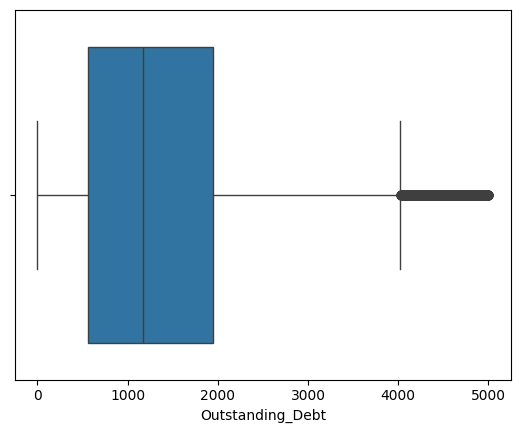

In [ ]:
import seaborn as sns
sns.boxplot(x=train['Outstanding_Debt'])

Method 1: Winsorize only the top 1% (optional for tree models). None of the outliers are particularly extreme when considering the possible values for outstanding debt in dollars.

In [ ]:
'''
train['Outstanding_Debt'] = winsorize(train['Outstanding_Debt'], limits=(0, 0.01))
test['Outstanding_Debt'] = winsorize(test['Outstanding_Debt'], limits=(0, 0.01))
'''

"\ntrain['Outstanding_Debt'] = winsorize(train['Outstanding_Debt'], limits=(0, 0.01))\ntest['Outstanding_Debt'] = winsorize(test['Outstanding_Debt'], limits=(0, 0.01))\n"

Method 2: Log transform (better for skewed distributions)

In [ ]:
'''
train['Outstanding_Debt'] = np.log1p(train['Outstanding_Debt'])
test['Outstanding_Debt'] = np.log1p(test['Outstanding_Debt'])
'''

"\ntrain['Outstanding_Debt'] = np.log1p(train['Outstanding_Debt'])\ntest['Outstanding_Debt'] = np.log1p(test['Outstanding_Debt'])\n"

Credit_Utilization_Ratio

Check for null values and negative values.

In [ ]:
null_count = train['Credit_Utilization_Ratio'].isnull().sum()
print("Number of null values in training set:", null_count)

neg_count = (train['Credit_Utilization_Ratio'] < 0).sum()
print("Number of negative values in training set:", neg_count)

null_count_test = test['Credit_Utilization_Ratio'].isnull().sum()
print("Number of null values in test set:", null_count_test)

neg_count_test = (test['Credit_Utilization_Ratio'] < 0).sum()
print("Number of negative values in test set:", neg_count_test)

Number of null values in training set: 0
Number of negative values in training set: 0
Number of null values in test set: 0
Number of negative values in test set: 0


In [ ]:
Q1 = train['Credit_Utilization_Ratio'].quantile(0.25)
Q3 = train['Credit_Utilization_Ratio'].quantile(0.75)
IQR = Q3 - Q1

outliers = train[(train['Credit_Utilization_Ratio'] < Q1 - 1.5*IQR) | (train['Credit_Utilization_Ratio'] > Q3 + 1.5*IQR)]

print("Number of outliers in training set:", len(outliers))
print("Percentage of outliers in training set:", len(outliers)/len(train) * 100)

Q1_test = test['Credit_Utilization_Ratio'].quantile(0.25)
Q3_test = test['Credit_Utilization_Ratio'].quantile(0.75)
IQR_test = Q3_test - Q1_test

outliers_test = test[(test['Credit_Utilization_Ratio'] < Q1_test - 1.5*IQR_test) |
                     (test['Credit_Utilization_Ratio'] > Q3_test + 1.5*IQR_test)]

print("Number of outliers in test set:", len(outliers_test))
print("Percentage of outliers in test set:", len(outliers_test)/len(test) * 100)

Number of outliers in training set: 4
Percentage of outliers in training set: 0.004368385990586128
Number of outliers in test set: 0
Percentage of outliers in test set: 0.0


In [ ]:
# For training set
total_train = len(train)
valid_count_train = train[(train['Credit_Utilization_Ratio'] >= 0) &
                          (train['Credit_Utilization_Ratio'] <= 100)].shape[0]
valid_percentage_train = (valid_count_train / total_train) * 100
print(f"Training set: Percentage of rows between 0 and 100: {valid_percentage_train:.2f}%")

# For test set
total_test = len(test)
valid_count_test = test[(test['Credit_Utilization_Ratio'] >= 0) &
                        (test['Credit_Utilization_Ratio'] <= 100)].shape[0]
valid_percentage_test = (valid_count_test / total_test) * 100
print(f"Test set: Percentage of rows between 0 and 100: {valid_percentage_test:.2f}%")

Training set: Percentage of rows between 0 and 100: 100.00%
Test set: Percentage of rows between 0 and 100: 100.00%


Since there are few outliers and all rows represent valid percentages, this column is mostly good as is.

In [ ]:
# Overview

# List all columns so far
processed_columns = ['Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio']
for col in processed_columns:
    print(f"\n{col}:")

    if col == 'Type_of_Loan':
        # Report categorical column stats
        train_missing = (train[col] == 'Not Specified').sum()
        test_missing = (test[col] == 'Not Specified').sum()
        print(f"  Train 'Not Specified': {train_missing} ({train_missing/len(train)*100:.1f}%)")
        print(f"  Test 'Not Specified': {test_missing} ({test_missing/len(test)*100:.1f}%)")
        print(f"  Train unique categories: {train[col].nunique()}")
        print(f"  Test unique categories: {test[col].nunique()}")
    else:
        # Report numeric column stats
        train_missing = (train[col] == -99999).sum()
        test_missing = (test[col] == -99999).sum()
        train_valid = len(train) - train_missing
        test_valid = len(test) - test_missing

        print(f"  Train missing: {train_missing} ({train_missing/len(train)*100:.1f}%)")
        print(f"  Test missing: {test_missing} ({test_missing/len(test)*100:.1f}%)")
        print(f"  Train valid: {train_valid} ({train_valid/len(train)*100:.1f}%)")
        print(f"  Test valid: {test_valid} ({test_valid/len(test)*100:.1f}%)")

print(f"\nFinal dataset shapes:")
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")


Credit_Mix:
  Train missing: 0 (0.0%)
  Test missing: 0 (0.0%)
  Train valid: 91567 (100.0%)
  Test valid: 45744 (100.0%)

Outstanding_Debt:
  Train missing: 0 (0.0%)
  Test missing: 0 (0.0%)
  Train valid: 91567 (100.0%)
  Test valid: 45744 (100.0%)

Credit_Utilization_Ratio:
  Train missing: 0 (0.0%)
  Test missing: 0 (0.0%)
  Train valid: 91567 (100.0%)
  Test valid: 45744 (100.0%)

Final dataset shapes:
Train: (91567, 39)
Test: (45744, 39)


In [ ]:
train = pd.get_dummies(train, columns=["Credit_Mix"], drop_first=False)
test = pd.get_dummies(test, columns=["Credit_Mix"], drop_first=False)


In [ ]:
print(test.shape)
print(train.shape)

(45744, 42)
(91567, 42)


### Ellen

#### Further Exploration + Cleaning

Occupation

In [ ]:
print("Occupation (train): ")
print(train["Occupation"].describe())
print("\n")
print("Occupation (test): ")
print(test["Occupation"].describe())
print("\n")

Occupation (train): 
count       91567
unique         16
top       _______
freq         6456
Name: Occupation, dtype: object


Occupation (test): 
count       45744
unique         16
top       _______
freq         3155
Name: Occupation, dtype: object




In [ ]:
# Both train and test have tons of unknown occupation --> mark null
# Replace '_______' with NaN in 'Occupation' column
train['Occupation'] = train['Occupation'].replace('_______', np.nan)
test['Occupation'] = test['Occupation'].replace('_______', np.nan)

# Check the number of null values in 'Occupation' after replacement
print('\nNull Values:')
print("train['Occupation']:", train['Occupation'].isnull().sum())
print("test['Occupation']:", test['Occupation'].isnull().sum())


Null Values:
train['Occupation']: 6456
test['Occupation']: 3155


Annual Income

In [ ]:
# --> Annual_income is object rn, needs to fix

# Remove "_" from Annual_Income and convert to numeric
train['Annual_Income'] = train['Annual_Income'].astype(str).str.replace('_', '', regex=False)
test['Annual_Income'] = test['Annual_Income'].astype(str).str.replace('_', '', regex=False)

train['Annual_Income'] = pd.to_numeric(train['Annual_Income'], errors='coerce')
test['Annual_Income'] = pd.to_numeric(test['Annual_Income'], errors='coerce')

# Display the data types to confirm the changes
print("Train Annual Income dtype:", train['Annual_Income'].dtype)
print("Test Annual Income dtype:", test['Annual_Income'].dtype)

Train Annual Income dtype: float64
Test Annual Income dtype: float64


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

print('Train')
display(train[['Occupation', 'Annual_Income', 'Monthly_Inhand_Salary']].describe())
print('\nTest')
display(test[['Occupation', 'Annual_Income', 'Monthly_Inhand_Salary']].describe())


Train


,Annual_Income,Monthly_Inhand_Salary
count,91567.00,77801.00
mean,176111.50,4196.70
std,1426248.88,3187.73
min,7005.93,303.65
25%,19434.54,1625.02
50%,37577.82,3091.39
75%,72817.88,5967.33
max,24198062.00,15204.63



Test


,Annual_Income,Monthly_Inhand_Salary
count,45744.00,38909.00
mean,163449.34,4176.04
std,1337178.18,3171.32
min,7005.93,303.65
25%,19426.81,1622.26
50%,37547.68,3082.27
75%,72674.76,5917.51
max,24137255.00,15204.63


Annual Income
* Mean: ~176k (train), ~166k (test)
* Median: ~37k
* Max: ~24M (!! huge outliers)
* Std dev: ~1.4M (massive compared to mean → clear evidence of extreme outliers)

Monthly Inhand Salary
* Mean: ~4.1k
* Median: ~3k
* Max: ~15k
* Std dev: ~3.1k (more reasonable compared to mean, but still some outliers)

*test data have lower mean (166334.20), while the most freq is higher (72524.2) with the same min and max

Null Values

In [ ]:
null_values_train = train.isnull().sum()
null_values_train[["Occupation", "Annual_Income", "Monthly_Inhand_Salary"]]

,0
Occupation,6456
Annual_Income,0
Monthly_Inhand_Salary,13766


#####Visualizations

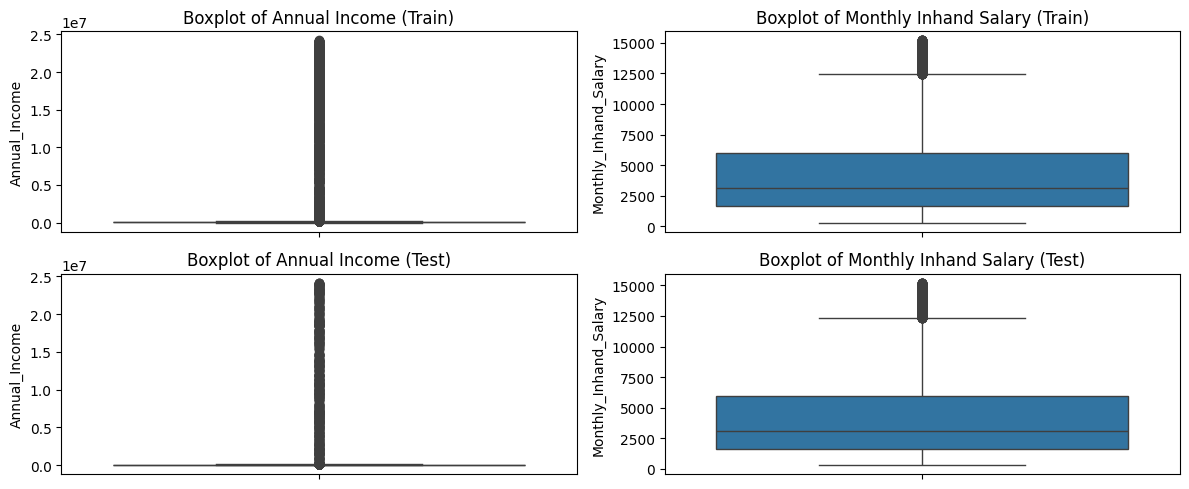

In [ ]:
plt.figure(figsize=(12, 5))

#TRAIN
plt.subplot(2, 2, 1)
sns.boxplot(y=train['Annual_Income'])
plt.title('Boxplot of Annual Income (Train)')


plt.subplot(2, 2, 2)
sns.boxplot(y=train['Monthly_Inhand_Salary'])
plt.title('Boxplot of Monthly Inhand Salary (Train)')

#TEST
plt.subplot(2, 2, 3)
sns.boxplot(y=test['Annual_Income'])
plt.title('Boxplot of Annual Income (Test)')


plt.subplot(2, 2, 4)
sns.boxplot(y=test['Monthly_Inhand_Salary'])
plt.title('Boxplot of Monthly Inhand Salary (Test)')


plt.tight_layout()
plt.show()

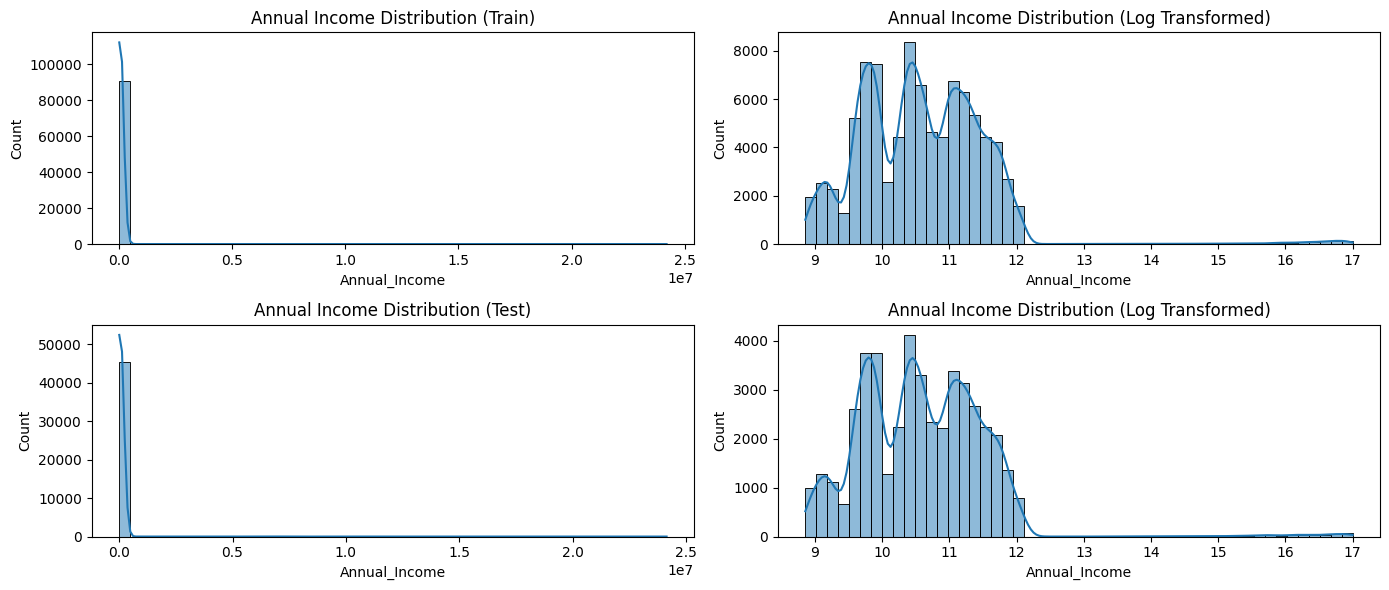

In [ ]:
plt.figure(figsize=(14,6))

#TRAIN
# Histogram with KDE (raw)
plt.subplot(2, 2, 1)
sns.histplot(train['Annual_Income'], bins=50, kde=True)
plt.title('Annual Income Distribution (Train)')

# Histogram with KDE (log scale)
plt.subplot(2, 2, 2)
sns.histplot(np.log1p(train['Annual_Income']), bins=50, kde=True)
plt.title('Annual Income Distribution (Log Transformed)')

#TEST
# Histogram with KDE (raw)
plt.subplot(2, 2, 3)
sns.histplot(test['Annual_Income'], bins=50, kde=True)
plt.title('Annual Income Distribution (Test)')

# Histogram with KDE (log scale)
plt.subplot(2, 2, 4)
sns.histplot(np.log1p(test['Annual_Income']), bins=50, kde=True)
plt.title('Annual Income Distribution (Log Transformed)')

plt.tight_layout()
plt.show()

extreme outliers above 0.1, very heavily right skewed

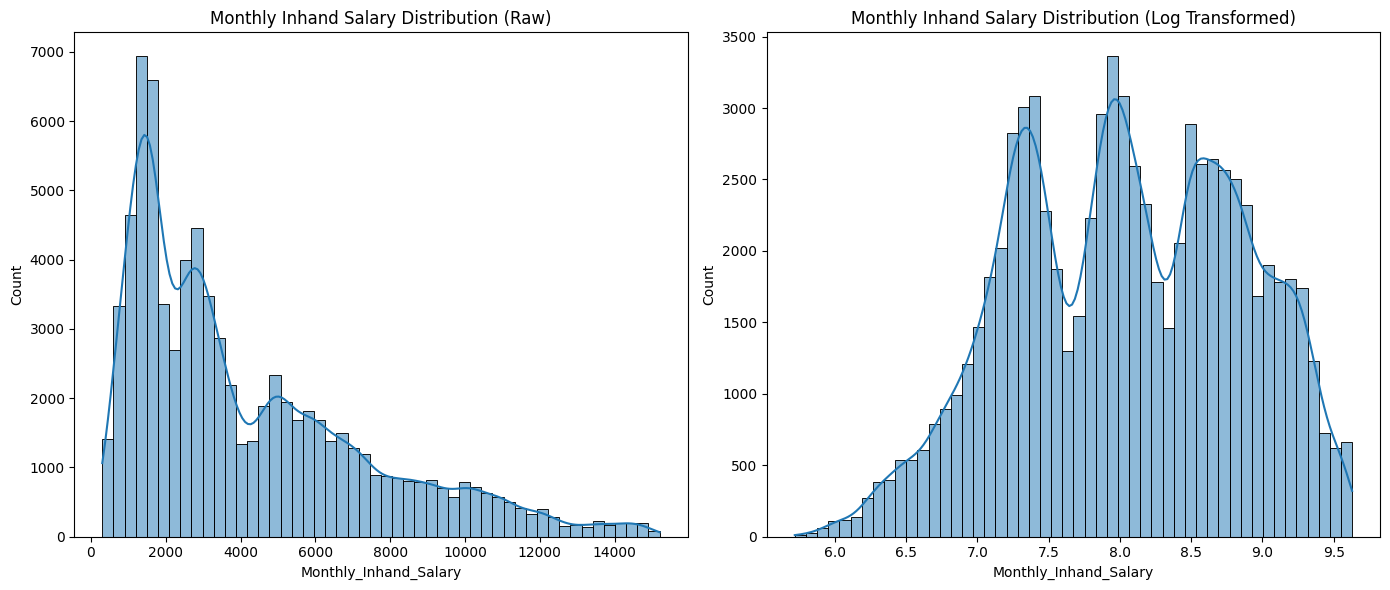

In [ ]:
plt.figure(figsize=(14,6))

# Histogram with KDE (train)
plt.subplot(1, 2, 1)
sns.histplot(train['Monthly_Inhand_Salary'], bins=50, kde=True)
plt.title('Monthly Inhand Salary Distribution (Raw)')

# Histogram with KDE (log scale)
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(train['Monthly_Inhand_Salary']), bins=50, kde=True)
plt.title('Monthly Inhand Salary Distribution (Log Transformed)')

plt.tight_layout()
plt.show()

####Grouping by person

In [ ]:
# checking for duplicates and removing before grouping
duplicates = train.duplicated().sum()
print(f"Number of duplicate rows (Train): {duplicates}")

duplicates = test.duplicated().sum()
print(f"Number of duplicate rows (Test): {duplicates}")

Number of duplicate rows (Train): 0
Number of duplicate rows (Test): 0


In [ ]:
def summarize_person(group):
    summary = {}
    # numeric features
    summary["Annual_Income_median"] = group["Annual_Income"].median()
    summary["Monthly_Salary_median"] = group["Monthly_Inhand_Salary"].median()

    # inconsistency flag (example: std/mean ratio > 0.5)
    summary["Annual_Income_inconsistent"] = (
        (group["Annual_Income"].std() / (group["Annual_Income"].mean()+1e-9)) > 0.5
    )

    summary["Monthly_Salary_inconsistent"] = (
        (group["Monthly_Inhand_Salary"].std() / (group["Monthly_Inhand_Salary"].mean()+1e-9)) > 0.5
    )

    return pd.Series(summary)

df_person = train.groupby("Customer_ID").apply(summarize_person).reset_index()# group by person



/tmp/ipython-input-3517748953.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_person = train.groupby("Customer_ID").apply(summarize_person).reset_index()# group by person


In [ ]:
df_person.shape
df_person.head(10)

,Customer_ID,Annual_Income_median,Monthly_Salary_median,Annual_Income_inconsistent,Monthly_Salary_inconsistent
0,CUS_0x1000,30625.94,2706.16,False,False
1,CUS_0x1009,52312.68,4250.39,False,False
2,CUS_0x100b,113781.39,9549.78,False,False
3,CUS_0x1011,58918.47,5208.87,False,False
4,CUS_0x1013,98620.98,7962.42,False,False
5,CUS_0x1015,46951.02,3725.59,False,False
6,CUS_0x1018,61194.81,5014.57,True,False
7,CUS_0x1026,170614.28,14463.86,False,False
8,CUS_0x102d,89064.52,7256.04,False,False
9,CUS_0x102e,50807.44,4197.95,False,False


In [ ]:
display(df_person[['Annual_Income_median', 'Monthly_Salary_median']].describe())

# For comparison
display(train[['Occupation', 'Annual_Income', 'Monthly_Inhand_Salary']].describe())

,Annual_Income_median,Monthly_Salary_median
count,12500.00,12500.00
mean,50505.12,4198.21
std,38300.76,3187.49
min,7005.93,303.65
25%,19342.97,1626.72
50%,36999.71,3094.83
75%,71683.47,5962.53
max,179987.28,15204.63


,Annual_Income,Monthly_Inhand_Salary
count,91567.00,77801.00
mean,176111.50,4196.70
std,1426248.88,3187.73
min,7005.93,303.65
25%,19434.54,1625.02
50%,37577.82,3091.39
75%,72817.88,5967.33
max,24198062.00,15204.63


#####Visualization after grouping

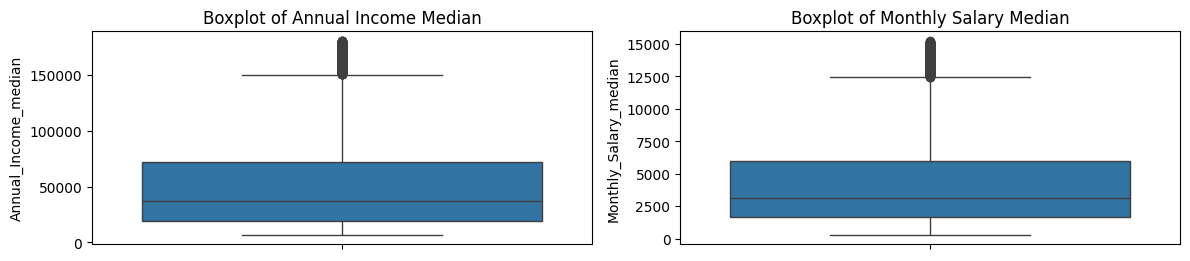

In [ ]:
plt.figure(figsize=(12, 5))

#TRAIN
plt.subplot(2, 2, 1)
sns.boxplot(y=df_person['Annual_Income_median'])
plt.title('Boxplot of Annual Income Median')


plt.subplot(2, 2, 2)
sns.boxplot(y=df_person['Monthly_Salary_median'])
plt.title('Boxplot of Monthly Salary Median')


plt.tight_layout()
plt.show()

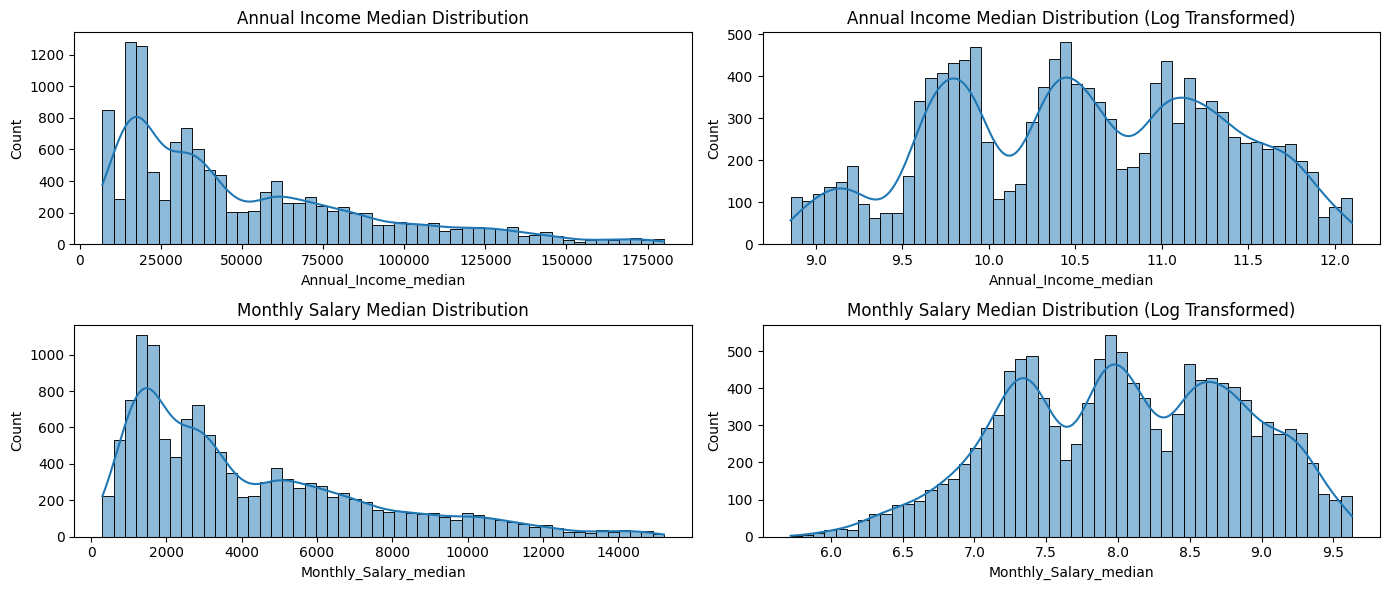

In [ ]:
plt.figure(figsize=(14,6))

#Annual
# Histogram with KDE (raw)
plt.subplot(2, 2, 1)
sns.histplot(df_person['Annual_Income_median'], bins=50, kde=True)
plt.title('Annual Income Median Distribution')

# Histogram with KDE (log scale)
plt.subplot(2, 2, 2)
sns.histplot(np.log1p(df_person['Annual_Income_median']), bins=50, kde=True)
plt.title('Annual Income Median Distribution (Log Transformed)')

#Monthly
# Histogram with KDE (raw)
plt.subplot(2, 2, 3)
sns.histplot(df_person['Monthly_Salary_median'], bins=50, kde=True)
plt.title('Monthly Salary Median Distribution')

# Histogram with KDE (log scale)
plt.subplot(2, 2, 4)
sns.histplot(np.log1p(df_person['Monthly_Salary_median']), bins=50, kde=True)
plt.title('Monthly Salary Median Distribution (Log Transformed)')

plt.tight_layout()
plt.show()

#### Additional Data Cleaning

make new column for number of times reported for monthly inhand salary, certain people may result in better data, so this new column can add new findings.

In [ ]:
# Calculate the count of non-null Monthly_Inhand_Salary entries for each customer
monthly_salary_counts = train.groupby('Customer_ID')['Monthly_Inhand_Salary'].count().reset_index(name='Monthly_Salary_Report_Count')

# Merge this count back into the original train DataFrame
train = pd.merge(train, monthly_salary_counts, on='Customer_ID', how='left')

# Display the first few rows to check the new column
display(train[['Customer_ID', 'Monthly_Inhand_Salary', 'Monthly_Salary_Report_Count']].head(10))

,Customer_ID,Monthly_Inhand_Salary,Monthly_Salary_Report_Count
0,CUS_0xd40,1824.84,4
1,CUS_0xd40,NaN,4
2,CUS_0xd40,NaN,4
3,CUS_0xd40,NaN,4
4,CUS_0xd40,1824.84,4
5,CUS_0xd40,NaN,4
6,CUS_0xd40,1824.84,4
7,CUS_0xd40,1824.84,4
8,CUS_0x21b1,3037.99,5
9,CUS_0x21b1,3037.99,5


In [ ]:
# Test
monthly_salary_counts_test = (
    test.groupby('Customer_ID')['Monthly_Inhand_Salary']
        .count()
        .reset_index(name='Monthly_Salary_Report_Count')
)

test = test.merge(monthly_salary_counts_test, on='Customer_ID', how='left')

####Summary

In [ ]:
test['Occupation'].dtype

dtype('O')

In [ ]:
test['Annual_Income'].dtype

dtype('float64')

In [ ]:
test['Monthly_Inhand_Salary'].dtype

dtype('float64')

In [ ]:
print(train["Occupation"].dtype)
print("Unique values:", train["Occupation"].nunique())

object
Unique values: 15


In [ ]:
train["Occupation"].value_counts()

,count
Occupation,
Lawyer,6006
Architect,5805
Engineer,5804
Mechanic,5796
Scientist,5785
Accountant,5752
Teacher,5725
Developer,5685
Media_Manager,5675


In [ ]:
train["Occupation"].nunique()

15

In [ ]:
print(train["Occupation"].isna().sum())
print(train["Occupation"].unique())

6456
['Scientist' nan 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


In [ ]:
train["Occupation"] = (
    train["Occupation"]
    .replace({"_______": "Unknown"})
    .fillna("Unknown")
)

In [ ]:
test["Occupation"] = (
    test["Occupation"]
    .replace({"_______": "Unknown"})
    .fillna("Unknown")
)

In [ ]:
train = pd.get_dummies(train, columns=["Occupation"], drop_first=True)

In [ ]:
test = pd.get_dummies(test, columns=["Occupation"], drop_first=True)

In [ ]:
print(test.shape)
print(train.shape)

(45744, 57)
(91567, 57)


### Shizuka

#### Delay from due date

##### Understanding data

We observe that there are no null values for this feature.

In [ ]:
df_train = train["Delay_from_due_date"]
print("nunique:", df_train.nunique(dropna=False))
print("null count:", df_train.isna().sum(), "/", len(df_train))
print("type", df_train.dtype)

nunique: 73
null count: 0 / 100000
type int64


In [ ]:
df_test = test["Delay_from_due_date"]
print("nunique:", df_test.nunique(dropna=False))
print("null count:", df_test.isna().sum(), "/", len(df_test))

nunique: 73
null count: 0 / 50000


We observe that though rare, there are some negative values.

In [ ]:
neg_mask_train = df_train < 0
neg_mask_train.sum()

np.int64(591)

In [ ]:
neg_mask_test = df_test < 0
neg_mask_test.sum()

np.int64(298)

Determine if these negative values seems valid or not.

In [ ]:
print("unique negatives:", np.sort(df_train[neg_mask_train].unique()))

print("\nvalue_counts (negatives only):")
print(df_train[neg_mask_train].value_counts().sort_index())

print("\nvalue_counts (all values):")
print(df_train.value_counts().sort_index())

unique negatives: [-5 -4 -3 -2 -1]

value_counts (negatives only):
Delay_from_due_date
-5     33
-4     62
-3    118
-2    168
-1    210
Name: count, dtype: int64

value_counts (all values):
Delay_from_due_date
-5      33
-4      62
-3     118
-2     168
-1     210
      ... 
 63     69
 64     64
 65     56
 66     32
 67     22
Name: count, Length: 73, dtype: int64


In [ ]:
print("unique negatives:", np.sort(df_test[neg_mask_test].unique()))

print("\nvalue_counts (negatives only):")
print(df_test[neg_mask_test].value_counts().sort_index())

print("\nvalue_counts (all values):")
print(df_test.value_counts().sort_index())

unique negatives: [-5 -4 -3 -2 -1]

value_counts (negatives only):
Delay_from_due_date
-5     18
-4     49
-3     59
-2     71
-1    101
Name: count, dtype: int64

value_counts (all values):
Delay_from_due_date
-5      18
-4      49
-3      59
-2      71
-1     101
      ... 
 63     21
 64     33
 65     30
 66     12
 67      7
Name: count, Length: 73, dtype: int64


After discussing this with Saurabh, we confirmed that the range [-5, 67] seems to be within the range of valid delay from due date. Hence, these valid outliers will be kept as is.

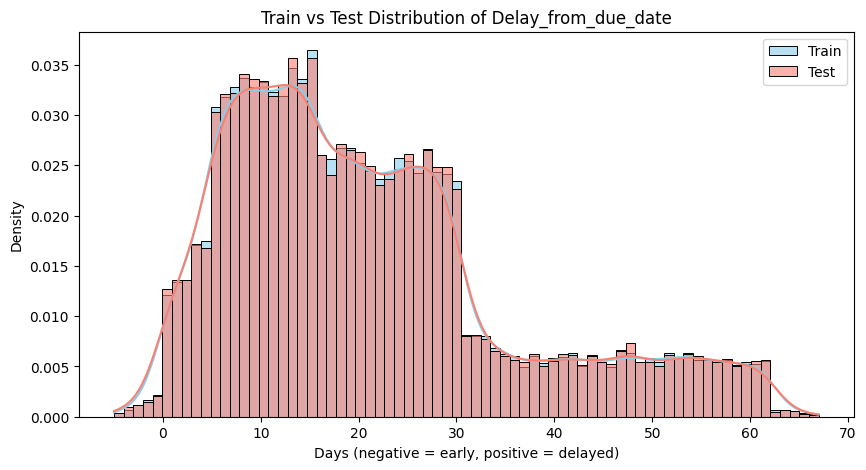

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_train, bins=73, color='skyblue', label='Train', kde=True, stat='density', alpha=0.6)
sns.histplot(df_test, bins=73, color='salmon', label='Test', kde=True, stat='density', alpha=0.6)
plt.title("Train vs Test Distribution of Delay_from_due_date")
plt.xlabel("Days (negative = early, positive = delayed)")
plt.ylabel("Density")
plt.legend()
plt.show()


Both the train and test sets follow almost identical shapes. This consistency suggests that the feature generalizes well between the training and test datasets, making it reliable for modeling.

Reference: https://www.kaggle.com/discussions/questions-and-answers/236964

/tmp/ipython-input-1538236578.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train["Credit_Score"], y=train["Delay_from_due_date"], palette="pastel")


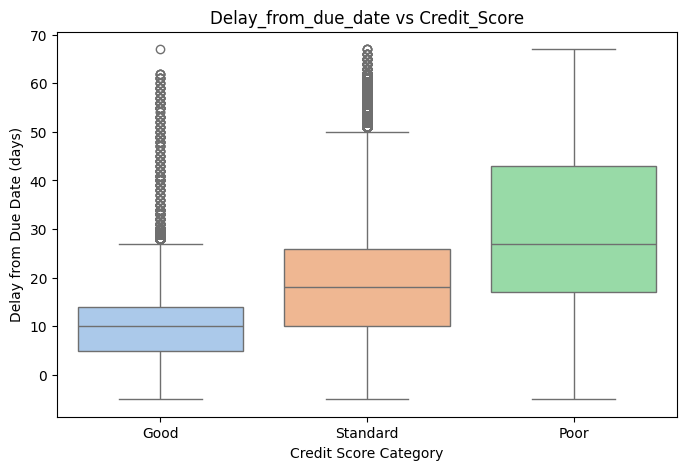

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=train["Credit_Score"], y=train["Delay_from_due_date"], palette="pastel")
plt.title("Delay_from_due_date vs Credit_Score")
plt.xlabel("Credit Score Category")
plt.ylabel("Delay from Due Date (days)")
plt.show()


In [ ]:
group_stats = train.groupby("Credit_Score")["Delay_from_due_date"].agg(["mean", "median", "std", "min", "max"]).reset_index()
print(group_stats)

if train["Credit_Score"].dtype != "object":
    corr = train["Credit_Score"].corr(train["Delay_from_due_date"], method="spearman")
    print("\nSpearman correlation:", round(corr, 3))


  Credit_Score       mean  median        std  min  max
0         Good  10.892753    10.0   8.458714   -5   67
1         Poor  29.744051    27.0  16.311695   -5   67
2     Standard  19.749577    18.0  12.988397   -5   67


The mean and median values of Delay_from_due_date increase steadily across the credit score categories. Customers classified as “Good” have an average delay of about 10.9 days, while those with “Standard” and “Poor” scores exhibit average delays of approximately 19.7 and 29.7 days, respectively.

The range of values is consistent across groups (−5 to 67), but the standard deviation is notably higher for the “Poor” category, indicating greater variability in payment behavior. This pattern suggests that customers with weaker credit scores are not only more likely to pay late but also show less predictable payment patterns.

##### Time Series analysis

In [ ]:
# Create a month number for sorting
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

train["Month_Num"] = train["Month"].map(month_order)

monthly_trend = (
    train.groupby(["Customer_ID", "Month_Num"])["Delay_from_due_date"]
    .mean() # turn SeriesGroupBy object into a Series
    .reset_index() # after groupby, customerID and monthnum are not columns anymore, but rather indices, so ensure those two features are valid columns
    .sort_values(["Customer_ID", "Month_Num"])
)
monthly_trend.head()


,Customer_ID,Month_Num,Delay_from_due_date
0,CUS_0x1000,1,62.0
1,CUS_0x1000,2,62.0
2,CUS_0x1000,3,62.0
3,CUS_0x1000,4,64.0
4,CUS_0x1000,5,67.0


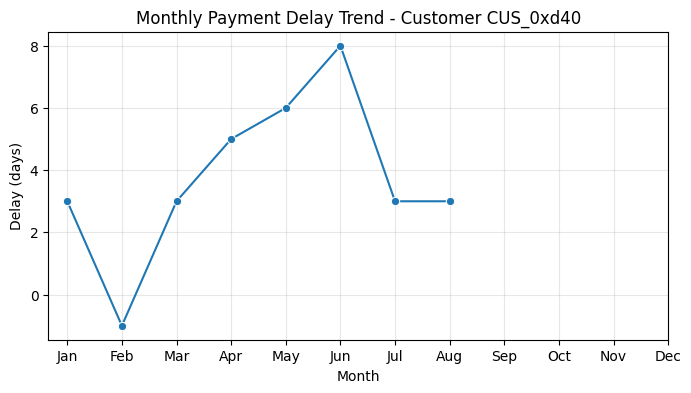

In [ ]:
# Observe random customer
sample_id = train["Customer_ID"].iloc[0]
cust_trend = monthly_trend[monthly_trend["Customer_ID"] == sample_id]

plt.figure(figsize=(8, 4))
sns.lineplot(data=cust_trend, x="Month_Num", y="Delay_from_due_date", marker="o")
plt.title(f"Monthly Payment Delay Trend - Customer {sample_id}")
plt.xlabel("Month")
plt.ylabel("Delay (days)")
plt.xticks(range(1, 13),
           ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.grid(True, alpha=0.3)
plt.show()


/tmp/ipython-input-3243670777.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_trend["Rolling_3M"] = cust_trend["Delay_from_due_date"].rolling(window=3, min_periods=1).mean()
/tmp/ipython-input-3243670777.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_trend["Rolling_6M"] = cust_trend["Delay_from_due_date"].rolling(window=6, min_periods=1).mean()


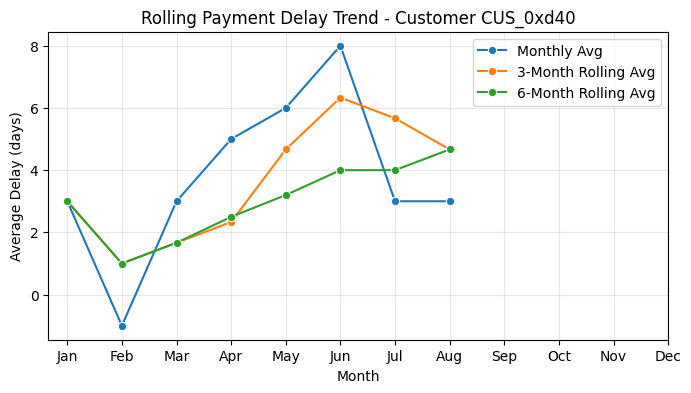

In [ ]:
# Observe 3 month and 6 month rolling average
# Reference: https://milvus.io/ai-quick-reference/what-is-a-rolling-window-in-time-series-analysis

cust_trend["Rolling_3M"] = cust_trend["Delay_from_due_date"].rolling(window=3, min_periods=1).mean()
cust_trend["Rolling_6M"] = cust_trend["Delay_from_due_date"].rolling(window=6, min_periods=1).mean()

plt.figure(figsize=(8, 4))
sns.lineplot(data=cust_trend, x="Month_Num", y="Delay_from_due_date", marker="o", label="Monthly Avg")
sns.lineplot(data=cust_trend, x="Month_Num", y="Rolling_3M", marker="o", label="3-Month Rolling Avg")
sns.lineplot(data=cust_trend, x="Month_Num", y="Rolling_6M", marker="o", label="6-Month Rolling Avg")

plt.title(f"Rolling Payment Delay Trend - Customer {sample_id}")
plt.xlabel("Month")
plt.ylabel("Average Delay (days)")
plt.xticks(range(1, 13),
           ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Future considerations : Calculate trend slope for 6 month rolling window.
Would this be more appropriate?

Calculate for each customer, whether their delay from due date is increasing overall. This could help in identifying those who have increased delay, suggesting financial struggles.

In [ ]:
from sklearn.linear_model import LinearRegression

trend_slopes = []

for cid, group in monthly_trend.groupby("Customer_ID"):
  X = np.arange(len(group)).reshape(-1, 1)
  y = group["Delay_from_due_date"].values

  if len(group) > 2:  # require at least 3 months of data
      model = LinearRegression().fit(X, y)
      slope = model.coef_[0]
      trend_slopes.append({"Customer_ID": cid, "Trend_Slope": slope})

trend_df = pd.DataFrame(trend_slopes)
trend_df.sort_values("Trend_Slope", ascending=False).head(10)


,Customer_ID,Trend_Slope
11154,CUS_0xb66c,1.130952
2992,CUS_0x3f3,1.095238
7982,CUS_0x87b8,1.083333
5430,CUS_0x61de,1.011905
2239,CUS_0x3352,1.011905
7012,CUS_0x795c,1.000000
6782,CUS_0x758e,0.988095
9635,CUS_0xa005,0.976190
7350,CUS_0x7e24,0.976190
8854,CUS_0x947a,0.952381


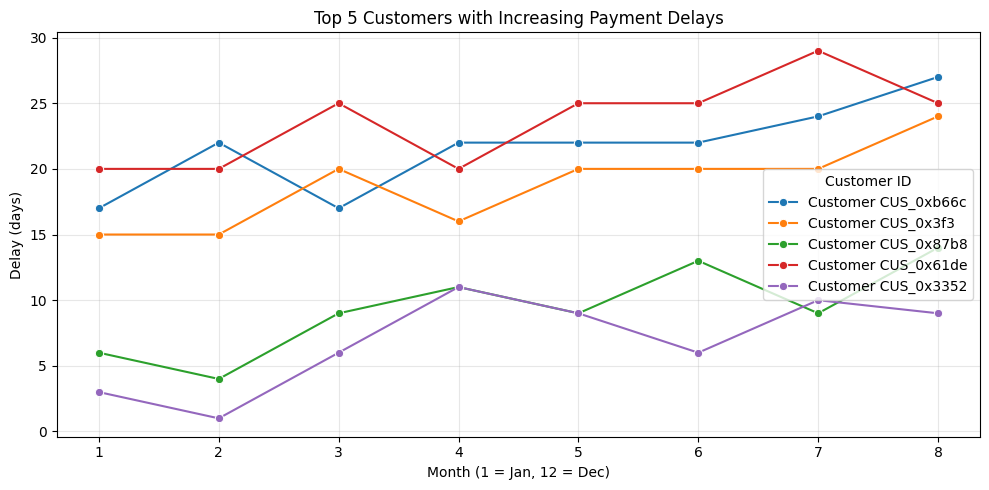

In [ ]:
# Select top 5 customers with the highest (worst) slopes
top_risk = trend_df.sort_values("Trend_Slope", ascending=False).head(5)["Customer_ID"]

plt.figure(figsize=(10,5))

for cid in top_risk:
    sub = monthly_trend[monthly_trend["Customer_ID"] == cid]
    sns.lineplot(data=sub, x="Month_Num", y="Delay_from_due_date", marker="o", label=f"Customer {cid}")

plt.title("Top 5 Customers with Increasing Payment Delays")
plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("Delay (days)")
plt.legend(title="Customer ID")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
trend_df["Trend_Slope"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])


,Trend_Slope
count,12500.000000
mean,0.001583
std,0.263815
min,-1.107143
5%,-0.428571
25%,-0.166667
50%,0.000000
75%,0.154762
95%,0.440476
max,1.130952


Currently, those who has the At_Risk_Flag are determined based on percentile. However, there may be a better way to determine a certain coefficient to prevent any false positives. This would be another future consideration.

In [ ]:
# Define slope-based risk categories
def categorize_slope(x):
    if x <= -0.167:          # Below 25th percentile
        return "Improving"
    elif x <= 0.155:         # Between 25th and 75th percentiles
        return "Stable"
    elif x <= 0.44:         # Between 75th and 95th percentiles
        return "Worsening"
    else:                     # Above 95th percentile
        return "At Risk"

# Apply categorization
trend_df["Slope_Category"] = trend_df["Trend_Slope"].apply(categorize_slope)

# See distribution
trend_df["Slope_Category"].value_counts(normalize=True)


,proportion
Slope_Category,
Stable,0.51304
Improving,0.23720
Worsening,0.19800
At Risk,0.05176


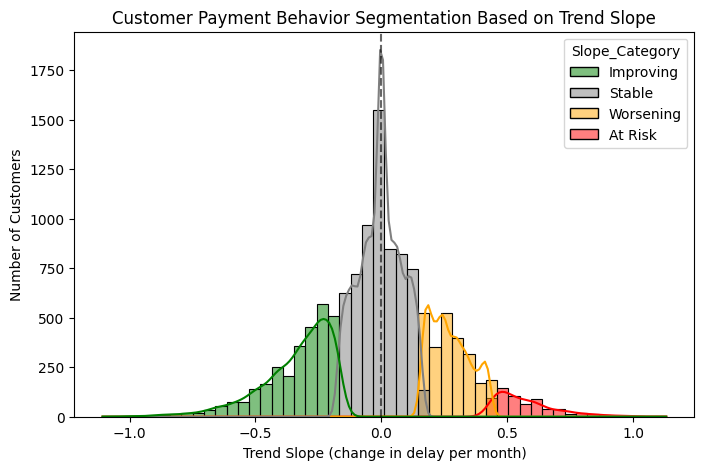

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=trend_df,
    x="Trend_Slope",
    hue="Slope_Category",
    bins=50,
    kde=True,
    palette={"Improving":"green", "Stable":"gray", "Worsening":"orange", "At Risk":"red"},
    alpha=0.5
)
plt.title("Customer Payment Behavior Segmentation Based on Trend Slope")
plt.xlabel("Trend Slope (change in delay per month)")
plt.ylabel("Number of Customers")
plt.axvline(0, color="black", linestyle="--", alpha=0.6)
plt.show()


Consider both Initial Delay and Increasing slope as a potential way to identifying at risk customers.

In [ ]:
initial_delay = (
    monthly_trend.groupby("Customer_ID").first()[["Delay_from_due_date"]]
    .rename(columns={"Delay_from_due_date": "Initial_Delay"})
)

# Merge into trend_df (which has slope)
trend_df = trend_df.merge(initial_delay, on="Customer_ID", how="left")
trend_df.head()


,Customer_ID,Trend_Slope,Slope_Category,Initial_Delay
0,CUS_0x1000,-0.380952,Improving,62.0
1,CUS_0x1009,-0.452381,Improving,8.0
2,CUS_0x100b,-0.476190,Improving,14.0
3,CUS_0x1011,0.071429,Stable,27.0
4,CUS_0x1013,-0.142857,Stable,12.0


After some inspection, it seemed as though initial delay correlated more with credit scores. So I decided to give a weight of 0.6 to initial delay and 0.4 for the trend. However, this value has not been decided through concrete evidence, will be considered for future improvements.

In [ ]:
# Normalize both metrics (so they’re comparable)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
trend_df[["Slope_Norm", "InitDelay_Norm"]] = scaler.fit_transform(
    trend_df[["Trend_Slope", "Initial_Delay"]]
)

# Combine into a composite score
trend_df["Composite_Risk_Score"] = (
    0.6 * trend_df["Slope_Norm"] + 0.4 * trend_df["InitDelay_Norm"]
)

threshold = trend_df["Composite_Risk_Score"].quantile(0.90)
trend_df["Composite_Risk_Label"] = np.where(
    trend_df["Composite_Risk_Score"] >= threshold, "At Risk", "Stable"
)

trend_df.sort_values("Composite_Risk_Score", ascending=False).head(10)


,Customer_ID,Trend_Slope,Slope_Category,Initial_Delay,Slope_Norm,InitDelay_Norm,Composite_Risk_Score,Composite_Risk_Label
2283,CUS_0x33eb,0.869048,At Risk,61.0,0.882979,0.916667,0.896454,At Risk
2870,CUS_0x3d68,0.845238,At Risk,59.0,0.872340,0.888889,0.878960,At Risk
12374,CUS_0xe05,0.928571,At Risk,54.0,0.909574,0.819444,0.873522,At Risk
5908,CUS_0x68a8,0.845238,At Risk,57.0,0.872340,0.861111,0.867849,At Risk
11705,CUS_0xbe5c,0.904762,At Risk,54.0,0.898936,0.819444,0.867139,At Risk
7012,CUS_0x795c,1.000000,At Risk,49.0,0.941489,0.750000,0.864894,At Risk
9979,CUS_0xa4f5,0.880952,At Risk,54.0,0.888298,0.819444,0.860757,At Risk
11351,CUS_0xb92e,0.821429,At Risk,55.0,0.861702,0.833333,0.850355,At Risk
3766,CUS_0x49b9,0.726190,At Risk,59.0,0.819149,0.888889,0.847045,At Risk
1219,CUS_0x240c,0.738095,At Risk,58.0,0.824468,0.875000,0.844681,At Risk


In [ ]:
print(threshold)

0.5860638297872341


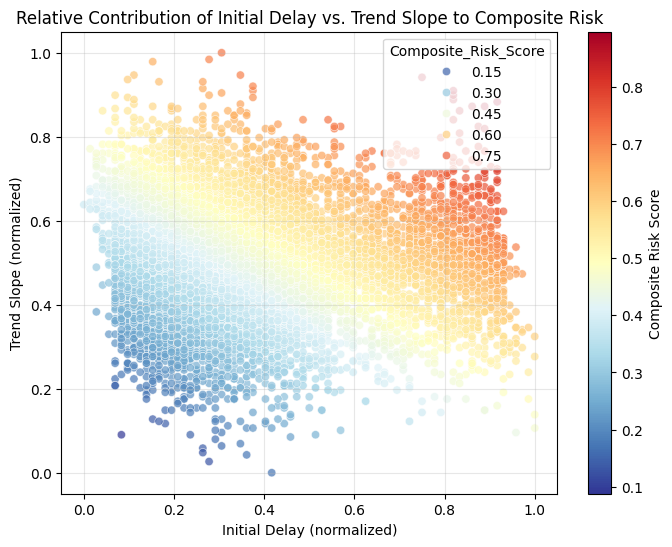

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

scatter = sns.scatterplot(
    data=trend_df,
    x="InitDelay_Norm",
    y="Slope_Norm",
    hue="Composite_Risk_Score",
    palette="RdYlBu_r",
    alpha=0.7,
    ax=ax
)

norm = plt.Normalize(trend_df["Composite_Risk_Score"].min(), trend_df["Composite_Risk_Score"].max())
sm = plt.cm.ScalarMappable(cmap="RdYlBu_r", norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label="Composite Risk Score")

ax.set_title("Relative Contribution of Initial Delay vs. Trend Slope to Composite Risk")
ax.set_xlabel("Initial Delay (normalized)")
ax.set_ylabel("Trend Slope (normalized)")
ax.grid(alpha=0.3)

plt.show()


##### Merge to Train and Update test

In [ ]:
# Convert "At Risk" → 1, "Other" → 0
trend_df["At_Risk_Flag"] = (trend_df["Composite_Risk_Label"] == "At Risk").astype(int)
trend_flag = trend_df[["Customer_ID", "At_Risk_Flag"]]
train = train.merge(trend_flag, on="Customer_ID", how="left")
print("Added At_Risk_Flag successfully!")
print(train["At_Risk_Flag"].value_counts(normalize=True).map("{:.2%}".format))


Added At_Risk_Flag successfully!
At_Risk_Flag
0    90.00%
1    10.00%
Name: proportion, dtype: object


Apply the same method to test.csv

In [ ]:
test["Month_Num"] = test["Month"].map(month_order)
monthly_trend_test = (
    test.groupby(["Customer_ID", "Month_Num"])["Delay_from_due_date"]
    .mean()
    .reset_index()
    .sort_values(["Customer_ID", "Month_Num"])
)

trend_slopes_test = []
for cid, group in monthly_trend_test.groupby("Customer_ID"):
    group = group.sort_values("Month_Num")
    X = np.arange(len(group)).reshape(-1, 1)
    y = group["Delay_from_due_date"].values

    if len(group) > 2:
        model = LinearRegression().fit(X, y)
        slope = model.coef_[0]
        trend_slopes_test.append({"Customer_ID": cid, "Trend_Slope": slope})

trend_df_test = pd.DataFrame(trend_slopes_test)

initial_delay_test = (
    monthly_trend_test.sort_values(["Customer_ID", "Month_Num"])
    .groupby("Customer_ID").first()[["Delay_from_due_date"]]
    .rename(columns={"Delay_from_due_date": "Initial_Delay"})
)
trend_df_test = trend_df_test.merge(initial_delay_test, on="Customer_ID", how="left")

trend_df_test[["Slope_Norm", "InitDelay_Norm"]] = scaler.transform(
    trend_df_test[["Trend_Slope", "Initial_Delay"]]
)

trend_df_test["Composite_Risk_Score"] = (
    0.6 * trend_df_test["Slope_Norm"] +
    0.4 * trend_df_test["InitDelay_Norm"]
)

threshold = 0.5860638297872341 # from train -- to prevent data leakge I did not base the threshold on test.csv but train.csv
trend_df_test["Composite_Risk_Label"] = np.where(
    trend_df_test["Composite_Risk_Score"] >= threshold,
    "At Risk",
    "Stable"
)
trend_df_test["At_Risk_Flag"] = (trend_df_test["Composite_Risk_Label"] == "At Risk").astype(int)

test = test.merge(
    trend_df_test[["Customer_ID", "Composite_Risk_Score", "At_Risk_Flag"]],
    on="Customer_ID",
    how="left"
)

test["At_Risk_Flag"] = test["At_Risk_Flag"].fillna(0).astype(int)

print(test["At_Risk_Flag"].value_counts(normalize=True).map("{:.2%}".format))
print(test[["Customer_ID", "Composite_Risk_Score", "At_Risk_Flag"]].head())


At_Risk_Flag
0    78.22%
1    21.78%
Name: proportion, dtype: object
  Customer_ID  Composite_Risk_Score  At_Risk_Flag
0   CUS_0xd40              0.314444             0
1   CUS_0xd40              0.314444             0
2   CUS_0xd40              0.314444             0
3   CUS_0xd40              0.314444             0
4  CUS_0x21b1              0.341253             0


In [ ]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print(set(train.columns) - set(test.columns))  # should only be target label
print(set(test.columns) - set(train.columns))

Train shape: (100000, 30)
Test shape: (50000, 30)
{'Credit_Score'}
{'Composite_Risk_Score'}


In [ ]:
test = test.drop(columns=["Composite_Risk_Score"], errors="ignore")

In [ ]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (100000, 30)
Test shape: (50000, 29)


Observe whether the At_Risk_Flag has been applied appropriately

In [ ]:
pd.crosstab(train["Credit_Score"], train["At_Risk_Flag"], normalize="index").round(3)

At_Risk_Flag,0,1
Credit_Score,,
Good,0.988,0.012
Poor,0.799,0.201
Standard,0.926,0.074


This distribution suggests that the At Risk flag is more concentrated among customers with Poor credit scores, though future work could further refine the threshold to reduce false positives and improve precision

#### Num of delayed payment

##### Initial Inspection

In [ ]:
train["Num_of_Delayed_Payment"].head(50)

,Num_of_Delayed_Payment
0,7
1,NaN
2,7
3,4
4,NaN
5,4
6,8_
7,6
8,4
9,1


In [ ]:
train["Num_of_Delayed_Payment"].tail(50)

,Num_of_Delayed_Payment
91517,6
91518,6
91519,6
91520,6
91521,6
91522,4
91523,7_
91524,10
91525,7
91526,NaN


From these we can observe that some forms of invalid data include:
1. Values with an underscore (or possibly any other symbols other than an integer, which is the expected data type for this feature)
2. Values that are negative
3. Values with NaN values

##### Observing Negative Values

So far the negative values that we see are -1. Observe what other negative values are present in case -1  could imply something. To do so, we would first have to convert our data type from object type to string to allow the usage of regular expression

In [ ]:
# TODO - check 644 vs 622
check_negative = (train["Num_of_Delayed_Payment"].astype(str)
       .str.replace(r'[−–—]', '-', regex=True))

vals = check_negative.str.extract(r'^\s*([+-]?\d+)\s*$', expand=False)

In [ ]:
check_negative = (
    pd.to_numeric(vals, errors='coerce').astype('Int64')   # nullable integer
)

In [ ]:
mask_neg = check_negative < 0
mask_neg

,Num_of_Delayed_Payment
0,False
1,<NA>
2,False
3,False
4,<NA>
...,...
99995,False
99996,False
99997,False
99998,<NA>


In [ ]:
neg_vals = check_negative[mask_neg.fillna(False)]

In [ ]:
len(neg_vals) # negative (622) + null (7002) = 7624

622

In [ ]:
neg_counts = neg_vals.value_counts().sort_index()
neg_counts

,count
Num_of_Delayed_Payment,
-3,91
-2,223
-1,308


We confirm that there are 622 negative values, and the values lie between -3 <= x <= -1. As all 622 negative integers are one of these three values, these values might not be invalid, but rather implies something meaningful.

These could be sentinel codes where a certain value could imply unknown or missing values.

Since 622 data is approximately 0.622% of the training data, we will simply treat these as other invalid values such as null or outlier values.

Now we will replace the negative values with NaN for imputation purposes.

In [ ]:
train["Num_of_Delayed_Payment"] = train["Num_of_Delayed_Payment"].astype(str)
train["Num_of_Delayed_Payment"] = train["Num_of_Delayed_Payment"].str.replace(r'[^0-9\-]', '', regex=True)
train["Num_of_Delayed_Payment"] =  train["Num_of_Delayed_Payment"].replace(["", "nan", "NaN", "NA", "None", "null"], np.nan)
train["Num_of_Delayed_Payment"] = pd.to_numeric(train["Num_of_Delayed_Payment"], errors="coerce")
train["Num_of_Delayed_Payment"]= train["Num_of_Delayed_Payment"].astype("Int64")

In [ ]:
test["Num_of_Delayed_Payment"] = test["Num_of_Delayed_Payment"].astype(str)
test["Num_of_Delayed_Payment"] = test["Num_of_Delayed_Payment"].str.replace(r'[^0-9\-]', '', regex=True)
test["Num_of_Delayed_Payment"] =  test["Num_of_Delayed_Payment"].replace(["", "nan", "NaN", "NA", "None", "null"],np.nan)
test["Num_of_Delayed_Payment"] = pd.to_numeric(test["Num_of_Delayed_Payment"], errors="coerce")
test["Num_of_Delayed_Payment"]= test["Num_of_Delayed_Payment"].astype("Int64")

In [ ]:
train.loc[train["Num_of_Delayed_Payment"] < 0, "Num_of_Delayed_Payment"] = np.nan

In [ ]:
test.loc[test["Num_of_Delayed_Payment"] < 0, "Num_of_Delayed_Payment"] = np.nan

In [ ]:
train["Num_of_Delayed_Payment"].isnull().sum()

np.int64(7646)

In [ ]:
test["Num_of_Delayed_Payment"].isnull().sum()

np.int64(3785)

##### Observing Outliers

In [ ]:
max_val = train["Num_of_Delayed_Payment"].max()
max_val

np.int64(4397)

In [ ]:
train.loc[train["Num_of_Delayed_Payment"] == max_val]

,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Unknown,Occupation_Writer,Month_Num,At_Risk_Flag
47295,CUS_0x8f59,June,36.00,24577.48,2055.12,5.00,5,18,6,23,...,False,True,False,False,False,False,False,False,6,0


Here we can observe that the number of delayed payment is 4397 while the credit score is Standard. This likely implies that 4397 is an invalid value.

In [ ]:
Q1 = train["Num_of_Delayed_Payment"].quantile(0.25)
median = train["Num_of_Delayed_Payment"].median()
Q3 = train["Num_of_Delayed_Payment"].quantile(0.75)
IQR = Q3 - Q1

# Outlier condition
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = train[
    (train["Num_of_Delayed_Payment"] < lower_bound) |
    (train["Num_of_Delayed_Payment"] > upper_bound)
]

inliers = train[
    (train["Num_of_Delayed_Payment"] >= lower_bound) &
    (train["Num_of_Delayed_Payment"] <= upper_bound)
]

In [ ]:
print("Q1: ", Q1)
print("Median: ", median)
print("Q3: ", Q3)
print("Upper Bound: ", upper_bound)

Q1:  9
Median:  14.0
Q3:  18
Upper Bound:  31.5


In [ ]:
outliers["Num_of_Delayed_Payment"].head()

,Num_of_Delayed_Payment
226,3318
257,3083
275,1338
370,3104
592,183


In [ ]:
inliers["Num_of_Delayed_Payment"].head()

,Num_of_Delayed_Payment
0,7
2,7
3,4
5,4
6,8


In [ ]:
outlier_counts = outliers["Num_of_Delayed_Payment"].count()
outlier_counts

np.int64(671)

In [ ]:
inlier_counts = inliers["Num_of_Delayed_Payment"].count()
inlier_counts

np.int64(83896)

In [ ]:
num_null = train["Num_of_Delayed_Payment"].isnull().sum()
num_null

np.int64(7000)

In [ ]:
total_counted = int(outlier_counts) + int(inlier_counts) + int(num_null)
print("Total counted:", total_counted)
print("Rows in train:", len(train))
print("Match:", total_counted == len(train))


Total counted: 91567
Rows in train: 91567
Match: True


We confirm that no data has been lost yet

Outliers will be set to NaN for imputation.

In [ ]:
col = "Num_of_Delayed_Payment"
train[col] = pd.to_numeric(train[col], errors="coerce").astype(float)
test[col]  = pd.to_numeric(test[col], errors="coerce").astype(float)

mask_outlier_train = (train[col] < 0) | (train[col] > upper_bound)
mask_outlier_test  = (test[col] < 0) | (test[col] > upper_bound)
train.loc[mask_outlier_train, col] = np.nan
test.loc[mask_outlier_test, col] = np.nan

print(f"Train outliers replaced: {mask_outlier_train.sum()}")
print(f"Test outliers replaced:  {mask_outlier_test.sum()}")

##### Imputation

Now that negative values and outliers are NaN, we will impute null values using customer mode.

In [ ]:
mode_map = (
    train.groupby("Customer_ID")[col]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)

train[col] = train[col].fillna(train["Customer_ID"].map(mode_map))
test[col]  = test[col].fillna(test["Customer_ID"].map(mode_map))

print("Remaining nulls:")
print(f"Train: {train[col].isna().sum()} / {len(train)}")
print(f"Test:  {test[col].isna().sum()} / {len(test)}")
print("Max after cleaning:", train[col].max())

Remaining nulls:
Train: 0 / 100000
Test:  0 / 50000
Max after cleaning: 28.0


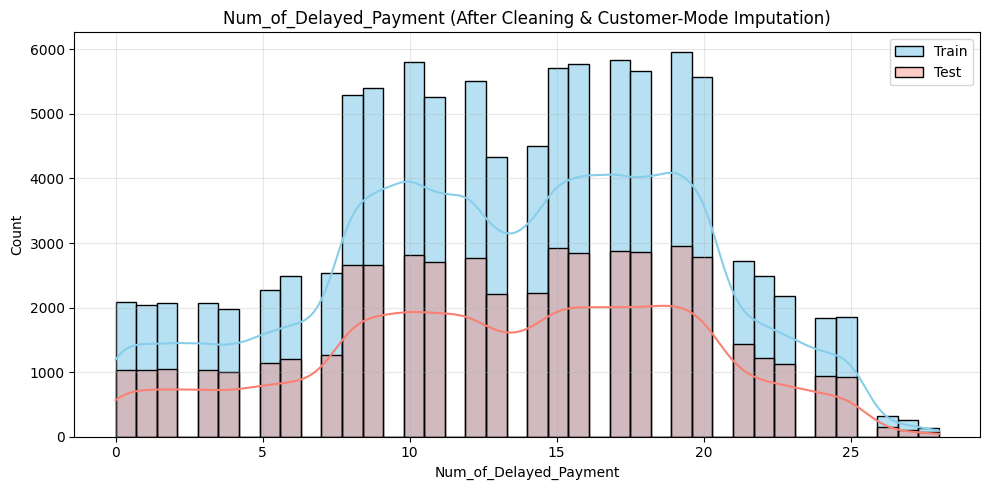

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(train[col], bins=40, kde=True, color="skyblue", label="Train", alpha=0.6)
sns.histplot(test[col], bins=40, kde=True, color="salmon", label="Test", alpha=0.4)
plt.title("Num_of_Delayed_Payment (After Cleaning & Customer-Mode Imputation)")
plt.xlabel("Num_of_Delayed_Payment")
plt.ylabel("Count")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Again, we observe that the distribution are similar between bost training and testing data. This ensures model reliability.

#### Changed Credit Limit

##### Understanding Data

In [ ]:
col = "Changed_Credit_Limit"

print("dtype:", train[col].dtype)
print("nulls (train/test):", train[col].isna().sum(), "/", test[col].isna().sum())

# Non-numeric tokens (keep only values that are NOT a signed/decimal number)
pat_numeric = r"^[+\-]?\d+(?:\.\d+)?$"
mask_non_numeric_train = ~train[col].astype(str).str.strip().str.match(pat_numeric, na=False)
mask_non_numeric_test  = ~test[col].astype(str).str.strip().str.match(pat_numeric, na=False)

print("\nDistinct non-numeric tokens (train):")
print(train.loc[mask_non_numeric_train, col].astype(str).str.strip().value_counts().head(20))

print("\nDistinct non-numeric tokens (test):")
print(test .loc[mask_non_numeric_test,  col].astype(str).str.strip().value_counts().head(20))

# Peek some offending rows to understand context
print("\nSample rows with non-numeric values (train):")
display(train.loc[mask_non_numeric_train, ["Customer_ID","Month",col]].head(10))


dtype: object
nulls (train/test): 0 / 0

Distinct non-numeric tokens (train):
Changed_Credit_Limit
_    1908
Name: count, dtype: int64

Distinct non-numeric tokens (test):
Changed_Credit_Limit
_    972
Name: count, dtype: int64

Sample rows with non-numeric values (train):


,Customer_ID,Month,Changed_Credit_Limit
2,CUS_0xd40,March,_
55,CUS_0x4157,February,_
56,CUS_0x4157,March,_
97,CUS_0x6c66,June,_
98,CUS_0x6c66,July,_
161,CUS_0xac86,February,_
217,CUS_0x9a71,April,_
222,CUS_0x6048,January,_
228,CUS_0x6048,July,_
271,CUS_0x706a,April,_


In [ ]:
train["Changed_Credit_Limit"] = train["Changed_Credit_Limit"].replace(["-", "_"], np.nan)
test["Changed_Credit_Limit"] = test["Changed_Credit_Limit"].replace(["-", "_"], np.nan)

print("After replacement:")
print("Nulls in train:", train["Changed_Credit_Limit"].isna().sum())
print("Nulls in test:", test["Changed_Credit_Limit"].isna().sum())


After replacement:
Nulls in train: 1908
Nulls in test: 972


In [ ]:
# Focus only on columns of interest
credit_trend = (
    train.groupby(["Customer_ID", "Month_Num"])["Changed_Credit_Limit"]
    .first()
    .reset_index()
    .sort_values(["Customer_ID", "Month_Num"])
)

# View the pattern for a few customers
sample_customers = credit_trend["Customer_ID"].unique()[:5]
display(credit_trend[credit_trend["Customer_ID"].isin(sample_customers)])


,Customer_ID,Month_Num,Changed_Credit_Limit
0,CUS_0x1000,1,1.63
1,CUS_0x1000,2,1.63
2,CUS_0x1000,3,1.63
3,CUS_0x1000,4,1.63
4,CUS_0x1000,5,2.63
5,CUS_0x1000,6,1.63
6,CUS_0x1000,7,2.63
7,CUS_0x1000,8,1.63
8,CUS_0x1009,1,9.73
9,CUS_0x1009,2,9.73


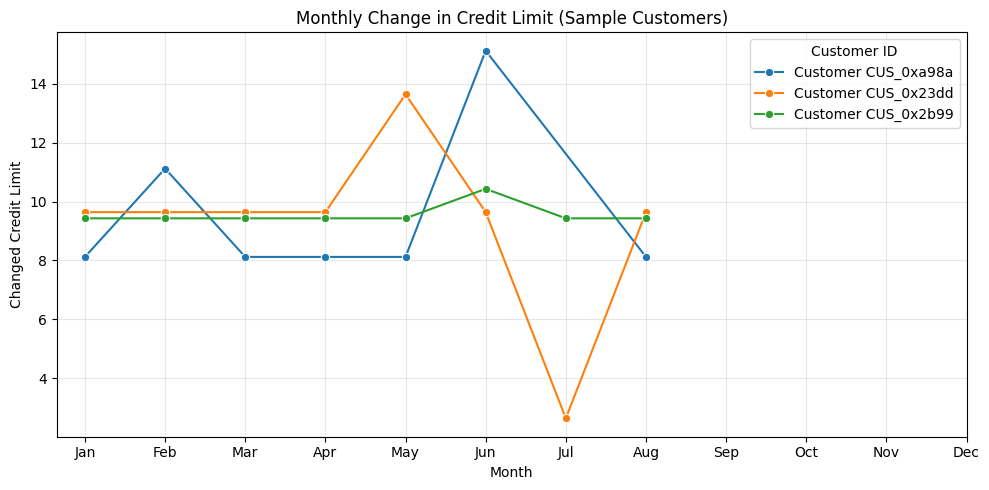

In [ ]:
# Convert numeric part; keep underscores as missing for now
tmp = train.copy()
tmp["Changed_Credit_Limit"] = pd.to_numeric(tmp["Changed_Credit_Limit"], errors="coerce")

# Pick 3 random customers
sample_ids = np.random.choice(tmp["Customer_ID"].unique(), 3, replace=False)

plt.figure(figsize=(10,5))
for cid in sample_ids:
    sub = tmp[tmp["Customer_ID"] == cid].sort_values("Month_Num")
    sns.lineplot(data=sub, x="Month_Num", y="Changed_Credit_Limit", marker="o", label=f"Customer {cid}")

plt.title("Monthly Change in Credit Limit (Sample Customers)")
plt.xlabel("Month")
plt.ylabel("Changed Credit Limit")
plt.xticks(range(1,13), ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.legend(title="Customer ID")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


##### Observing Outliers

In [ ]:
train["Changed_Credit_Limit"] = pd.to_numeric(train["Changed_Credit_Limit"], errors="coerce")

summary = (
    train.groupby("Customer_ID")["Changed_Credit_Limit"]
    .agg(['count', 'mean', 'std', 'min', 'max', 'median'])
    .reset_index()
)

summary.describe()[["mean", "std", "min", "max", "median"]]


,mean,std,min,max,median
count,12500.00,12500.00,12500.00,12500.00,12500.00
mean,10.39,1.55,8.17,12.57,10.40
std,6.55,1.18,7.02,6.99,6.51
min,-1.17,0.00,-6.49,0.50,-1.66
25%,5.46,0.38,2.99,7.56,5.50
50%,9.37,1.63,7.44,11.49,9.35
75%,14.65,2.47,12.21,17.00,14.66
max,31.35,5.51,29.98,36.49,29.98


The entire feature is centered around 8 – 13, with most customers having very similar ranges.

The standard deviation per customer (~1 – 1.5) is small → each customer’s credit-limit change is quite stable.

However, the global minimum of –6.49 show that a few customers sometimes have small or moderate negative values. It seems like negatives are rare but real (not garbage).

It seems like the outliers are within a valid range.

##### Observing Customers with Negative

In [ ]:
train[train["Changed_Credit_Limit"] < 0][["Customer_ID", "Month", "Changed_Credit_Limit"]].head(10)

,Customer_ID,Month,Changed_Credit_Limit
25,CUS_0xb891,April,-2.01
26,CUS_0xb891,May,-1.01
27,CUS_0xb891,June,-3.01
63,CUS_0xba08,February,-1.24
162,CUS_0xac86,April,-4.14
163,CUS_0xac86,June,-0.14
184,CUS_0x4d43,May,-2.87
213,CUS_0xb681,August,-2.46
270,CUS_0x706a,March,-4.26
274,CUS_0x706a,August,-1.26


In [ ]:
# Find customers who ever had a negative Changed_Credit_Limit
neg_customers = train.loc[train["Changed_Credit_Limit"] < 0, "Customer_ID"].unique()
print(f"Found {len(neg_customers)} customers with at least one negative credit limit change.")

Found 1200 customers with at least one negative credit limit change.


In [ ]:
# Randomly select 5 customers for visualization
sample_ids = np.random.choice(neg_customers, size=min(5, len(neg_customers)), replace=False)
print("Sample negative-change customers:", sample_ids)

Sample negative-change customers: ['CUS_0x3117' 'CUS_0x5f45' 'CUS_0x36a1' 'CUS_0x9127' 'CUS_0x7699']


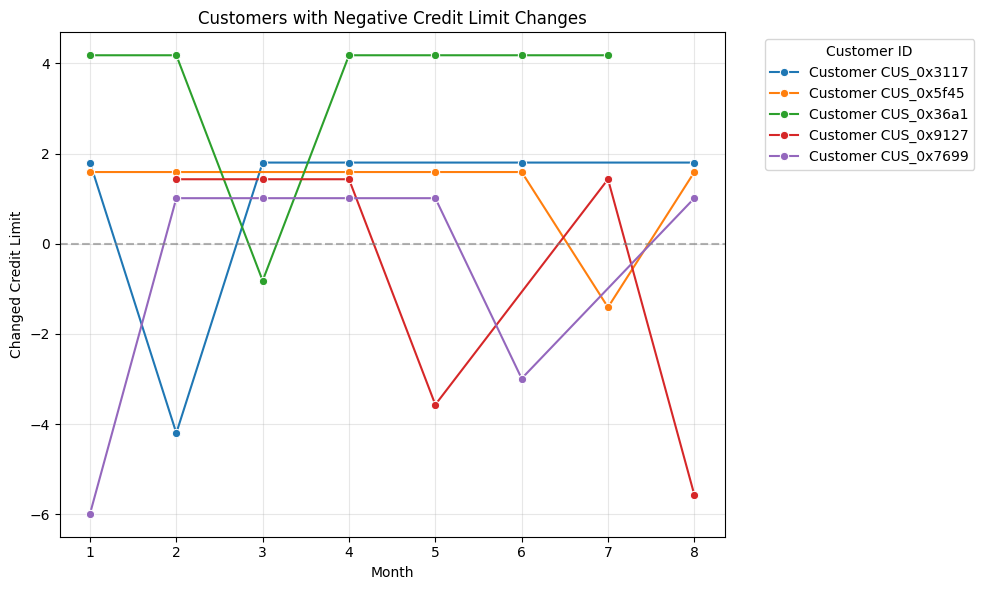

In [ ]:
plt.figure(figsize=(10, 6))
for cid in sample_ids:
    sub = train[train["Customer_ID"] == cid].sort_values("Month_Num")
    sns.lineplot(data=sub, x="Month_Num", y="Changed_Credit_Limit",
                 marker="o", label=f"Customer {cid}")

plt.axhline(0, color="gray", linestyle="--", alpha=0.6)  # baseline for no change
plt.title("Customers with Negative Credit Limit Changes")
plt.xlabel("Month")
plt.ylabel("Changed Credit Limit")
plt.legend(title="Customer ID", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


##### Imputation methods: Forward Fill vs Mode

In [ ]:
# --- Create copies for both methods ---
impute_df = train.copy()

# Forward fill (with backfill for early months)
impute_df["FFILL_Credit_Limit"] = (
    impute_df.sort_values(["Customer_ID", "Month_Num"])
    .groupby("Customer_ID")["Changed_Credit_Limit"]
    .ffill()
    .bfill()
)

# Compute mode per customer
mode_map = (
    impute_df.groupby("Customer_ID")["Changed_Credit_Limit"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)

# Vectorized map to replace missing values
impute_df["MODE_Credit_Limit"] = (
    impute_df["Changed_Credit_Limit"]
    .fillna(impute_df["Customer_ID"].map(mode_map))
)


In [ ]:
# Filter only rows that originally had missing values
nan_rows = impute_df[impute_df["Changed_Credit_Limit"].isna()].copy()

# Select key columns for comparison
cols_to_show = ["Customer_ID", "Month", "Changed_Credit_Limit",
                "FFILL_Credit_Limit", "MODE_Credit_Limit"]

# Display in a scrollable format for readability
from IPython.display import display, HTML
display(HTML(nan_rows[cols_to_show].head(50).to_html(index=False, max_cols=None)))


Customer_ID,Month,Changed_Credit_Limit,FFILL_Credit_Limit,MODE_Credit_Limit
CUS_0xd40,March,NaN,11.27,11.27
CUS_0x4157,February,NaN,8.24,8.24
CUS_0x4157,March,NaN,8.24,8.24
CUS_0x6c66,June,NaN,8.86,8.86
CUS_0x6c66,July,NaN,8.86,8.86
CUS_0xac86,February,NaN,0.86,0.86
CUS_0x9a71,April,NaN,6.83,6.83
CUS_0x6048,January,NaN,5.07,5.07
CUS_0x6048,July,NaN,6.07,5.07
CUS_0x706a,April,NaN,-4.26,2.74


In [ ]:
# Mark rows that originally had NaN
impute_df["Was_NaN"] = impute_df["Changed_Credit_Limit"].isna()
# Customers with at least one originally missing value
nan_customers = impute_df.loc[impute_df["Was_NaN"], "Customer_ID"].unique()

# Pick a few samples
sample_ids = np.random.choice(nan_customers, size=min(5, len(nan_customers)), replace=False)
print("Sample customers for visualization:", sample_ids)


Sample customers for visualization: ['CUS_0x8b4' 'CUS_0xb903' 'CUS_0xc6be' 'CUS_0xa59d' 'CUS_0x6865']


Sample customers: ['CUS_0x17bb' 'CUS_0xa193' 'CUS_0x661f' 'CUS_0x9b60' 'CUS_0x3baf']


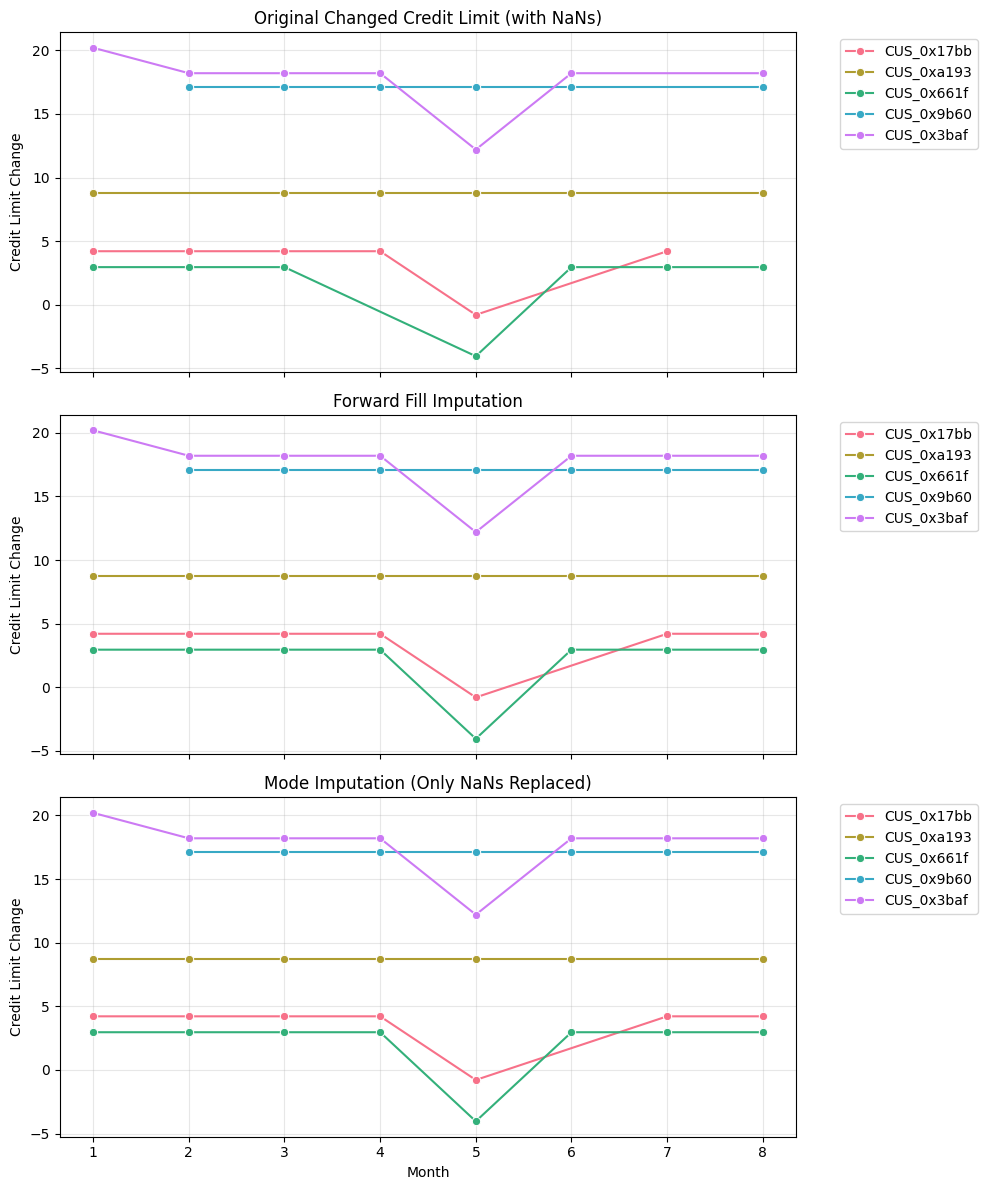

In [ ]:
# Focus only on customers who had missing values
nan_customers = impute_df.loc[impute_df["Was_NaN"], "Customer_ID"].unique()
sample_ids = np.random.choice(nan_customers, size=min(5, len(nan_customers)), replace=False)
print("Sample customers:", sample_ids)

# Define consistent color per customer
palette = sns.color_palette("husl", len(sample_ids))
color_map = {cid: palette[i] for i, cid in enumerate(sample_ids)}

# Create 3 subplots (Original, FFILL, MODE)
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# --- Plot 1: Original ---
for cid in sample_ids:
    sub = impute_df[impute_df["Customer_ID"] == cid].sort_values("Month_Num")
    sns.lineplot(data=sub, x="Month_Num", y="Changed_Credit_Limit",
                 marker="o", label=cid, color=color_map[cid], ax=axes[0])
axes[0].set_title("Original Changed Credit Limit (with NaNs)")
axes[0].set_ylabel("Credit Limit Change")
axes[0].legend(bbox_to_anchor=(1.05, 1), loc="upper left")
axes[0].grid(alpha=0.3)

# --- Plot 2: Forward Fill ---
for cid in sample_ids:
    sub = impute_df[impute_df["Customer_ID"] == cid].sort_values("Month_Num")
    sns.lineplot(data=sub, x="Month_Num", y="FFILL_Credit_Limit",
                 marker="o", label=cid, color=color_map[cid], ax=axes[1])
axes[1].set_title("Forward Fill Imputation")
axes[1].set_ylabel("Credit Limit Change")
axes[1].legend(bbox_to_anchor=(1.05, 1), loc="upper left")
axes[1].grid(alpha=0.3)

# --- Plot 3: Mode Imputation ---
for cid in sample_ids:
    sub = impute_df[impute_df["Customer_ID"] == cid].sort_values("Month_Num")
    sns.lineplot(data=sub, x="Month_Num", y="MODE_Credit_Limit",
                 marker="o", label=cid, color=color_map[cid], ax=axes[2])
axes[2].set_title("Mode Imputation (Only NaNs Replaced)")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Credit Limit Change")
axes[2].legend(bbox_to_anchor=(1.05, 1), loc="upper left")
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()


Impute wth mode for now --  maybe change later

In [ ]:
train["Changed_Credit_Limit"] = pd.to_numeric(train["Changed_Credit_Limit"], errors="coerce")
test["Changed_Credit_Limit"]  = pd.to_numeric(test["Changed_Credit_Limit"],  errors="coerce")


In [ ]:
# --- Train ---
mode_map_train = (
    train.groupby("Customer_ID")["Changed_Credit_Limit"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)

print("Before (train):", train["Changed_Credit_Limit"].isna().sum(), "NaNs")

for cid, mode_val in mode_map_train.items():
    mask = (train["Customer_ID"] == cid) & (train["Changed_Credit_Limit"].isna())
    train.loc[mask, "Changed_Credit_Limit"] = mode_val

print("After (train):", train["Changed_Credit_Limit"].isna().sum(), "NaNs remaining")


# --- Test ---
mode_map_test = (
    test.groupby("Customer_ID")["Changed_Credit_Limit"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)

print("\nBefore (test):", test["Changed_Credit_Limit"].isna().sum(), "NaNs")

for cid, mode_val in mode_map_test.items():
    mask = (test["Customer_ID"] == cid) & (test["Changed_Credit_Limit"].isna())
    test.loc[mask, "Changed_Credit_Limit"] = mode_val

print("After (test):", test["Changed_Credit_Limit"].isna().sum(), "NaNs remaining")


Before (train): 1908 NaNs
After (train): 0 NaNs remaining

Before (test): 972 NaNs
After (test): 0 NaNs remaining


In [ ]:
print(train["Changed_Credit_Limit"].dtype)
print(test["Changed_Credit_Limit"].dtype)


float64
float64


#### Num_Credit_Inquires

##### Understanding data

In [ ]:
col = "Num_Credit_Inquiries"

print("dtype:", train[col].dtype)
print("Nulls (train/test):", train[col].isna().sum(), "/", test[col].isna().sum())

# Optional: double-check basic stats
print(train[col].describe())
print(test[col].describe())


dtype: float64
Nulls (train/test): 1791 / 959
count   89776.00
mean       27.86
std       193.48
min         0.00
25%         3.00
50%         6.00
75%         9.00
max      2597.00
Name: Num_Credit_Inquiries, dtype: float64
count   44785.00
mean       30.27
std       198.11
min         0.00
25%         4.00
50%         7.00
75%        10.00
max      2593.00
Name: Num_Credit_Inquiries, dtype: float64


IQR bounds: [-6.00, 18.00]
Outliers beyond bounds: 1529 / 89776 (1.70%)


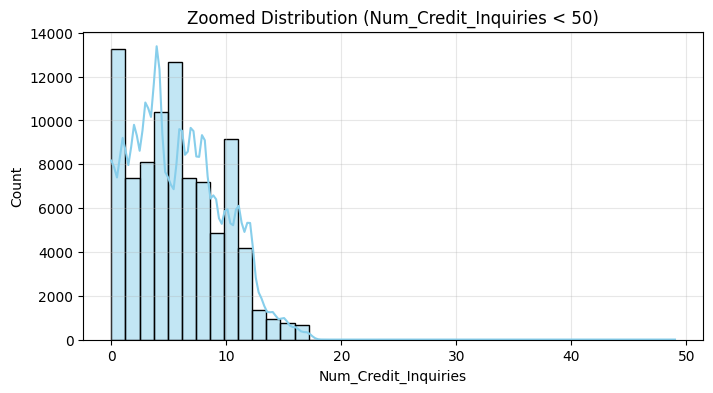

In [ ]:
x = train["Num_Credit_Inquiries"].dropna()

# Compute IQR bounds
q1, q3 = x.quantile([0.25, 0.75])
iqr = q3 - q1
lb, ub = q1 - 1.5 * iqr, q3 + 1.5 * iqr
print(f"IQR bounds: [{lb:.2f}, {ub:.2f}]")

# Count how many outliers
outliers = ((x < lb) | (x > ub)).sum()
print(f"Outliers beyond bounds: {outliers} / {len(x)} ({outliers/len(x)*100:.2f}%)")

# Visualize zoomed
plt.figure(figsize=(8,4))
sns.histplot(x[x < 50], bins=40, kde=True, color="skyblue")
plt.title("Zoomed Distribution (Num_Credit_Inquiries < 50)")
plt.xlabel("Num_Credit_Inquiries")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()


IQR bounds: [-5.00, 19.00]
Outliers beyond bounds: 773 / 44785 (1.73%)


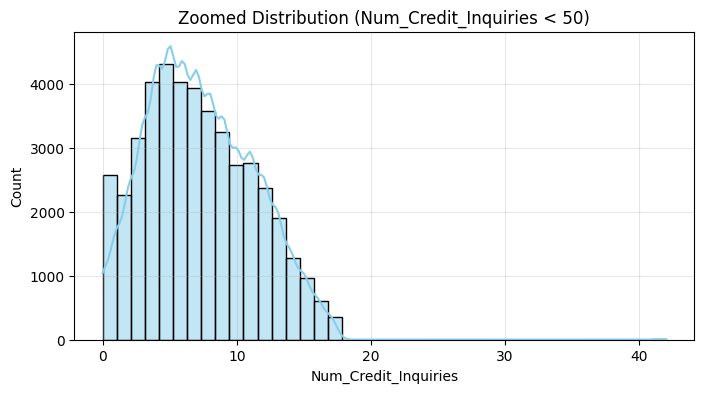

In [ ]:
x = test["Num_Credit_Inquiries"].dropna()

# Compute IQR bounds
q1, q3 = x.quantile([0.25, 0.75])
iqr = q3 - q1
lb, ub = q1 - 1.5 * iqr, q3 + 1.5 * iqr
print(f"IQR bounds: [{lb:.2f}, {ub:.2f}]")

# Count how many outliers
outliers = ((x < lb) | (x > ub)).sum()
print(f"Outliers beyond bounds: {outliers} / {len(x)} ({outliers/len(x)*100:.2f}%)")

# Visualize zoomed
plt.figure(figsize=(8,4))
sns.histplot(x[x < 50], bins=40, kde=True, color="skyblue")
plt.title("Zoomed Distribution (Num_Credit_Inquiries < 50)")
plt.xlabel("Num_Credit_Inquiries")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()


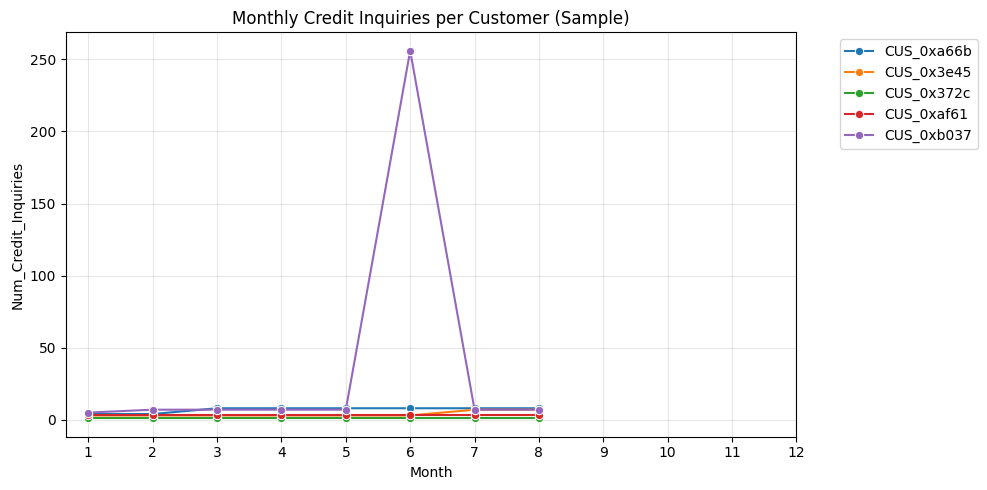

In [ ]:
# Month mapping
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
    'June': 6, 'July': 7, 'August': 8, 'September': 9,
    'October': 10, 'November': 11, 'December': 12
}
train["Month_Num"] = train["Month"].map(month_map)

# Pick 5 random customers with full or near-full data
sample_ids = (
    train["Customer_ID"].value_counts().head(5).index.tolist()
)

plt.figure(figsize=(10,5))
for cid in sample_ids:
    sub = train[train["Customer_ID"] == cid].sort_values("Month_Num")
    sns.lineplot(data=sub, x="Month_Num", y="Num_Credit_Inquiries",
                 marker="o", label=f"{cid}")

plt.title("Monthly Credit Inquiries per Customer (Sample)")
plt.xlabel("Month")
plt.ylabel("Num_Credit_Inquiries")
plt.xticks(range(1, 13))
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


These outliers seems to be invalid. Some with over 2000 credit inquiries.

##### Checking negative values

In [ ]:
df_credit_inquiries = train["Num_Credit_Inquiries"]
df_credit_inquiries_test = test["Num_Credit_Inquiries"]
neg_mask = df_credit_inquiries < 0
print("negative count:", int(neg_mask.sum()))
print(df_credit_inquiries[neg_mask].value_counts().sort_index())

negative count: 0
Series([], Name: count, dtype: int64)


In [ ]:
neg_mask_test = df_credit_inquiries_test < 0
print("negative count:", int(neg_mask_test.sum()))
print(df_credit_inquiries_test[neg_mask_test].value_counts().sort_index())

negative count: 0
Series([], Name: count, dtype: int64)


Since there aren't negative values, we do not need to handle these. Other possible invalid data to consider:
- outliers that doesn't seem appropriate

##### Impute by customer mode

In [ ]:
train["Num_Credit_Inquiries_before"] = train["Num_Credit_Inquiries"].copy()

Global IQR bounds: [-6.00, 18.00]
Outliers flagged (train): 1529 / 91567
Outliers flagged (test): 773 / 45744
Remaining nulls — Train: 0, Test: 0
count   91567.00
mean        5.77
std         3.82
min         0.00
25%         3.00
50%         5.00
75%         8.00
max        17.00
Name: Num_Credit_Inquiries, dtype: float64


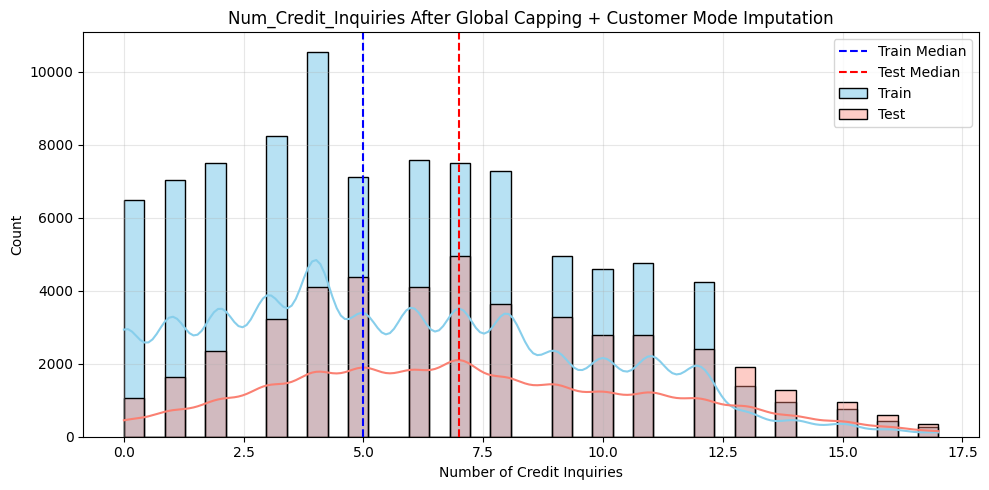

In [ ]:

col = "Num_Credit_Inquiries"
# --- Step 1: Compute global IQR bounds ---
x = train[col].dropna()
q1, q3 = x.quantile([0.25, 0.75])
iqr = q3 - q1
lb, ub = q1 - 1.5 * iqr, q3 + 1.5 * iqr

print(f"Global IQR bounds: [{lb:.2f}, {ub:.2f}]")

# --- Step 2: Flag global outliers ---
train["is_outlier_NCI"] = (train[col] < lb) | (train[col] > ub)
test["is_outlier_NCI"]  = (test[col] < lb) | (test[col] > ub)

print(f"Outliers flagged (train): {train['is_outlier_NCI'].sum()} / {len(train)}")
print(f"Outliers flagged (test): {test['is_outlier_NCI'].sum()} / {len(test)}")

# --- Step 3: Compute per-customer mode map (for imputation) ---
mode_map = (
    train.groupby("Customer_ID")[col]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)

# --- Step 4: Replace outliers with the customer's mode ---
train[col] = np.where(
    train["is_outlier_NCI"],
    train["Customer_ID"].map(mode_map),
    train[col]
)

test[col] = np.where(
    test["is_outlier_NCI"],
    test["Customer_ID"].map(mode_map),
    test[col]
)

# --- Step 5: Global fallback for any remaining NaNs ---
train[col] = train[col].fillna(train[col].median())
test[col]  = test[col].fillna(test[col].median())

# --- Step 6: Drop flag column (optional) ---
train.drop(columns="is_outlier_NCI", inplace=True)
test.drop(columns="is_outlier_NCI", inplace=True)

# --- Step 7: Verify ---
print(f"Remaining nulls — Train: {train[col].isna().sum()}, Test: {test[col].isna().sum()}")
print(train[col].describe())

# --- Step 8: Visual check ---
plt.figure(figsize=(10,5))
sns.histplot(train[col], bins=40, kde=True, color="skyblue", label="Train", alpha=0.6)
sns.histplot(test[col], bins=40, kde=True, color="salmon", label="Test", alpha=0.4)
plt.axvline(train[col].median(), color="blue", linestyle="--", label="Train Median")
plt.axvline(test[col].median(), color="red", linestyle="--", label="Test Median")
plt.title("Num_Credit_Inquiries After Global Capping + Customer Mode Imputation")
plt.xlabel("Number of Credit Inquiries")
plt.ylabel("Count")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Identify customers whose values changed
changed_customers = train.loc[
    train["Num_Credit_Inquiries_before"] != train["Num_Credit_Inquiries"],
    "Customer_ID"
].unique()

print(f"Customers with changed values: {len(changed_customers)}")
print("Sample changed Customer_IDs:", changed_customers[:10])


Customers with changed values: 2963
Sample changed Customer_IDs: ['CUS_0x2dbc' 'CUS_0x95ee' 'CUS_0xff4' 'CUS_0xa16e' 'CUS_0x5b48'
 'CUS_0xa5f9' 'CUS_0xb681' 'CUS_0x9a71' 'CUS_0x4004' 'CUS_0x4080']


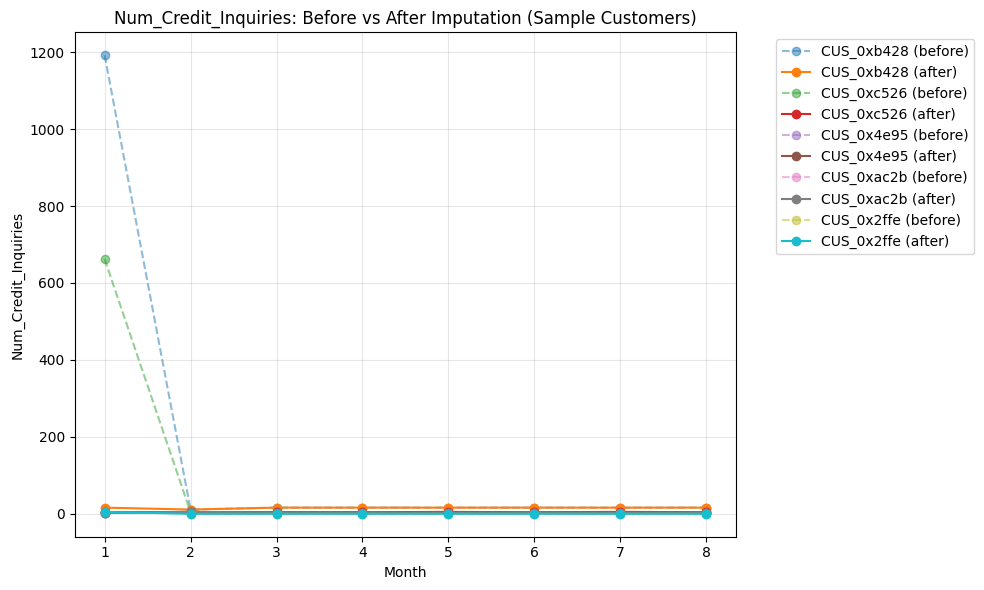

In [ ]:
# Pick 3–5 random customers that had changes
sample_ids = np.random.choice(changed_customers, size=min(5, len(changed_customers)), replace=False)

plt.figure(figsize=(10, 6))
for cid in sample_ids:
    sub = train[train["Customer_ID"] == cid].sort_values("Month_Num")

    plt.plot(sub["Month_Num"], sub["Num_Credit_Inquiries_before"],
             marker="o", linestyle="--", label=f"{cid} (before)", alpha=0.5)
    plt.plot(sub["Month_Num"], sub["Num_Credit_Inquiries"],
             marker="o", label=f"{cid} (after)")

plt.title("Num_Credit_Inquiries: Before vs After Imputation (Sample Customers)")
plt.xlabel("Month")
plt.ylabel("Num_Credit_Inquiries")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print(set(train.columns) - set(test.columns))
print(set(test.columns) - set(train.columns))

Train shape: (91567, 60)
Test shape: (45744, 59)
{'Num_Credit_Inquiries_before', 'Credit_Score'}
{'Name'}


In [ ]:
# Drop helper columns (if present)
cols_to_drop = ["Num_Credit_Inquiries_before"]

train.drop(columns=[c for c in cols_to_drop if c in train.columns], inplace=True)
test.drop(columns=[c for c in cols_to_drop if c in test.columns], inplace=True)

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (91567, 59)
Test shape: (45744, 59)


In [ ]:
missing_in_test = list(set(train.columns) - set(test.columns))
print("Columns in train but not in test:", missing_in_test)
missing_in_train = list(set(test.columns) - set(train.columns))
print("Columns in test but not in train:", missing_in_train)


Columns in train but not in test: ['Credit_Score']
Columns in test but not in train: ['Name']


### Credit Score Mapping

In [ ]:
# Pre-processing inspection
train[["Credit_Score"]].describe()

,Credit_Score
count,91567
unique,3
top,Standard
freq,48739


In [ ]:
# Map Credit_Score categories to numeric values
train["Credit_Score_Encoded"] = train["Credit_Score"].map({
    "Poor": 0,
    "Standard": 1,
    "Good": 2
})

In [ ]:
# Inspect the colomn
train[["Credit_Score", "Credit_Score_Encoded"]].head()
train["Credit_Score_Encoded"].value_counts()

,count
Credit_Score_Encoded,
1,48739
0,26619
2,16209


## Save df

Find folder AMEX1A

Right-click → Add shortcut to Drive

Choose location: My Drive

In [ ]:
missing_in_test = list(set(train.columns) - set(test.columns))
print("Columns in train but not in test:", missing_in_test)
missing_in_train = list(set(test.columns) - set(train.columns))
print("Columns in test but not in train:", missing_in_train)


Columns in train but not in test: ['Credit_Score_Encoded', 'Credit_Score']
Columns in test but not in train: ['Name']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
save_dir = "/content/drive/MyDrive/AMEX1A/Data/"
os.makedirs(save_dir, exist_ok=True)


Mounted at /content/drive


In [ ]:
# Save Parquet to Drive
train.to_parquet(save_dir + "train_clean.parquet", index=False)
test.to_parquet(save_dir + "test_clean.parquet", index=False)
print("Saved cleaned train & test to Google Drive (parquet)!")

# Save CSV to Drive
train.to_csv(save_dir + "train_clean.csv", index=False)
test.to_csv(save_dir + "test_clean.csv", index=False)
print("Saved cleaned train & test to Google Drive (CSV)!")


Saved cleaned train & test to Google Drive (parquet)!
Saved cleaned train & test to Google Drive (CSV)!


## Correlation (Heatmap)

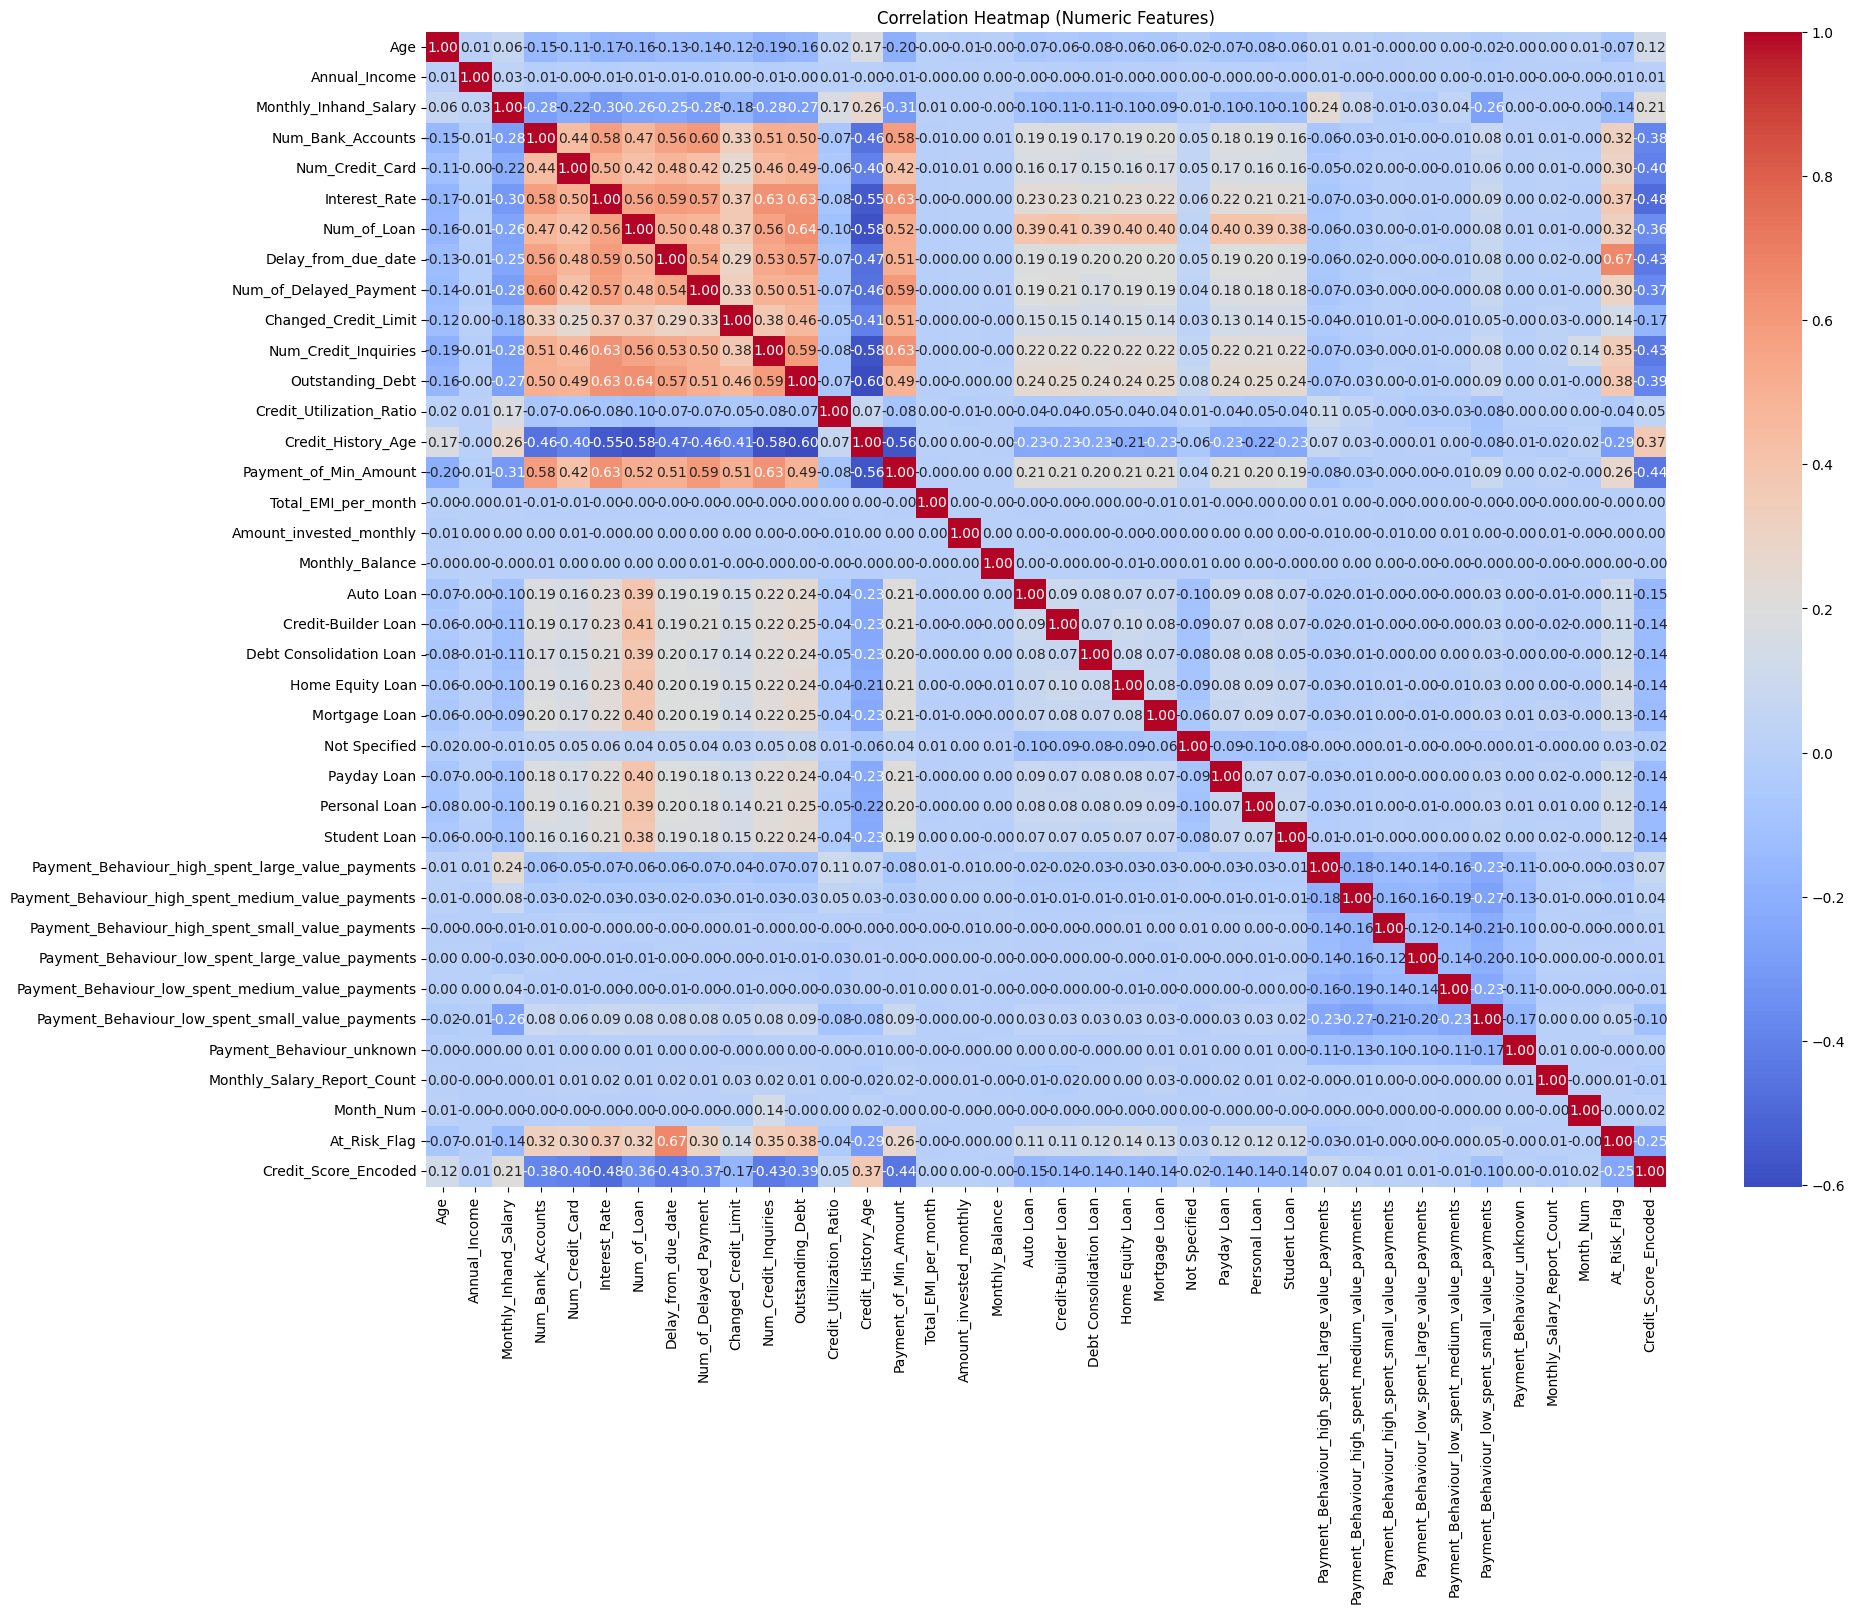

In [ ]:
numeric_df = train.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()



---



Top 30 Positive / Negative Correlations between columns

In [ ]:
# Select only numeric columns
numeric_df = train.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Extract all correlations (excluding self-correlations)
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# Remove duplicates (since corr(A,B) == corr(B,A))
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) < corr_pairs.index.get_level_values(1)]

# Filter positive and negative correlations separately
positive_corr = corr_pairs[corr_pairs > 0].sort_values(ascending=False)
negative_corr = corr_pairs[corr_pairs < 0].sort_values()

# Display results
print(" Positive Correlations:\n", positive_corr.head(30))
print("\n Negative Correlations:\n", negative_corr.head(30))


 Positive Correlations:
 At_Risk_Flag            Delay_from_due_date      0.67
Num_of_Loan             Outstanding_Debt         0.64
Interest_Rate           Payment_of_Min_Amount    0.63
                        Outstanding_Debt         0.63
                        Num_Credit_Inquiries     0.63
Num_Credit_Inquiries    Payment_of_Min_Amount    0.63
Num_Bank_Accounts       Num_of_Delayed_Payment   0.60
Num_of_Delayed_Payment  Payment_of_Min_Amount    0.59
Num_Credit_Inquiries    Outstanding_Debt         0.59
Delay_from_due_date     Interest_Rate            0.59
Num_Bank_Accounts       Payment_of_Min_Amount    0.58
Interest_Rate           Num_Bank_Accounts        0.58
Delay_from_due_date     Outstanding_Debt         0.57
Interest_Rate           Num_of_Delayed_Payment   0.57
                        Num_of_Loan              0.56
Num_Credit_Inquiries    Num_of_Loan              0.56
Delay_from_due_date     Num_Bank_Accounts        0.56
                        Num_of_Delayed_Payment   0.54
   

Top positive / negative correlations between columns and Credit_Score_Encoded

In [ ]:
# Get correlations with Credit_Score_Encoded
corr_with_score = corr_matrix["Credit_Score_Encoded"].sort_values(ascending=False)

# Display top positive and negative correlations
print("Top Positive Correlations with Credit_Score_Encoded:")
print(corr_with_score.head(11))

print("\Top Negative Correlations with Credit_Score_Encoded:")
print(corr_with_score.tail(11))

Top Positive Correlations with Credit_Score_Encoded:
Credit_Score_Encoded                                 1.00
Credit_History_Age                                   0.37
Monthly_Inhand_Salary                                0.21
Age                                                  0.12
Payment_Behaviour_high_spent_large_value_payments    0.07
Credit_Utilization_Ratio                             0.05
Payment_Behaviour_high_spent_medium_value_payments   0.04
Month_Num                                            0.02
Payment_Behaviour_high_spent_small_value_payments    0.01
Annual_Income                                        0.01
Payment_Behaviour_low_spent_large_value_payments     0.01
Name: Credit_Score_Encoded, dtype: float64
\Top Negative Correlations with Credit_Score_Encoded:
Changed_Credit_Limit     -0.17
At_Risk_Flag             -0.25
Num_of_Loan              -0.36
Num_of_Delayed_Payment   -0.37
Num_Bank_Accounts        -0.38
Outstanding_Debt         -0.39
Num_Credit_Card          -

<>:8: SyntaxWarning: invalid escape sequence '\T'
<>:8: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-2545604118.py:8: SyntaxWarning: invalid escape sequence '\T'
  print("\Top Negative Correlations with Credit_Score_Encoded:")


# Milestone 2: Model Selection + Evaluation

## Initial Set up

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
# Check for consistency between train and test dataframes
missing_in_test = list(set(train.columns) - set(test.columns))
print("Columns in train but not in test:", missing_in_test) # Expected out come: ["Credit_Score_Encoded"]
missing_in_train = list(set(test.columns) - set(train.columns))
print("Columns in test but not in train:", missing_in_train) # Expected outcome: ["Name"] -- this feature is used in the Streamlit App to search existing customers


Columns in train but not in test: ['Credit_Score_Encoded', 'Credit_Score']
Columns in test but not in train: ['Name']


In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

load_dir = "/content/drive/MyDrive/AMEX1A/Data/"

train = pd.read_parquet(load_dir + "train_clean.parquet")
test = pd.read_parquet(load_dir + "test_clean.parquet")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print(set(train.columns) - set(test.columns))  # should be empty
print(set(test.columns) - set(train.columns))  # should be empty

Train shape: (91567, 60)
Test shape: (45744, 59)
{'Credit_Score_Encoded', 'Credit_Score'}
{'Name'}


In [ ]:
X = train.drop(columns=["Credit_Score", "Credit_Score_Encoded"], errors="ignore")
y = train["Credit_Score_Encoded"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,        # for reproducibility
    stratify=y
)

In [ ]:
print("Columns still object:", X.select_dtypes(include="object").columns)


Columns still object: Index(['Customer_ID', 'Month'], dtype='object')


In [ ]:
# Remove the identifier from both train and validation/test
X_train = X_train.drop(columns=["Customer_ID", "Month", "Month_Num"])
X_test = X_test.drop(columns=["Customer_ID", "Month", "Month_Num"])

In [ ]:
print("Non-numeric columns in X_train:") # Should be empty
print(X_train.select_dtypes(include="object").columns) # Should be empty

print("\nDtypes summary:")
print(X_train.dtypes.value_counts())

Non-numeric columns in X_train:
Index([], dtype='object')

Dtypes summary:
bool       19
int64      16
float64    13
int8        7
Name: count, dtype: int64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

save_dir = "/content/drive/MyDrive/AMEX1A/Checkpoints/"
model_path = save_dir + "final_model.pkl"
feat_path  = save_dir + "final_features.csv"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Baseline Model

#### Terry - Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def train_test_DT(X_train, X_test, y_train, y_test, depth, leaf, crit='entropy'):
    DTmodel = DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_leaf=leaf)
    DTmodel.fit(X_train,y_train)
    class_label_predictions = DTmodel.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return acc_score

In [ ]:
max_depth_range = range(5, 50, 5)
leaf_range = range(1, 50, 5)
acc_results = []
for depth in max_depth_range:
    for leaf in leaf_range:
        score = train_test_DT(X_train, X_test, y_train, y_test, depth=depth, leaf=leaf)
        acc_results.append((depth, leaf, score))
        print(f"Depth={depth}, Leaf={leaf}, Accuracy={score:.4f}")

Depth=5, Leaf=1, Accuracy=0.6812
Depth=5, Leaf=6, Accuracy=0.6812
Depth=5, Leaf=11, Accuracy=0.6812
Depth=5, Leaf=16, Accuracy=0.6812
Depth=5, Leaf=21, Accuracy=0.6811
Depth=5, Leaf=26, Accuracy=0.6811
Depth=5, Leaf=31, Accuracy=0.6811
Depth=5, Leaf=36, Accuracy=0.6813
Depth=5, Leaf=41, Accuracy=0.6814
Depth=5, Leaf=46, Accuracy=0.6810
Depth=10, Leaf=1, Accuracy=0.7044
Depth=10, Leaf=6, Accuracy=0.7037
Depth=10, Leaf=11, Accuracy=0.7031
Depth=10, Leaf=16, Accuracy=0.7041
Depth=10, Leaf=21, Accuracy=0.7037
Depth=10, Leaf=26, Accuracy=0.7039
Depth=10, Leaf=31, Accuracy=0.7037
Depth=10, Leaf=36, Accuracy=0.7049
Depth=10, Leaf=41, Accuracy=0.7050
Depth=10, Leaf=46, Accuracy=0.7039
Depth=15, Leaf=1, Accuracy=0.7063
Depth=15, Leaf=6, Accuracy=0.7038
Depth=15, Leaf=11, Accuracy=0.7037
Depth=15, Leaf=16, Accuracy=0.7047
Depth=15, Leaf=21, Accuracy=0.7033
Depth=15, Leaf=26, Accuracy=0.7053
Depth=15, Leaf=31, Accuracy=0.7060
Depth=15, Leaf=36, Accuracy=0.7066
Depth=15, Leaf=41, Accuracy=0.7062
D




#### Ellen - Logistic Regression


In [ ]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


#Preprocess for Logistic Regression
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Fills missing values
    ('scaler', StandardScaler())                 # Scales the data
])

# Fit and transform the training data
X_train_processed_np = preprocessor.fit_transform(X_train)
# Transform the test data
X_test_processed_np = preprocessor.transform(X_test)

# Create the processed DataFrames with the original column names
X_train_processed = pd.DataFrame(X_train_processed_np, columns=X_train.columns, index=X_train.index)
X_test_processed = pd.DataFrame(X_test_processed_np, columns=X_test.columns, index=X_test.index)

In [ ]:
# Create model
log_reg = LogisticRegression(
    multi_class='multinomial',  # softmax for 3+ classes
    solver='lbfgs',             # stable and works well for multinomial
    max_iter=1000,              # increase iterations for convergence
    random_state=42
)

# Fit the model
log_reg.fit(X_train_processed, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [ ]:
y_pred = log_reg.predict(X_test_processed)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6508681882712679

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.53      0.59      5324
           1       0.68      0.74      0.71      9748
           2       0.55      0.57      0.56      3242

    accuracy                           0.65     18314
   macro avg       0.63      0.61      0.62     18314
weighted avg       0.65      0.65      0.65     18314


Confusion Matrix:
 [[2831 2138  355]
 [1360 7253 1135]
 [  72 1334 1836]]


-> depending on business objective.

* for credit risk: high precision for good/2 (don't wrongly classify good)
* for debt or fraud detection: high recall for risky clients, poor/0 (catch all poor)

-----

Interpretations:

0
* prdicts poor fairly accurately, but misses many true cases (low recall)

1
* best performing class (***may be due to class imbalance***)
* captures most standard cases

2
* weakest class
* misses real classes
* predicts class 2 incorrectly

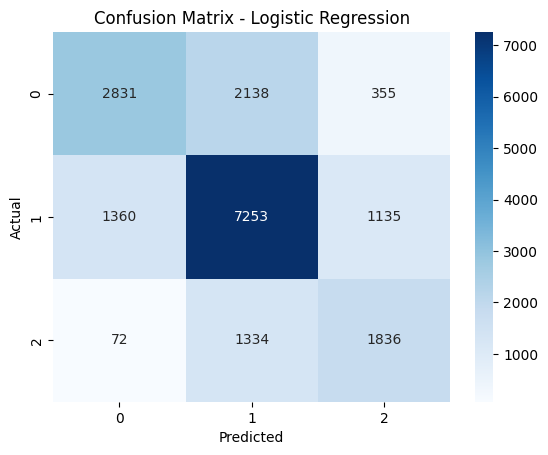

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)     # Increase width so it doesn't wrap
pd.set_option('display.colheader_justify', 'center')

feature_importance = pd.DataFrame({
    'Feature': X_train_processed.columns,
    'Poor_coef': log_reg.coef_[0],
    'Standard_coef': log_reg.coef_[1],
    'Good_coef': log_reg.coef_[2]
})
print(feature_importance.sort_values(by='Good_coef', ascending=False).head(10))


                        Feature                        Poor_coef  Standard_coef  Good_coef
35                                    Credit_Mix_Good    0.14        -0.29         0.15   
13                                 Credit_History_Age   -0.12         0.01         0.11   
9                                Changed_Credit_Limit   -0.28         0.19         0.09   
54                                       At_Risk_Flag   -0.08        -0.01         0.09   
37                                 Credit_Mix_Unknown   -0.07        -0.01         0.08   
28  Payment_Behaviour_high_spent_medium_value_paym...   -0.04         0.00         0.04   
8                              Num_of_Delayed_Payment   -0.09         0.05         0.04   
27  Payment_Behaviour_high_spent_large_value_payments   -0.05         0.01         0.04   
0                                                 Age   -0.04        -0.00         0.04   
23                                      Not Specified   -0.01        -0.02         0.03   

##### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the base model
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

# Define grid of C values (inverse of regularization strength)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}

# Set up grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit on training data
grid_search.fit(X_train_processed, y_train)

# Display best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters: {'C': 10, 'class_weight': None}
Best Cross-Validation Accuracy: 0.6503078819300387


In [ ]:
# Use best parameters found
best_log_reg = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_log_reg.predict(X_test_processed)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.6508681882712679

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.53      0.59      5324
           1       0.68      0.74      0.71      9748
           2       0.55      0.57      0.56      3242

    accuracy                           0.65     18314
   macro avg       0.63      0.61      0.62     18314
weighted avg       0.65      0.65      0.65     18314


Confusion Matrix:
 [[2831 2138  355]
 [1360 7253 1135]
 [  72 1334 1836]]


## Random Forest
*Ellen, Terry, Nadia*

#### Ellen

Accuracy: 0.7956208365185105

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      5324
           1       0.82      0.81      0.81      9748
           2       0.75      0.73      0.74      3242

    accuracy                           0.80     18314
   macro avg       0.78      0.78      0.78     18314
weighted avg       0.80      0.80      0.80     18314


Confusion Matrix:
 [[4355  907   62]
 [1152 7858  738]
 [  15  869 2358]]


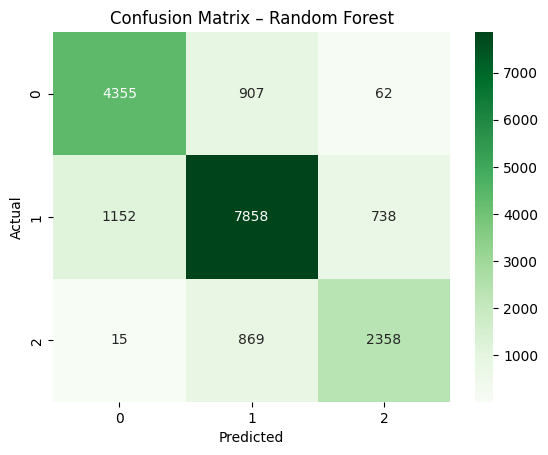

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create and train the model
rf = RandomForestClassifier(
    n_estimators=100,      # number of trees
    random_state=42
)
rf.fit(X_train_processed, y_train)

# Make predictions
y_pred = rf.predict(X_test_processed)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Random Forest')
plt.show()


--> accuracy variance may be result of class imbalance

Accuracy: 0.795457027410724

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      5324
           1       0.81      0.81      0.81      9748
           2       0.76      0.72      0.74      3242

    accuracy                           0.80     18314
   macro avg       0.79      0.78      0.78     18314
weighted avg       0.80      0.80      0.80     18314


Confusion Matrix:
 [[4309  968   47]
 [1127 7930  691]
 [  15  898 2329]]


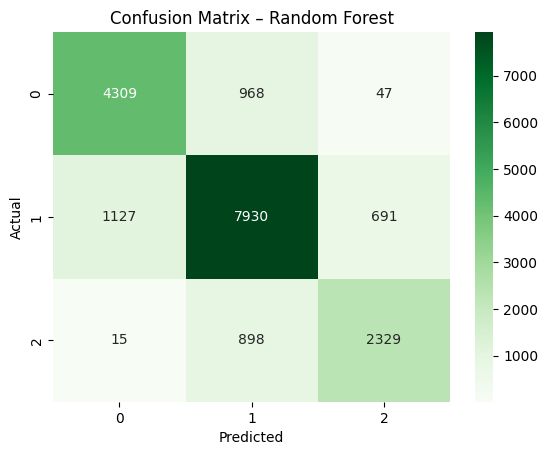

In [ ]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train_processed, y_train)

# Make predictions
y_pred = rf.predict(X_test_processed)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Random Forest')
plt.show()

##### Grid Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],         # number of trees
    'max_depth': [None, 10, 20, 30],         # depth of each tree
    'min_samples_split': [2, 5, 10],         # minimum samples required to split
    'min_samples_leaf': [1, 2, 4],           # minimum samples at each leaf
    'bootstrap': [True, False]               # sampling strategy
}

# set up GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=2,
    scoring='accuracy',
    verbose=2
)

grid_search_rf.fit(X_train_processed, y_train)

print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_rf.best_score_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


KeyboardInterrupt: 

In [ ]:
#less paramters, faster run time


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV # Changed from GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42)

param_distributions = {
    'n_estimators': [50, 100, 150, 200],         # Fewer, more focused options
    'max_depth': [10, 20, 30, None],             # Keep relevant depths
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]                          # Often preferred for RF
}

# set up RandomizedSearchCV
# n_iter specifies how many parameter settings are sampled
grid_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=30, # Number of parameter settings that are sampled. Adjust as needed.
    cv=2, # Reduced cross-validation folds
    n_jobs=2,
    scoring='accuracy',
    verbose=2,
    random_state=42 # for reproducibility of random sampling
)

grid_search_rf.fit(X_train_processed, y_train)

print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_rf.best_score_)

In [ ]:
best_rf = grid_search_rf.best_estimator_

# Predictions
y_pred_rf = best_rf.predict(X_test_processed)

# Evaluation metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Random Forest')
plt.show()


#### *Nadia*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train_processed, y_train)

y_pred = rf.predict(X_test_processed)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 (macro):", f1_score(y_test, y_pred, average="macro"))
print("F1 (weighted):", f1_score(y_test, y_pred, average="weighted"))  # weights by class frequency
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Random Forest')
plt.show()

BEFORE SMOTE : We looked at both macro and weighted F1 because our dataset isn’t perfectly balanced. The macro F1 tells us if the model is treating all credit categories fairly,while the weighted F1 shows the overall accuracy considering the class sizes. Since they’re close it means our Random Forest model is performing consistently across all credit-score levels

Well-calibrated (no class exploding in false positives).

Not overfitting (F1s across classes close to each other).

Giving strong baseline performance (80%)
* try to beat with more tuning.
* SMOTE


In [ ]:
#with smote
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
#added SMOTE to help with minority class and it did :
#macro F1 rose -> better class balance
# Weighted F1 rose -> better overall performance
#recall for minority class jumped -> huge gain in fairness
# the small dip in Class 1 F1 (from 0.79 to 0.78) is acceptable and expected.

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_processed, y_train)

rf.fit(X_train_res, y_train_res)

y_pred = rf.predict(X_test_processed)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 (macro):", f1_score(y_test, y_pred, average="macro"))
print("F1 (weighted):", f1_score(y_test, y_pred, average="weighted"))  # weights by class frequency
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Random Forest')
plt.show()

We saw a noticeable recall improvement for the Good credit group, which went up to 0.80 from around 0.71 before SMOTE. This means the model is now catching more true Good applicants instead of misclassifying them as Standard.

In [ ]:
# ======================================
# ROC & Precision–Recall Curves (Multiclass)
# w smote
# ======================================
#tooking graphing code from an XGBoost cell

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# 1) Classes & binarized ground truth (match rf.classes_ order)
classes = list(rf.classes_)  # ensures columns align with predict_proba
y_test_bin = label_binarize(y_test, classes=classes) # convert y_test into one v rest binary columns

# 2) Predict probabilities on the test set
y_pred_proba = rf.predict_proba(X_test_processed)

# 3) Plot ROC Curves (One-vs-Rest)
plt.figure(figsize=(6, 4))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)  # area under the ROC curve (AUC)
    plt.plot(fpr, tpr, lw=2, label=f"{cls} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curves — Random Forest")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# 4) Plot Precision–Recall Curves (One-vs-Rest)
plt.figure(figsize=(6, 4))
for i, cls in enumerate(classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    pr_auc = average_precision_score(y_test_bin[:, i], y_pred_proba[:, i])  #area underPR curve (Average Precision)
    plt.plot(recall, precision, lw=2, label=f"{cls} (AP = {pr_auc:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Multiclass Precision–Recall Curves — Random Forest")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()

Looking at the top graph, the ROC curve: which looks at how well the model separates classes, we can see all three classes have strong separation, with AUC scores ranging from about 0.87 to 0.95, which indicates the model distinguishes between credit categories very well.

The Precision-Recall curve: which tests whether the model is accurate when it commits to a label (bottom graph) still shows the “Standard” class leading with the highest precision and recall (AP ≈ 0.90), the “Good” class improved stability but remains the most challenging due to overlap with “Standard” credit profiles.

Tried doing a grid search but having trouble running it

## XGBoost
*Shizuka, Janine, Grace*

### Temporary experiment (additional preprocessing)


In [ ]:
cols = ["Amount_invested_monthly", "Monthly_Balance", "Total_EMI_per_month"]

for col in cols:
    # Step 1: Replace sentinel with NaN
    train[col] = train[col].replace(-99999, np.nan)
    test[col]  = test[col].replace(-99999, np.nan)

    # Step 2: Remove outliers in train (IQR method)
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Anything outside bounds → treat as missing
    train.loc[(train[col] < lower) | (train[col] > upper), col] = np.nan
    test.loc[(test[col] < lower) | (test[col] > upper), col] = np.nan

    # Step 3: Customer-level median (computed after removing outliers)
    cust_med = train.groupby("Customer_ID")[col].median()

    # Step 4: Fill NaN with customer median
    train[col] = train[col].fillna(train["Customer_ID"].map(cust_med))
    test[col]  = test[col].fillna(test["Customer_ID"].map(cust_med))

    # Step 5: Global median fallback
    global_med = train[col].median()
    train[col].fillna(global_med, inplace=True)
    test[col].fillna(global_med, inplace=True)

train.drop(columns="Age", inplace=True)
test.drop(columns="Age", inplace=True)



no affect even after imputing - most likely the model handles null values very well and these values are rare


### Baseline

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(
    objective='multi:softprob',   # for multiclass classification
    eval_metric='mlogloss',       # multiclass log-loss
    random_state=42,
    use_label_encoder=False
)

xgb_model.fit(X_train, y_train)

# Predict on validation set
y_pred = xgb_model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Validation Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y-test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Fine-tuning Hyperparameters

In [ ]:
print("X_train_shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Unique y_train:", np.unique(y_train))
print("X_valid_shape:", X_test.shape)
print("y_val shape:", y_test.shape)


#### RandomizedSearchCV

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Base model
xgb_base = XGBClassifier(
    objective="multi:softprob",
    eval_metric="mlogloss",
    random_state=42,
    use_label_encoder=False
)

# --- Broad Search Space ---
broad_param_grid = {
    "n_estimators": [100, 200, 300, 400, 500, 700],
    "max_depth": [3, 5, 7, 9, 11, 13],
    "learning_rate": [0.005, 0.01, 0.05, 0.1, 0.2],
    "subsample": [0.5, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.5, 0.7, 0.8, 0.9, 1.0],
    "gamma": [0, 0.1, 0.5, 1, 2, 5],
    "min_child_weight": [1, 3, 5, 7, 10],
    "reg_alpha": [0, 0.01, 0.1, 1, 5, 10],
    "reg_lambda": [0.1, 1, 5, 10, 20],
}

# --- Randomized Search ---
broad_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=broad_param_grid,
    n_iter=120,
    scoring="f1_macro",
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("Running broad hyperparameter search...")
broad_search.fit(X_train, y_train)

# --- Results ---
print("\n Broad Search Complete")
print("Best Parameters (Stage 1):", broad_search.best_params_)
print("Best Mean CV F1 (Stage 1):", broad_search.best_score_)


77.466% is the cross validated f1 score. Estimates how well the model generalizes before touching real validation set. This comes from the cross validation of 3 folds.

In [ ]:
# Base model
xgb_fine = XGBClassifier(
    objective="multi:softprob",
    eval_metric="mlogloss",
    random_state=42,
    use_label_encoder=False
)

# Fine parameter grid
bp = broad_search.best_params_

fine_param_grid = {
    "max_depth": [
        max(1, bp["max_depth"] - 3),
        max(1, bp["max_depth"] - 1),
        bp["max_depth"],
        bp["max_depth"] + 1,
        bp["max_depth"] + 3
    ],
    "min_child_weight": [bp.get("min_child_weight",1) + i for i in [-1,0,1,2,4] if bp.get("min_child_weight",1)+i > 0],
    "reg_alpha":        [bp["reg_alpha"], bp["reg_alpha"] + 0.01, bp["reg_alpha"] + 0.1, bp["reg_alpha"] + 0.5],
    "reg_lambda":       [bp["reg_lambda"], bp["reg_lambda"] + 2, bp["reg_lambda"] + 5],
    "n_estimators":     [bp["n_estimators"] - 100, bp["n_estimators"], bp["n_estimators"] + 100],
    "learning_rate":    [bp["learning_rate"]/2, bp["learning_rate"], bp["learning_rate"]*1.5],
    "subsample":        [bp["subsample"], min(1.0, bp["subsample"] + 0.1)],
    "colsample_bytree": [bp["colsample_bytree"], max(0.5, bp["colsample_bytree"] - 0.2)],
    "gamma":            [bp["gamma"], max(0, bp["gamma"] - 0.2), bp["gamma"] + 0.2],
}

# Randomized search for fine tuning
fine_search = RandomizedSearchCV(
    estimator=xgb_fine,
    param_distributions=fine_param_grid,
    n_iter=80,
    scoring="f1_macro",
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("Running comprehensive fine-tuning search...")
fine_search.fit(X_train, y_train)

# Best model
best_model = fine_search.best_estimator_

print("\nFine-Tuning Complete")
print("Best Parameters (Stage 2):")
for k, v in fine_search.best_params_.items():
    print(f"  {k:<18}: {v}")
print(f"\nBest Mean CV F1 (Stage 2): {fine_search.best_score_:.4f}")

# Evaluate on validation set
y_pred_best = best_model.predict(X_test)

print("\nValidation Accuracy:", accuracy_score(test, y_pred_best))
print("\nClassification Report:\n", classification_report(test, y_pred_best))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(test, y_pred_best), annot=True, fmt="d", cmap="Blues")
plt.title("Fine-Tuned XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


##### ROC & Precision-Recall Analysis

In [ ]:

from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Binarize true labels (for one-vs-rest evaluation)
classes = sorted(test.unique())
y_val_bin = label_binarize(test, classes=classes)

# 2. Predict probabilities
y_pred_proba = best_model.predict_proba(X_test)

# 3. Plot ROC Curves
plt.figure(figsize=(6, 4))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {cls} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curves")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# 4. Plot Precision–Recall Curves
plt.figure(figsize=(6, 4))
for i, cls in enumerate(classes):
    precision, recall, _ = precision_recall_curve(y_val_bin[:, i], y_pred_proba[:, i])
    pr_auc = average_precision_score(y_val_bin[:, i], y_pred_proba[:, i])
    plt.plot(recall, precision, lw=2, label=f"Class {cls} (AUC = {pr_auc:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Multiclass Precision–Recall Curves")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()


From the ROC curves, the model demonstrates decent class separation, with AUC scores of 0.94 for Class 0 (Poor), 0.88 for Class 1 (Standard), and 0.96 for Class 2 (Good). This means the model can reliably distinguish between different credit groups.

The Precision–Recall curves confirm that the model maintains a balance between precision and recall. PR AUC values are 0.82 (Poor), 0.91 (Standard), and 0.79 (Good).

### Feature Importance

#####Find best threshold

In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)


thresholds = np.arange(0.005, 0.0101, 0.0005)
results = []

for t in thresholds:
    selected_features = feature_importances[feature_importances["Importance"] > t]["Feature"]
    X_train_reduced = X_train[selected_features]

    # Reuse tuned hyperparameters
    model = XGBClassifier(**best_model.get_params(deep=True))
    f1 = cross_val_score(model, X_train_reduced, y_train, cv=5, scoring="f1_macro").mean()

    results.append((t, len(selected_features), f1))
    print(f"Threshold={t:.4f} | Features={len(selected_features):3d} | CV F1={f1:.4f}")

# Create a summary table
results_df = pd.DataFrame(results, columns=["Threshold", "Num_Features", "CV_F1"])
print("\nSummary of Threshold Search:")
print(results_df)

best_t = results_df.loc[results_df["CV_F1"].idxmax(), "Threshold"]
print(f"\nBest threshold based on training CV: {best_t:.4f}")

important_features = feature_importances[feature_importances["Importance"] > best_t]["Feature"]
X_train_reduced = X_train[important_features]
X_valid_reduced = X_test[important_features]
X_valid_reduced = X_valid_reduced[X_train_reduced.columns]

final_model = XGBClassifier(**best_model.get_params(deep=True))
final_model.fit(X_train_reduced, y_train)
y_pred_final = final_model.predict(X_valid_reduced)

print("\nValidation Performance (Leakage-Free):")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Final Reduced Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


  bst.update(dtrain, iteration=i, fobj=obj)
Threshold=0.0085 | Features= 39 | CV F1=0.8080

Bes threshold found accross cross validation of training dataset is 0.0085.

#####Finalized threshold

In [ ]:
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

best_t = 0.0085
important_features = feature_importances[feature_importances["Importance"] > best_t]["Feature"]

print(f"Selected {len(important_features)} features above threshold {best_t}")

X_train_reduced = X_train[important_features]
X_valid_reduced = X_test[important_features]
X_valid_reduced = X_valid_reduced[X_train_reduced.columns]  # ensure same order

final_model = XGBClassifier(**best_model.get_params(deep=True))
final_model.fit(X_train_reduced, y_train)

y_pred_final = final_model.predict(X_valid_reduced)
print("\nValidation Performance (Threshold=0.0085):")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Final Reduced Model (Threshold=0.0085)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
print("X_train_shape:", X_train_reduced.shape)
print("y_train shape:", y_train.shape)
print("Unique y_train:", np.unique(y_train))
print("X_valid_shape:", X_valid_reduced.shape)
print("y_val shape:", y_test.shape)

### Handle Class Imablance

##### Class Weighting

 bst.update(dtrain, iteration=i, fobj=obj)
Fold 5 F1_macro: 0.8212

Mean CV F1_macro: 0.8169 ± 0.0034

In [ ]:
print("X_train_reduced shape:", X_train_reduced.shape)
print("y_train shape:", y_train.shape)
print("Unique y_train:", np.unique(y_train))

In [ ]:
print("X_valid_reduced shape:", X_valid_reduced.shape)
print("y_val shape:", y_test.shape)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))
print("Class weights:", class_weights)

sample_weights = y_train.map(class_weights)
print("Sample weight length:", len(sample_weights), "==", len(X_train_reduced))

params = best_model.get_params(deep=True)
for key in ["scale_pos_weight", "random_state"]:
    params.pop(key, None)

final_weighted_model = XGBClassifier(**params, random_state=42)
final_weighted_model.fit(X_train_reduced, y_train, sample_weight=sample_weights)

X_valid_reduced = X_test[important_features]
y_pred_val = final_weighted_model.predict(X_valid_reduced)

print("\nValidation Accuracy:", accuracy_score(y_test, y_pred_val))
print("\nClassification Report:\n", classification_report(y_test, y_pred_val))

sns.heatmap(confusion_matrix(y_test, y_pred_val), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Class-Weighted Model (Validation Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Analyzing Results

In [ ]:
# Build a DataFrame for easy grouping
df_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_val
})

# Crosstab of Predicted vs Actual
confusion = pd.crosstab(df_results['Predicted'], df_results['Actual'], normalize='index') * 100
print("Percentage of Actual Classes within each Predicted Label:\n")
print(confusion.round(2))


Confirm that only 0.12% of those who have a good credit score was predicted Poor. This ensures customer trust. Reliable!

 However, 18.96% of those with Standard credit score was predicted Poor. These might be those who are on the boundary. Is there a way to target this without causing data leakge?

### Model Evaluation

In [ ]:
import gdown, joblib, pandas as pd

# --- Google Drive file IDs ---
file_id_model = "106e2YXB3MebGkndVCpJaqU7BYSfDMAN9"   # pickle file (.pkl)
file_id_csv   = "1OmP2n47KFjQ7iRMaRl6BN8GKXmVPkjfo"   # feature CSV

# --- Download from Google Drive ---
print("Downloading files from Google Drive...")
gdown.download(f"https://drive.google.com/uc?id={file_id_model}", "xgb_final_weighted.pkl", quiet=False)
gdown.download(f"https://drive.google.com/uc?id={file_id_csv}", "final_features_weighted.csv", quiet=False)

# --- Load model and feature list ---
final_weighted_model = joblib.load("xgb_final_weighted.pkl")
features = pd.read_csv("final_features_weighted.csv")["Feature"].tolist()
# if "Age" in features:
#     features.remove("Age")

print(f"\nModel loaded successfully with {len(features)} selected features.")
print("First few features:", features[:5])

In [ ]:
# Ensure feature alignment
X_train_reduced = X_train[features]
X_valid_reduced = X_test[features]

print("Train shape:", X_train_reduced.shape)
print("Valid shape:", X_valid_reduced.shape)
print("Same columns:", list(X_train_reduced.columns) == list(X_valid_reduced.columns))


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns, matplotlib.pyplot as plt

y_pred_val = final_weighted_model.predict(X_valid_reduced)
y_proba_val = final_weighted_model.predict_proba(X_valid_reduced)

print("Validation Accuracy:", accuracy_score(y_test, y_pred_val))
print("\nClassification Report:\n", classification_report(y_test, y_pred_val))

# Confusion-matrix plots
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_val), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Counts"); plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()

cm_norm = pd.crosstab(y_test, y_pred_val, normalize='index')*100
plt.figure(figsize=(5,4))
sns.heatmap(cm_norm.round(1), annot=True, fmt='.1f', cmap='Blues')
plt.title("Confusion Matrix – % by Actual"); plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

classes = sorted(y_test.unique())
y_val_bin = label_binarize(y_test, classes=classes)

# ROC
plt.figure(figsize=(6,4))
for i, c in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val_bin[:,i], y_proba_val[:,i])
    plt.plot(fpr, tpr, lw=2, label=f"Class {c} (AUC = {auc(fpr,tpr):.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Validation"); plt.legend(); plt.show()

# Precision-Recall
plt.figure(figsize=(6,4))
for i, c in enumerate(classes):
    prec, rec, _ = precision_recall_curve(y_val_bin[:,i], y_proba_val[:,i])
    plt.plot(rec, prec, lw=2, label=f"Class {c} (AP = {average_precision_score(y_val_bin[:,i],y_proba_val[:,i]):.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision–Recall Curves – Validation"); plt.legend(); plt.show()


In [ ]:
conf = np.max(y_proba_val, axis=1)

print("Mean confidence:", conf.mean().round(3))
sns.histplot(conf, bins=30, kde=True)
plt.title("Distribution of Prediction Confidence"); plt.xlabel("Max Probability"); plt.show()


## Neural Network
*Alicia*

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [ ]:
print(X_train_processed.shape)
print(y_train.shape)
print(X_test_processed.shape)

In [ ]:
# For testing purposes (converting to binary classification)
combined_train = X_train_processed
combined_train['Credit_Score'] = y_train
combined_remove_standard = combined_train[combined_train['Credit_Score'] != 1]
X_train_remove_standard = combined_remove_standard.drop(columns=['Credit_Score'])
y_train_remove_standard = y_train[y_train != 1]

combined_test = X_test_processed
combined_test['Credit_Score'] = y_test
combined_remove_standard = combined_test[combined_test['Credit_Score'] != 1]
X_test_remove_standard = combined_remove_standard.drop(columns=['Credit_Score'])
y_test_remove_standard = y_test[y_test != 1]

X_train_original, X_test_original, y_train_original, y_test_original = X_train_processed, X_test_processed, y_train, y_test
# X_train_processed, X_test_processed, y_train, y_test = X_train_remove_standard, X_test_remove_standard, y_train_remove_standard, y_test_remove_standard

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.1):  # reduced dropout
        """
        Initialize a neural network with multiple hidden layers and dropout.

        Args:
            input_size: Number of input features
            hidden_size: Number of neurons in hidden layers
            output_size: Number of output classes
            dropout_rate: Dropout probability for regularization
        """
        super(NeuralNet, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.bn2 = nn.BatchNorm1d(hidden_size // 2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(hidden_size // 2, hidden_size // 4)
        self.bn3 = nn.BatchNorm1d(hidden_size // 4)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(dropout_rate)

        self.fc4 = nn.Linear(hidden_size // 4, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.dropout3(x)

        x = self.fc4(x)
        return x

'''
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.5):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x
'''

def train(model, train_loader, criterion, optimizer, epochs=100, device='cpu', early_stop_patience=10):
    """Train the neural network with optional early stopping"""
    model.train()
    best_loss = float('inf')
    epochs_no_improve = 0

    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)

    for epoch in range(epochs):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        scheduler.step(avg_loss)

        # Early stopping
        if avg_loss < best_loss:
            best_loss = avg_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), "best_model.pt")  # save best model
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= early_stop_patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Average Loss: {avg_loss:.4f}')

def evaluate(model, data_loader, device='cpu'):
    """Evaluate model accuracy"""
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    accuracy = 100 * correct / total
    return accuracy

In [ ]:
torch.manual_seed(42)


In [ ]:
    # IMPORTANT: Check your data before training!
    print("=" * 60)
    print("DATA DIAGNOSTICS")
    print("=" * 60)

    # Check class distribution
    print("\n1. Class Distribution:")
    print(y_train.value_counts())

    # Check if labels are 0-indexed (CRITICAL!)
    unique_labels = np.unique(y_train.values)
    print(f"\n2. Unique labels: {unique_labels}")
    if unique_labels.min() != 0:
        print("WARNING: Labels are not 0-indexed! Remapping...")
        label_map = {old: new for new, old in enumerate(unique_labels)}
        y_train = y_train.map(label_map)
        y_test = y_test.map(label_map)
        print(f"   Remapped to: {np.unique(y_train.values)}")

    # Check data scaling
    print(f"\n3. Feature Statistics:")
    print(f"   Mean: {X_train_processed.values.mean():.4f}")
    print(f"   Std: {X_train_processed.values.std():.4f}")
    print(f"   Min: {X_train_processed.values.min():.4f}")
    print(f"   Max: {X_train_processed.values.max():.4f}")

In [ ]:
    # Normalize features if not already done
    if X_train_processed.values.std() > 10 or X_train_processed.values.mean() > 10:
        print("\n   WARNING: Data appears unscaled. Normalizing...")
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_processed)
        X_test_scaled = scaler.transform(X_test_processed)
        X_train_processed = pd.DataFrame(X_train_scaled, columns=X_train_processed.columns)
        X_test_processed = pd.DataFrame(X_test_scaled, columns=X_test_processed.columns)
        print("   Data normalized!")

In [ ]:
# Currently overfitting, working on it

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# ------------------------------
# 1️⃣ Train/Validation split
# ------------------------------
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_processed, y_train, test_size=0.1, stratify=y_train, random_state=42
)

X_train_tensor = torch.FloatTensor(X_train_final.values)
y_train_tensor = torch.LongTensor(y_train_final.values)
X_val_tensor = torch.FloatTensor(X_val.values)
y_val_tensor = torch.LongTensor(y_val.values)
X_test_tensor = torch.FloatTensor(X_test_processed.values)
y_test_tensor = torch.LongTensor(y_test.values)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=64, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=64, shuffle=False)

# ------------------------------
# 2️⃣ Class weights (scaled)
# ------------------------------
class_counts = y_train_final.value_counts().sort_index().values
class_weights = 1.0 / class_counts
class_weights = class_weights / class_weights.min()  # scale so min weight = 1
class_weights_tensor = torch.FloatTensor(class_weights)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

print(f"Class weights: {class_weights_tensor.numpy()}")

# ------------------------------
# 3️⃣ Model
# ------------------------------
class NeuralNetTabular(nn.Module):
    def __init__(self, input_size, hidden_size=32, output_size=3, dropout_rate=0.5):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

input_size = X_train_processed.shape[1]
model = NeuralNetTabular(input_size=input_size)
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)

# ------------------------------
# 4️⃣ Training loop with early stopping
# ------------------------------
num_epochs = 100
patience = 10
best_val_loss = float('inf')
counter = 0

for epoch in range(num_epochs):
    # Train
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)
    train_loss = running_loss / len(train_loader.dataset)

    # Validate
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)
    val_loss /= len(val_loader.dataset)

    print(f"Epoch {epoch+1}: Train Loss={train_loss:.6f}, Val Loss={val_loss:.6f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered!")
            break

# Load best model
model.load_state_dict(best_model_state)

# ------------------------------
# 5️⃣ Evaluate on test set
# ------------------------------
model.eval()
all_predictions = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.numpy())

print("\nClassification Report:")
print(classification_report(y_test_tensor.numpy(), all_predictions, digits=4))

Janine

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# 'features' are your input columns (already encoded + scaled)
features = X_train.columns

# Copy data to avoid modifying originals
X_tr = X_train[features].copy()
X_va = X_test[features].copy()
y_tr = y_train.copy()
y_va = y_test.copy()

# Scale only numeric columns puts the numeric features on a similar range to revent larg values from dominating the learning
num_cols = [c for c in X_tr.columns if X_tr[c].nunique() > 10]  # heuristic: continuous vars have many unique values
scaler = StandardScaler()
X_tr[num_cols] = scaler.fit_transform(X_tr[num_cols])
X_va[num_cols] = scaler.transform(X_va[num_cols])

In [ ]:
# Automatically compute weights (inverse frequency)
classes = np.sort(y_tr.unique())
cw = compute_class_weight('balanced', classes=classes, y=y_tr.values)
auto_weights = {int(k): float(v) for k, v in zip(classes, cw)}
print("Auto-computed weights:", auto_weights)

# Manually fine-tuned weights (you can adjust based on confusion matrix results)
class_weights = {0: 1.5, 1: 0.6, 2: 2.2}
print("Adjusted weights:", class_weights)

In [ ]:
# n_features = number of input columns (each feature is one neuron in the input layer)
n_features = X_tr.shape[1]

# n_classes = number of output categories (3 → Poor, Standard, Good)
n_classes = len(np.unique(y_tr))

# The architecture: Multi-Layer Perceptron (MLP)
model = keras.Sequential([
    # Input layer (no activation)
    layers.Input(shape=(n_features,)),

    # Hidden Layer 1 — learns base-level patterns
    layers.Dense(256, activation='relu'),   # ReLU = keeps positive signals, zeroes out negative (faster learning)
    layers.Dropout(0.2),                    # Dropout = randomly deactivates 20% of neurons to prevent overfitting

    # Hidden Layer 2 — learns intermediate feature interactions
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),

    # Hidden Layer 3 — learns deeper feature combinations
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),

    # Output Layer — produces 3 probabilities (for classes 0, 1, 2)
    layers.Dense(n_classes, activation='softmax')  # Softmax = converts outputs into probabilities that sum to 1
])

In [ ]:
# The compile step defines *how* the model learns
# using adam optimizer to control how the model learns
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),  # Adam = adaptive gradient descent optimizer
    loss='sparse_categorical_crossentropy',                # For multi-class classification
    metrics=['accuracy']                                  # Track accuracy each epoch
)


In [ ]:
# 1. EarlyStopping — stop training when validation loss stops improving
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',        # watch validation loss
    patience=8,                # wait 8 epochs before stopping
    restore_best_weights=True  # revert to best model (lowest val_loss)
)

# 2. ReduceLROnPlateau — automatically lower the learning rate when model stops improving
reduce = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # look at validation loss
    factor=0.5,          # reduce learning rate by half
    patience=3,          # wait 3 epochs before reducing
    verbose=1
)
#train the model
history = model.fit(
    X_tr, y_tr,
    validation_data=(X_va, y_va),  # validation data (for monitoring overfitting)
    epochs=100,                    # maximum training cycles (can stop early)
    batch_size=512,                # how many samples per gradient update
    class_weight=class_weights,    # tells model how to balance each class
    callbacks=[early_stop, reduce],# smarter training controls
    verbose=1                      # shows progress each epoch
)

In [ ]:
# Predict probabilities for each class
probs = model.predict(X_va, verbose=0)

# Convert probabilities → predicted class labels
preds = probs.argmax(axis=1)

# Print accuracy and macro F1-score
print("Validation Accuracy:", accuracy_score(y_va, preds))
print("Validation Macro-F1:", f1_score(y_va, preds, average='macro'))

# Classification report
print("\nClassification Report:\n", classification_report(y_va, preds, digits=3))

# Confusion matrix heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_va, preds, labels=classes), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Keras Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Binary Classification Experiment Results**

After removing the standard class, the test accuracy improved significantly to 94%.
```
MODEL CONFIGURATION
Input size: 55
Hidden size: 256
Output size (number of classes): 2
Training samples: 34262
Test samples: 8566

Class weights (to handle imbalance): [0.7569319 1.2430681]

Training Neural Network...
Epoch [10/100], Average Loss: 0.2685
Epoch [20/100], Average Loss: 0.2341
Epoch [30/100], Average Loss: 0.2085
Epoch [40/100], Average Loss: 0.1873
Epoch [50/100], Average Loss: 0.1753
Epoch [60/100], Average Loss: 0.1619
Epoch [70/100], Average Loss: 0.1533
Epoch [80/100], Average Loss: 0.1397
Epoch [90/100], Average Loss: 0.1330
Epoch [100/100], Average Loss: 0.1237

Training Accuracy: 98.63%
Test Accuracy: 94.01%

============================================================
SAMPLE PREDICTIONS (first 10 test samples)
============================================================
Sample 1: Predicted=1, Actual=1, Confidence=0.997
Sample 2: Predicted=1, Actual=1, Confidence=1.000
Sample 3: Predicted=1, Actual=1, Confidence=1.000
Sample 4: Predicted=0, Actual=0, Confidence=1.000
Sample 5: Predicted=1, Actual=1, Confidence=0.988
Sample 6: Predicted=1, Actual=1, Confidence=0.992
Sample 7: Predicted=0, Actual=0, Confidence=0.933
Sample 8: Predicted=0, Actual=0, Confidence=1.000
Sample 9: Predicted=1, Actual=1, Confidence=0.992
Sample 10: Predicted=0, Actual=0, Confidence=1.000

First 10 predictions: [np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0)]
```


## Save Final Model

In [ ]:
import joblib, pandas as pd

joblib.dump(final_weighted_model, model_path)
pd.Series(features).to_csv(feat_path, index=False)

print("Model + features saved")